In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
filename = "predicted_series_{0}_block{1}_w{2}.csv"
models = ['rnn','lstm']
blocks = ['1','10','20','30']
win = ['50','20']

In [3]:
test_data_file = pd.read_csv("test_data3.csv")
names = test_data_file.columns.tolist()

In [4]:
def mean_std(test_list):
    mean = sum(test_list) / len(test_list) 
    variance = sum([((x - mean) ** 2) for x in test_list]) / len(test_list) 
    res = variance ** 0.5
    return [mean, res]

In [5]:
from statistics import mean 

In [6]:
R2score_tot = []
RMSE_tot = []
MAPE_tot = []
MAE_tot = []
MAPE_labels = []
files = []
windows = []
b = []
m = []
c=0
high_acc = []
good = []
mid = []
bad = []
for model in models:
    for block in blocks:
        for w in win:
            c+=1
            file = filename.format(model,block,w)
            testfile = "test_data{0}.csv".format(blocks.index(block)+1)
            windows.append(w)
            m.append(model)
            b.append(block)
            predicted_series_rnn = pd.read_csv(file)
            test_data_file = pd.read_csv(testfile)
            files.append(file)
            print(file, testfile)
            R2score = []
            RMSE = []
            MAPE = []
            MAE = []
            for name in names:
                test = test_data_file[name][int(w):].tolist()
                pred = predicted_series_rnn[name].tolist()
                #plot(pred,test)
                R2score.append(r2_score(test, pred))
                RMSE.append(np.sqrt(mean_squared_error(test, pred)))
                MAPE.append(mean_absolute_percentage_error(test, pred))
                MAE.append(mean_absolute_error(test, pred))
                
            high = 0
            good_ = 0
            mid_ = 0
            bad_ = 0
            for i in range(len(MAPE)):
                if MAPE[i]<=0.10:
                    high+=1
                elif MAPE[i]<=0.20 and MAPE[i]>0.10:
                    good_+=1
                elif MAPE[i]<=0.50 and MAPE[i]>0.20:
                    mid_+=1
                elif MAPE[i]>0.50:
                    bad_+=1
                    
            high_acc.append(high)
            good.append(good_)
            mid.append(mid_)
            bad.append(bad_)
            R2score_tot.append(mean_std(R2score))
            RMSE_tot.append(mean_std(RMSE))
            MAPE_tot.append(mean_std(MAPE))
            MAE_tot.append(mean_std(MAE))

predicted_series_rnn_block1_w50.csv test_data1.csv
predicted_series_rnn_block1_w20.csv test_data1.csv
predicted_series_rnn_block10_w50.csv test_data2.csv
predicted_series_rnn_block10_w20.csv test_data2.csv
predicted_series_rnn_block20_w50.csv test_data3.csv
predicted_series_rnn_block20_w20.csv test_data3.csv
predicted_series_rnn_block30_w50.csv test_data4.csv
predicted_series_rnn_block30_w20.csv test_data4.csv
predicted_series_lstm_block1_w50.csv test_data1.csv
predicted_series_lstm_block1_w20.csv test_data1.csv
predicted_series_lstm_block10_w50.csv test_data2.csv
predicted_series_lstm_block10_w20.csv test_data2.csv
predicted_series_lstm_block20_w50.csv test_data3.csv
predicted_series_lstm_block20_w20.csv test_data3.csv
predicted_series_lstm_block30_w50.csv test_data4.csv
predicted_series_lstm_block30_w20.csv test_data4.csv


In [7]:
df = pd.DataFrame({
    'Files': files,
    'Block':b,
    'Window':windows,
    'Model': m,
    'High': high_acc,
    'Good': good,
    'Mid': mid,
    'Bad': bad
})

In [8]:
df_round = df.round(2)
df_round.to_csv("mape_labels.csv")

In [9]:
R2_mean = []
R2_std = []
for i in R2score_tot:
    print(i, i[1]/i[0])
    R2_mean.append(i[0])
    R2_std.append(i[1])

[0.7905424959699804, 0.1504867927385568] 0.1903588908954381
[0.7897788660808004, 0.12580194098077263] 0.1592875504570695
[0.9702673819021994, 0.04010606969724329] 0.04133506953373589
[0.9644707545270543, 0.028277614551443286] 0.029319307421933935
[0.9819790827441726, 0.024656725571361164] 0.025109216687647908
[0.9778311480320238, 0.027103317326623456] 0.02771778888530132
[0.9824152815270502, 0.026395411708256322] 0.026867875739094497
[0.9788110570555104, 0.028352615955096937] 0.02896638299161449
[0.7872163549790705, 0.1311912057821846] 0.16665203276381693
[0.7922328482554688, 0.09987584608149362] 0.12606880199606035
[0.9761188517741332, 0.0324048214051848] 0.03319761865708034
[0.9674927054050065, 0.04610109096541769] 0.04765006568821529
[0.9820570574218511, 0.03720732624419269] 0.03788713289416336
[0.9767062163791912, 0.022117303792646207] 0.022644786550697557
[0.981517241647321, 0.038326014365134865] 0.03904772401227586
[0.9814877501808776, 0.016806256734246416] 0.017123246552133944


In [10]:
MAPE_mean = []
MAPE_std = []
for i in MAPE_tot:
    print(i, i[1]/i[0])
    MAPE_mean.append(i[0])
    MAPE_std.append(i[1])

[0.19519403842956715, 0.14810321983657285] 0.7587486842740522
[0.19987011487793538, 0.1495318382929695] 0.7481450560244665
[0.06660278937384334, 0.042158541765406204] 0.6329846266463274
[0.0748010166107654, 0.04860910951978934] 0.6498455732591407
[0.04771831837837801, 0.03170268838521743] 0.6643714502643173
[0.051272615779275256, 0.02965868743556692] 0.5784508354956052
[0.04261971466867888, 0.02508246809574713] 0.5885179732134662
[0.0470851870733642, 0.02769338957816019] 0.5881550292029353
[0.17808714305986226, 0.11588936418714697] 0.6507452598540024
[0.17916123818062862, 0.1085848141360262] 0.6060731396963893
[0.0548325290685142, 0.031458211018119596] 0.5737143909377591
[0.06699232661279844, 0.04100126846219039] 0.6120293253758613
[0.04070058669170898, 0.0288365203492443] 0.7085038003916175
[0.051050026889971914, 0.024611010400292437] 0.482095934118439
[0.03819108922130367, 0.030001220359156557] 0.7855555044610077
[0.04631577095675475, 0.023755000853610615] 0.5128922689377398


In [11]:
MAE_mean = []
MAE_std =[]
for i in MAE_tot:
    print(i, i[1]/i[0])
    MAE_mean.append(i[0])
    MAE_std.append(i[1])

[1.024076463758599, 0.7291192462689874] 0.7119773494187631
[1.0409497443151305, 0.6453183761085421] 0.6199323066581998
[0.37429304952389275, 0.25496840105101076] 0.6811999351185789
[0.42368820361761395, 0.28180947789365757] 0.665134113924955
[0.26748321095537647, 0.19213548067068698] 0.71830856218763
[0.3051781248677179, 0.2209770181181784] 0.7240919322574736
[0.25078611939452194, 0.18348659332631734] 0.7316457297130828
[0.28266759962212656, 0.2226890986700329] 0.7878126073441963
[0.9895244069165563, 0.614067229379179] 0.6205680477277621
[0.9689504061684131, 0.5229167962871334] 0.5396734373175394
[0.3111157591399913, 0.20009169567264223] 0.6431422703425573
[0.3695158519876495, 0.2497426703612161] 0.6758645644505756
[0.24136652827431715, 0.2123147644170293] 0.8796363188177027
[0.29232491422445334, 0.17079888149335284] 0.5842775390749274
[0.23671356991761472, 0.2720678065320696] 1.1493544988855495
[0.27056490375016395, 0.18794472072640026] 0.6946382110960921


In [12]:
RMSE_mean = []
RMSE_std = []
for i in RMSE_tot:
    print(i, i[1]/i[0])
    RMSE_mean.append(i[0])
    RMSE_std.append(i[1])

[1.6670870879858384, 0.8905010965821514] 0.5341659131065839
[1.6870298628003126, 0.8323310950036094] 0.49337069447129833
[0.5130898523867832, 0.2921713742306395] 0.5694351055112888
[0.5956324083183224, 0.32841681448849114] 0.5513749921964892
[0.34883546340476174, 0.21981874360059012] 0.6301502188311898
[0.4141666006756527, 0.25998523567703485] 0.6277310513520565
[0.32040170596153306, 0.211825344879328] 0.6611242728675091
[0.379493494471496, 0.27218366077381606] 0.7172287924273231
[1.6801143484754053, 0.812830682415111] 0.4837948578635151
[1.665136502829104, 0.7599101133618877] 0.4563650560003841
[0.46143047852028113, 0.2494602198646781] 0.5406236290776654
[0.5383204655275987, 0.29532293688632355] 0.5486006120850014
[0.3302517363990494, 0.2581530940615623] 0.7816858039154441
[0.40872024771583254, 0.20553341815838705] 0.5028706537222656
[0.31846367971555395, 0.3236163269711548] 1.0161797014347227
[0.36731240855698954, 0.22624789608396179] 0.6159549495558596


In [13]:
df = pd.DataFrame({
    'Files': files,
    'Block':b,
    'Window':windows,
    'Model': m,
    'R2': R2_mean,
    'MAPE': MAPE_mean,
    'RMSE': RMSE_mean,
    'MAE': MAE_mean
})

In [14]:
df_round = df.round(2)
df_round.to_csv("results_mean.csv")

In [15]:
df = pd.DataFrame({
    'Files': files,
    'Block':b,
    'Window':windows,
    'Model': m,
    'R2': R2_std,
    'MAPE': MAPE_std,
    'RMSE': RMSE_std,
    'MAE': MAE_std
})

df_round = df.round(2)
df_round.to_csv("results_std.csv")

In [16]:
R2_cv = []
MAPE_cv = []
MAE_cv = []
RMSE_cv = []
for i in range(0,len(files)):
    R2_cv.append(R2score_tot[i][1]/R2score_tot[i][0])
    MAPE_cv.append(MAPE_tot[i][1]/MAPE_tot[i][0])
    MAE_cv.append(MAE_tot[i][1]/MAE_tot[i][0])
    RMSE_cv.append(RMSE_tot[i][1]/RMSE_tot[i][0])
    print(files[i],R2score_tot[i][1]/R2score_tot[i][0], MAPE_tot[i][1]/MAPE_tot[i][0], MAE_tot[i][1]/MAE_tot[i][0], RMSE_tot[i][1]/RMSE_tot[i][0]) 

predicted_series_rnn_block1_w50.csv 0.1903588908954381 0.7587486842740522 0.7119773494187631 0.5341659131065839
predicted_series_rnn_block1_w20.csv 0.1592875504570695 0.7481450560244665 0.6199323066581998 0.49337069447129833
predicted_series_rnn_block10_w50.csv 0.04133506953373589 0.6329846266463274 0.6811999351185789 0.5694351055112888
predicted_series_rnn_block10_w20.csv 0.029319307421933935 0.6498455732591407 0.665134113924955 0.5513749921964892
predicted_series_rnn_block20_w50.csv 0.025109216687647908 0.6643714502643173 0.71830856218763 0.6301502188311898
predicted_series_rnn_block20_w20.csv 0.02771778888530132 0.5784508354956052 0.7240919322574736 0.6277310513520565
predicted_series_rnn_block30_w50.csv 0.026867875739094497 0.5885179732134662 0.7316457297130828 0.6611242728675091
predicted_series_rnn_block30_w20.csv 0.02896638299161449 0.5881550292029353 0.7878126073441963 0.7172287924273231
predicted_series_lstm_block1_w50.csv 0.16665203276381693 0.6507452598540024 0.6205680477277

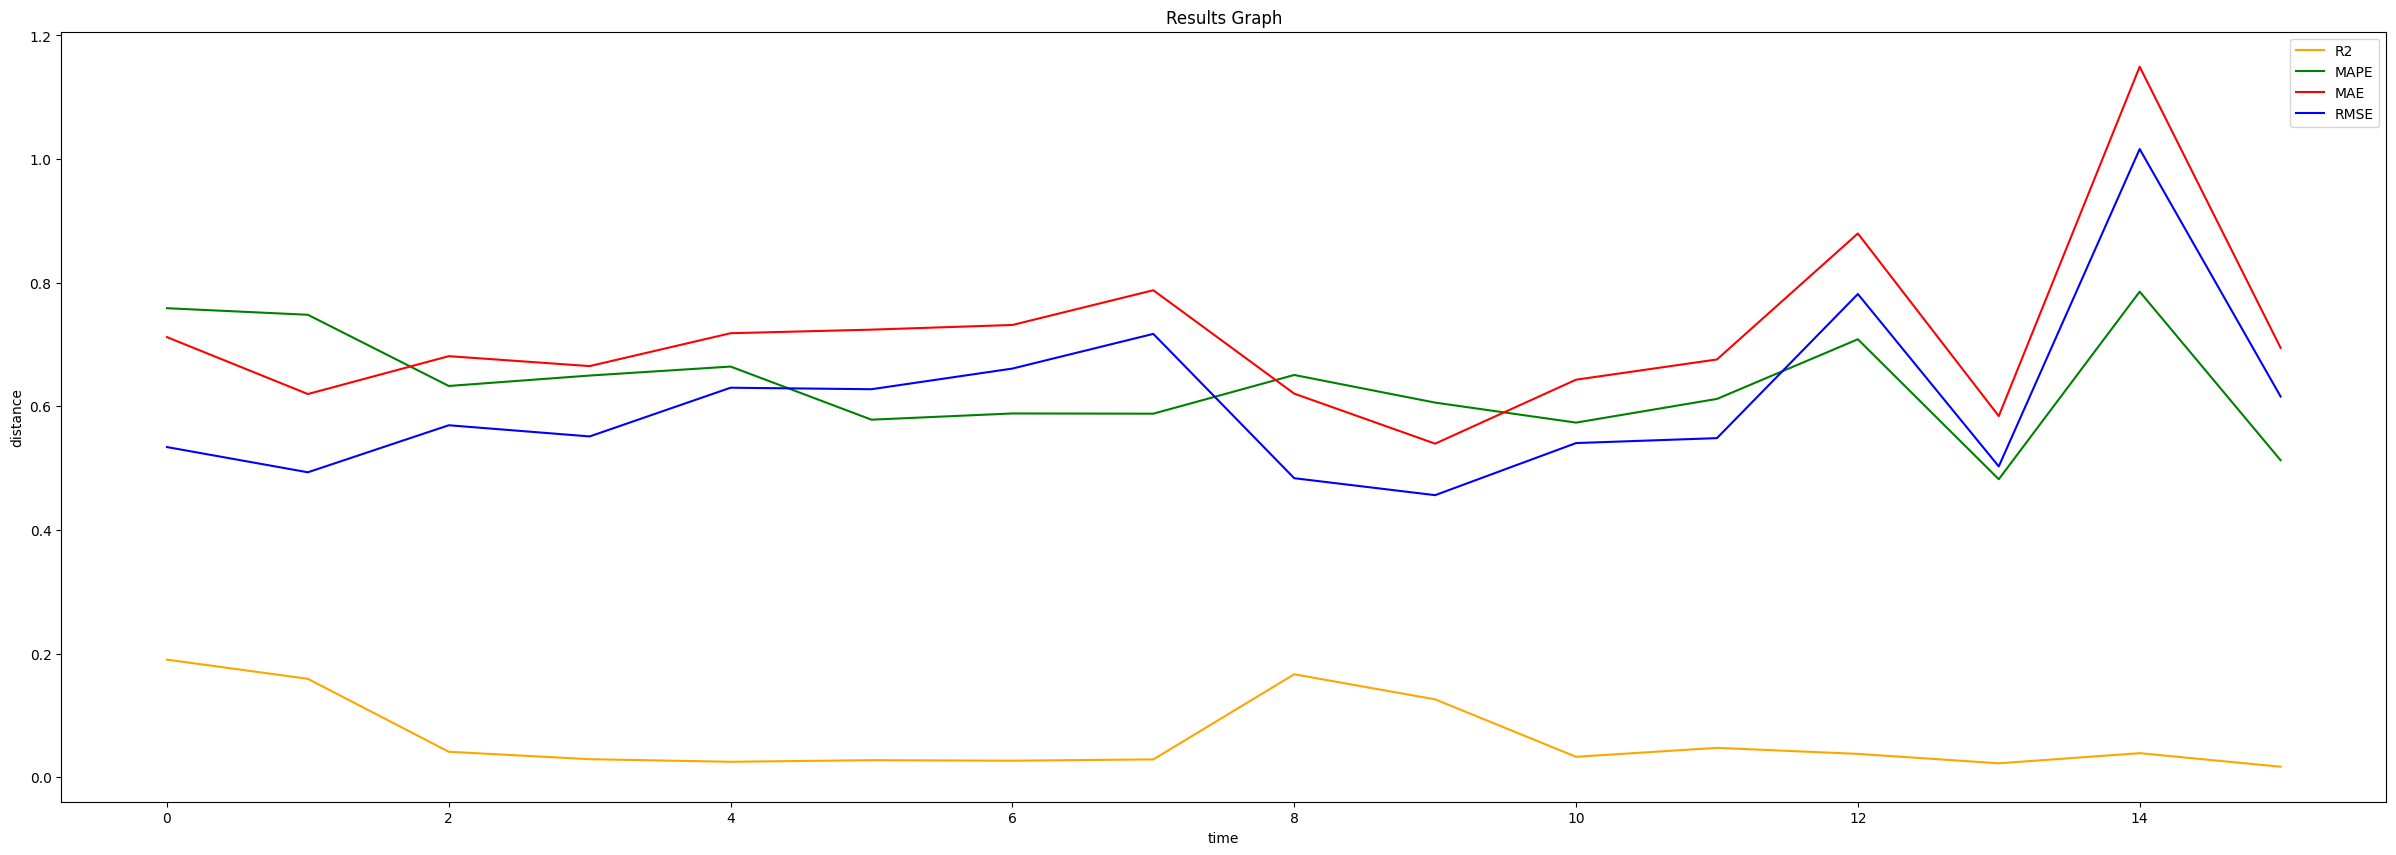

In [17]:
plt.figure(figsize = (30,10))
plt.plot(R2_cv, label = "R2", c = "orange")
plt.plot(MAPE_cv, label = "MAPE", c = "green")
plt.plot(MAE_cv, label = "MAE", c = "red")
plt.plot(RMSE_cv, label = "RMSE", c = "blue")
plt.xlabel("time")
plt.ylabel("distance")
plt.title("Results Graph")
plt.legend()
plt.show()

In [18]:
print('R2:',files[R2_cv.index(min(R2_cv))],min(R2_cv))
print('MAPE:',files[MAPE_cv.index(min(MAPE_cv))],min(MAPE_cv))
print('MAE:',files[MAE_cv.index(min(MAE_cv))],min(MAE_cv))
print('RMSE:',files[RMSE_cv.index(min(RMSE_cv))],min(RMSE_cv))

R2: predicted_series_lstm_block30_w20.csv 0.017123246552133944
MAPE: predicted_series_lstm_block20_w20.csv 0.482095934118439
MAE: predicted_series_lstm_block1_w20.csv 0.5396734373175394
RMSE: predicted_series_lstm_block1_w20.csv 0.4563650560003841


In [19]:
df = pd.DataFrame({
    'Files': files,
    'Block':b,
    'Window':windows,
    'Model': m,
    'R2': R2_cv,
    'MAPE': MAPE_cv,
    'MAE': MAE_cv,
    'RMSE': RMSE_cv
})

df_round = df.round(2)
df_round.to_csv("results_cv.csv")

In [20]:
df['R2_rank'] = df['R2'].rank(ascending=True)
df['MAPE_rank'] = df['MAPE'].rank(ascending=True)
df['MAE_rank'] = df['MAE'].rank(ascending=True)
df['RMSE_rank'] = df['RMSE'].rank(ascending=True)

df['average_rank'] = df[['R2_rank', 'MAPE_rank', 'MAE_rank', 'RMSE_rank']].mean(axis=1)

df_round = df.round(2)
df_sorted = df_round.sort_values('average_rank')
df_sorted[['Block','Window','Model', 'R2', 'MAPE', 'MAE', 'RMSE', 'average_rank']].to_csv("results_ranking.csv")

In [21]:
df_sorted[['Block','Window','Model', 'R2', 'MAPE', 'MAE', 'RMSE', 'average_rank']]

Block Window Model    R2  MAPE   MAE  RMSE  average_rank
13    20     20  lstm  0.02  0.48  0.58  0.50          2.25
9      1     20  lstm  0.13  0.61  0.54  0.46          5.50
10    10     50  lstm  0.03  0.57  0.64  0.54          5.50
15    30     20  lstm  0.02  0.51  0.69  0.62          5.50
3     10     20   rnn  0.03  0.65  0.67  0.55          7.75
5     20     20   rnn  0.03  0.58  0.72  0.63          8.00
8      1     50  lstm  0.17  0.65  0.62  0.48          8.00
1      1     20   rnn  0.16  0.75  0.62  0.49          8.50
11    10     20  lstm  0.05  0.61  0.68  0.55          8.50
6     30     50   rnn  0.03  0.59  0.73  0.66          9.00
2     10     50   rnn  0.04  0.63  0.68  0.57          9.25
4     20     50   rnn  0.03  0.66  0.72  0.63          9.50
7     30     20   rnn  0.03  0.59  0.79  0.72          9.75
0      1     50   rnn  0.19  0.76  0.71  0.53         11.50
12    20     50  lstm  0.04  0.71  0.88  0.78         13.00
14    30     50  lstm  0.04  0.79  1.15  1.02         14.50

In [22]:
df

Files Block Window Model        R2  \
0     predicted_series_rnn_block1_w50.csv     1     50   rnn  0.190359   
1     predicted_series_rnn_block1_w20.csv     1     20   rnn  0.159288   
2    predicted_series_rnn_block10_w50.csv    10     50   rnn  0.041335   
3    predicted_series_rnn_block10_w20.csv    10     20   rnn  0.029319   
4    predicted_series_rnn_block20_w50.csv    20     50   rnn  0.025109   
5    predicted_series_rnn_block20_w20.csv    20     20   rnn  0.027718   
6    predicted_series_rnn_block30_w50.csv    30     50   rnn  0.026868   
7    predicted_series_rnn_block30_w20.csv    30     20   rnn  0.028966   
8    predicted_series_lstm_block1_w50.csv     1     50  lstm  0.166652   
9    predicted_series_lstm_block1_w20.csv     1     20  lstm  0.126069   
10  predicted_series_lstm_block10_w50.csv    10     50  lstm  0.033198   
11  predicted_series_lstm_block10_w20.csv    10     20  lstm  0.047650   
12  predicted_series_lstm_block20_w50.csv    20     50  lstm  0.037887   
13  predicted_series_lstm_block20_w20.csv    20     20  lstm  0.022645   
14  predicted_series_lstm_block30_w50.csv    30     50  lstm  0.039048   
15  predicted_series_lstm_block30_w20.csv    30     20  lstm  0.017123   

        MAPE       MAE      RMSE  R2_rank  MAPE_rank  MAE_rank  RMSE_rank  \
0   0.758749  0.711977  0.534166     16.0       15.0      10.0        5.0   
1   0.748145  0.619932  0.493371     14.0       14.0       3.0        3.0   
2   0.632985  0.681200  0.569435     11.0        9.0       8.0        9.0   
3   0.649846  0.665134  0.551375      7.0       10.0       6.0        8.0   
4   0.664371  0.718309  0.630150      3.0       12.0      11.0       12.0   
5   0.578451  0.724092  0.627731      5.0        4.0      12.0       11.0   
6   0.588518  0.731646  0.661124      4.0        6.0      13.0       13.0   
7   0.588155  0.787813  0.717229      6.0        5.0      14.0       14.0   
8   0.650745  0.620568  0.483795     15.0       11.0       4.0        2.0   
9   0.606073  0.539673  0.456365     13.0        7.0       1.0        1.0   
10  0.573714  0.643142  0.540624      8.0        3.0       5.0        6.0   
11  0.612029  0.675865  0.548601     12.0        8.0       7.0        7.0   
12  0.708504  0.879636  0.781686      9.0       13.0      15.0       15.0   
13  0.482096  0.584278  0.502871      2.0        1.0       2.0        4.0   
14  0.785556  1.149354  1.016180     10.0       16.0      16.0       16.0   
15  0.512892  0.694638  0.615955      1.0        2.0       9.0       10.0   

    average_rank  
0          11.50  
1           8.50  
2           9.25  
3           7.75  
4           9.50  
5           8.00  
6           9.00  
7           9.75  
8           8.00  
9           5.50  
10          5.50  
11          8.50  
12         13.00  
13          2.25  
14         14.50  
15          5.50

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi

In [24]:
import matplotlib.pyplot as plt
import yfinance as yf

def plot(pred,test,stockname,model,block,w):
    plt.figure(figsize = (30,10))
    plt.plot(pred, label = "prediction", c = "orange")
    plt.plot(test, label = "actual", c = "green")
    plt.xlabel("Time", fontsize=18)
    plt.ylabel("Distance", fontsize=18)
    plt.legend(fontsize=12)
    plt.grid(True)
    stockname = stock[1:-1] 
    img = "results_graphs/{0}_{1}_block{2}_window{3}".format(stockname,model,block,w)
    plt.savefig(img+'.jpeg', dpi=1200, bbox_inches='tight')
    plt.show()
   

def plot_actual(stockname, n,save):
    stockname = stockname[1:-1] 
    s = stockname.split('_')
    print(s)
    s1 = s[0]+'.NS'
    s2 = s[1]+'.NS'
    stock1 = yf.download(s1, start='2003-01-01', end='2023-12-31')['Adj Close']
    stock2 = yf.download(s2, start='2003-01-01', end='2023-12-31')['Adj Close']
    
    # Take the last 3701 prices for each stock
    stock1_1 = stock1[-n:]
    stock2_1 = stock2[-n:]
    
    # Normalize time series individually using standard deviation
    normalized_stock1 = (stock1_1 - stock1_1.mean()) / (stock1_1.std())
    normalized_stock2 = (stock2_1 - stock2_1.mean()) / (stock2_1.std())
    
    # Plot the normalized time series
    plt.figure(figsize=(30, 10))
    plt.plot(normalized_stock1, label=s1)
    plt.plot(normalized_stock2, label=s2)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Normalized Price', fontsize=18)
    plt.legend(fontsize=12)
    plt.grid(True)
    if save==1:
        img = "results_graphs/{0}_actual".format(stockname)
        plt.savefig(img+'.jpeg',dpi=1200, bbox_inches='tight')
    plt.show()

predicted_series_rnn_block1_w50.csv test_data1.csv 50


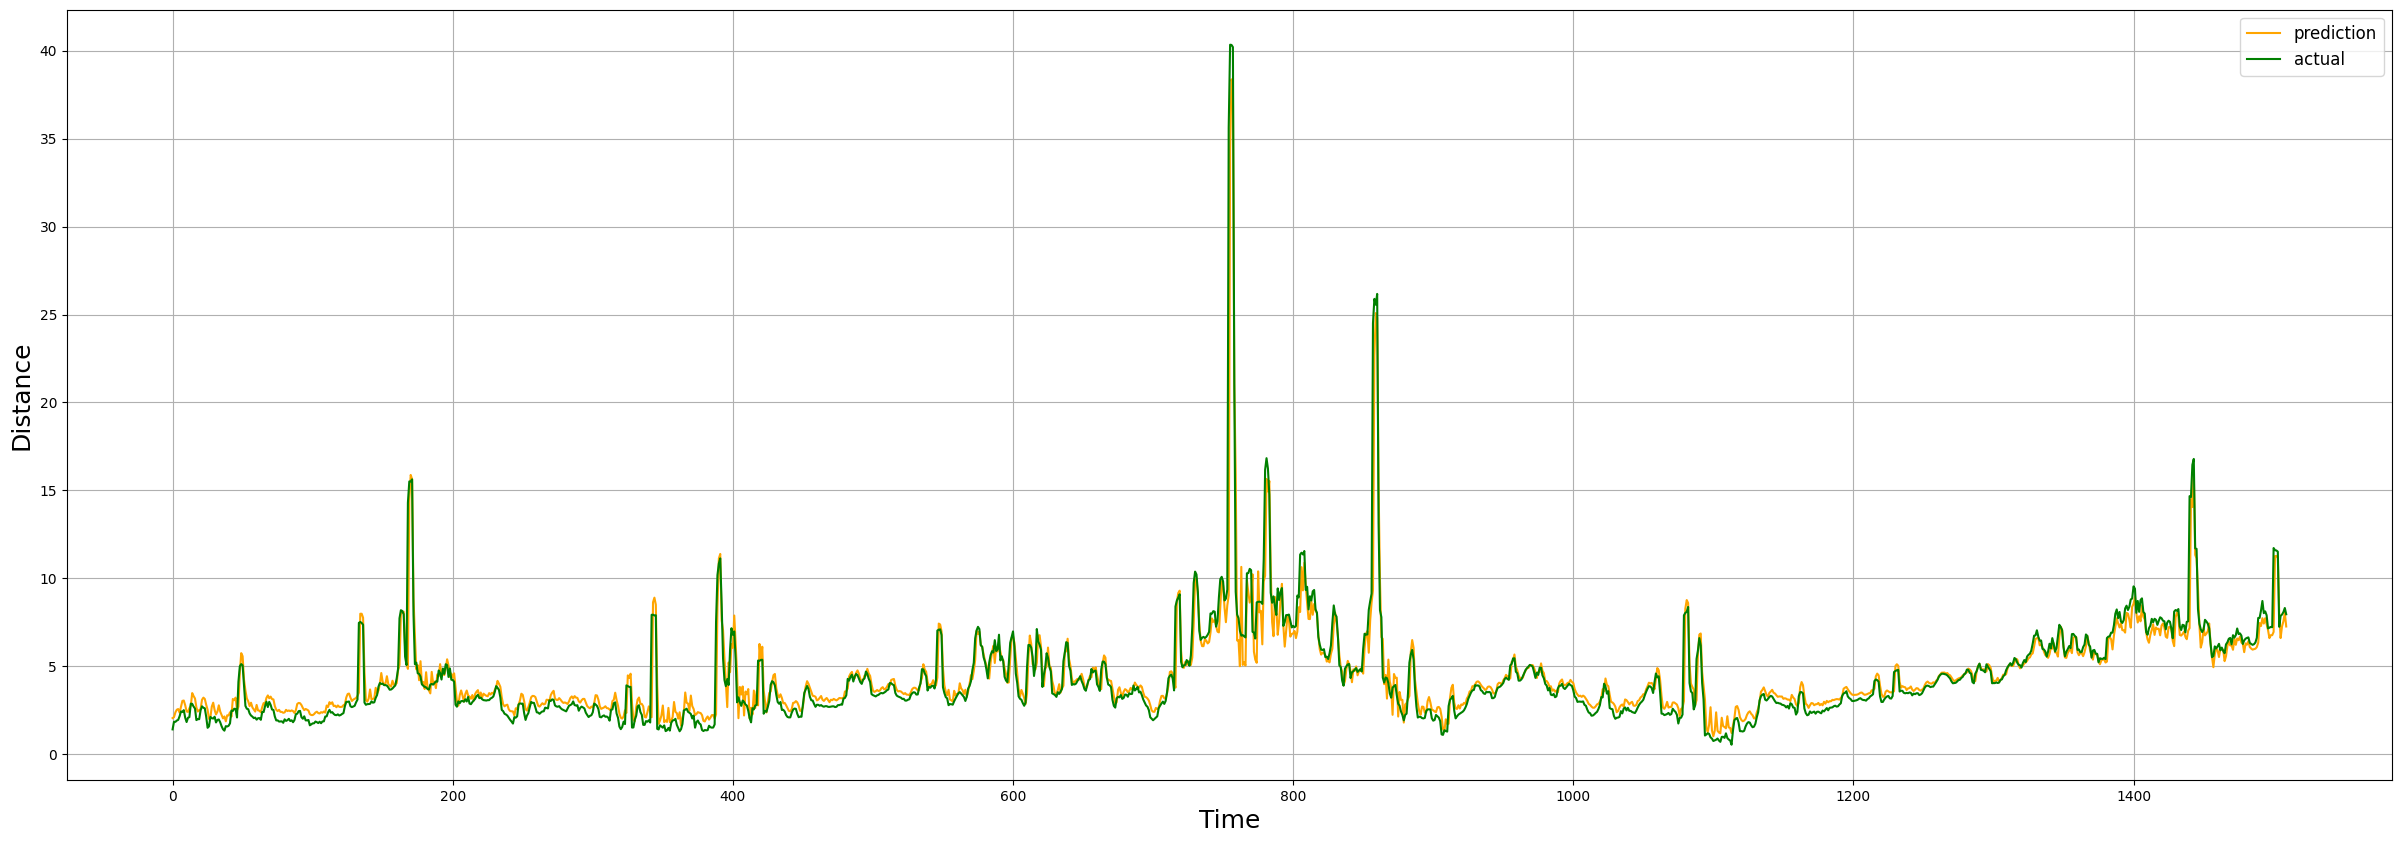

['HDFCBANK', 'UPL']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


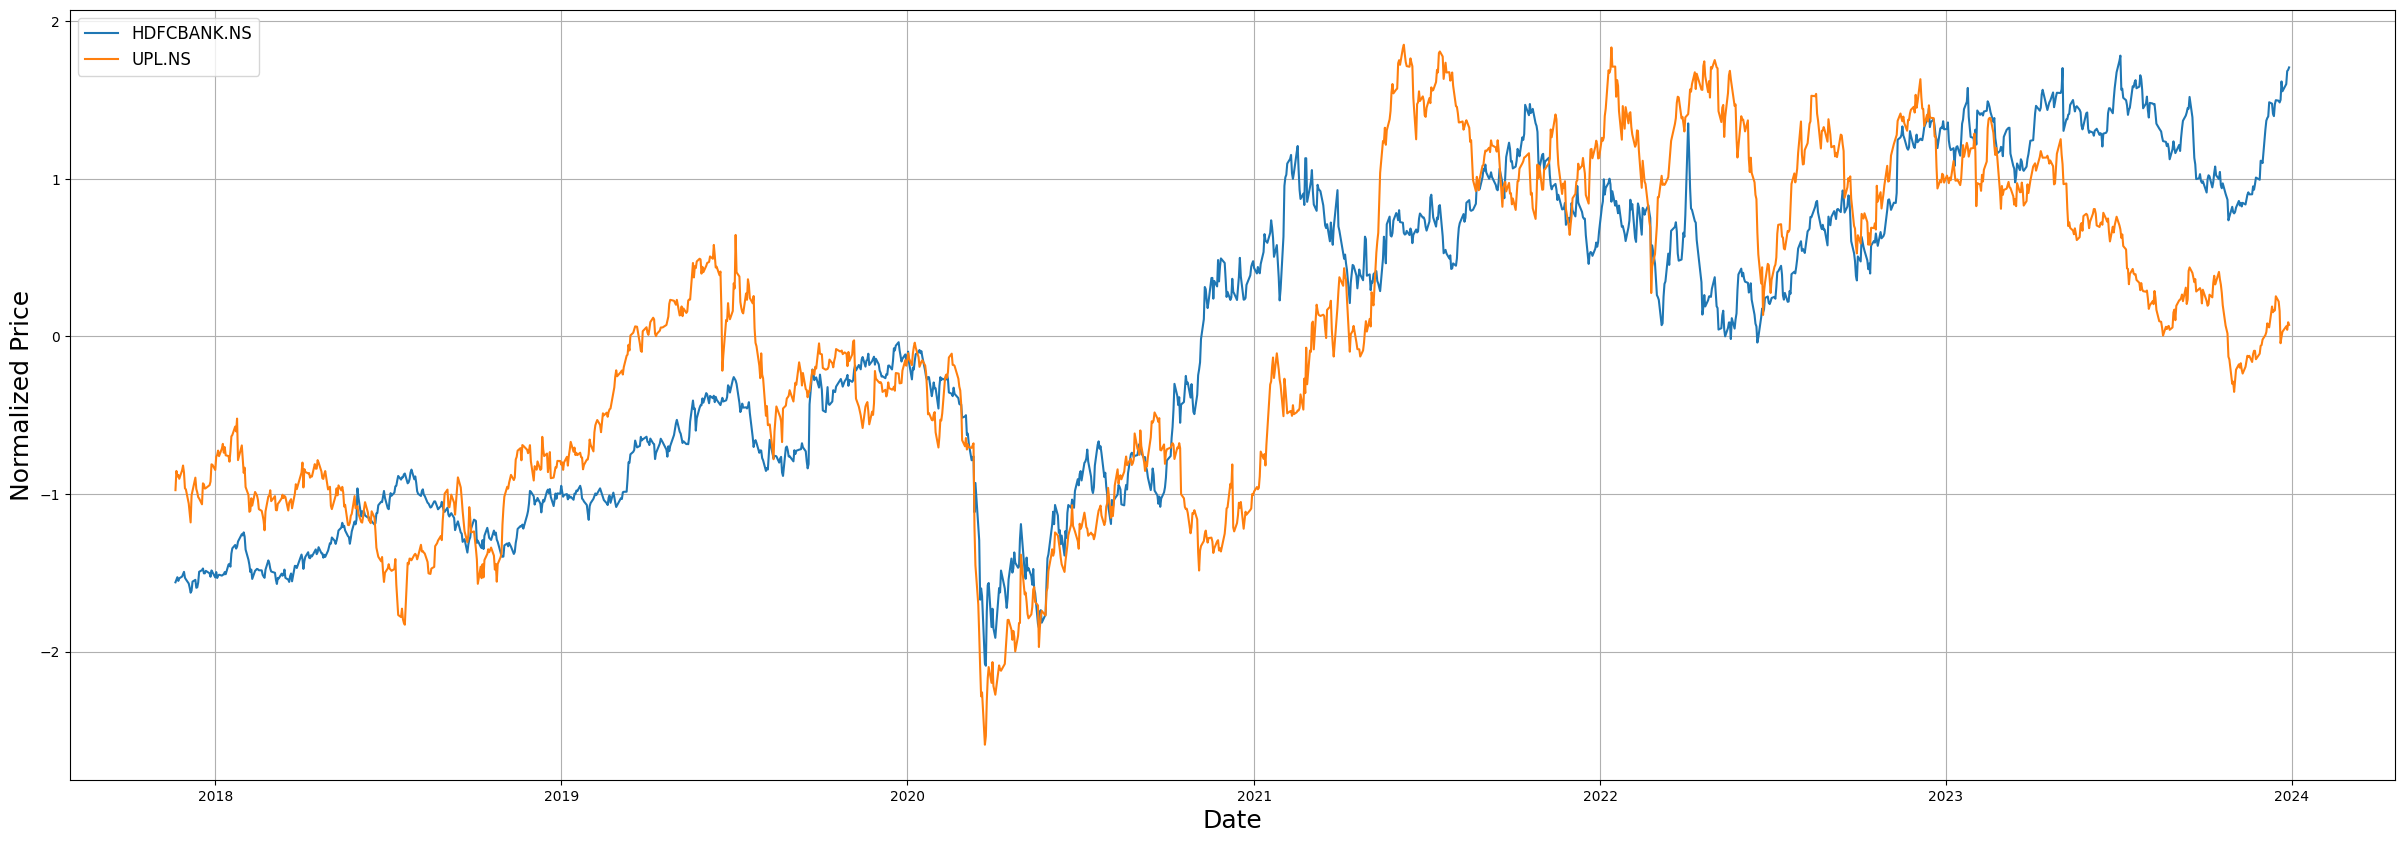

predicted_series_rnn_block1_w20.csv test_data1.csv 20


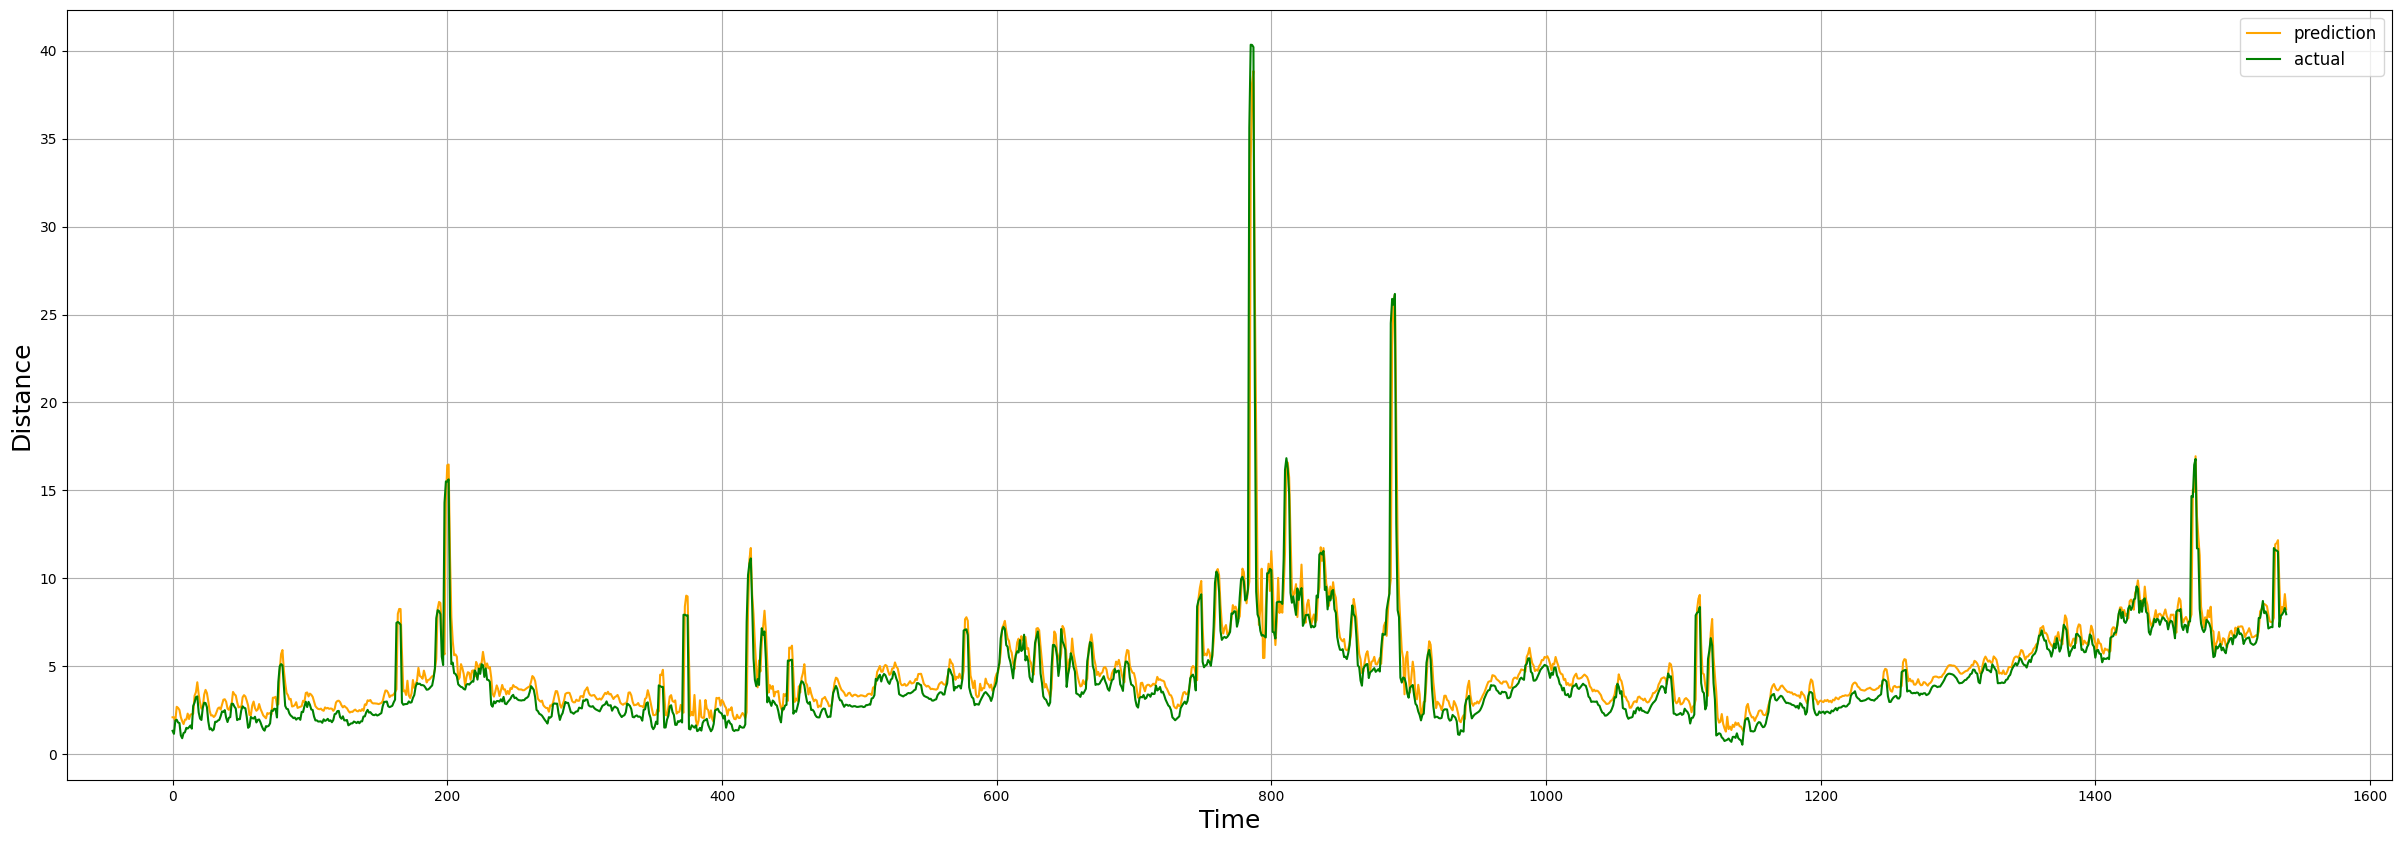

[*********************100%***********************]  1 of 1 completed

['HDFCBANK', 'UPL']



[*********************100%***********************]  1 of 1 completed


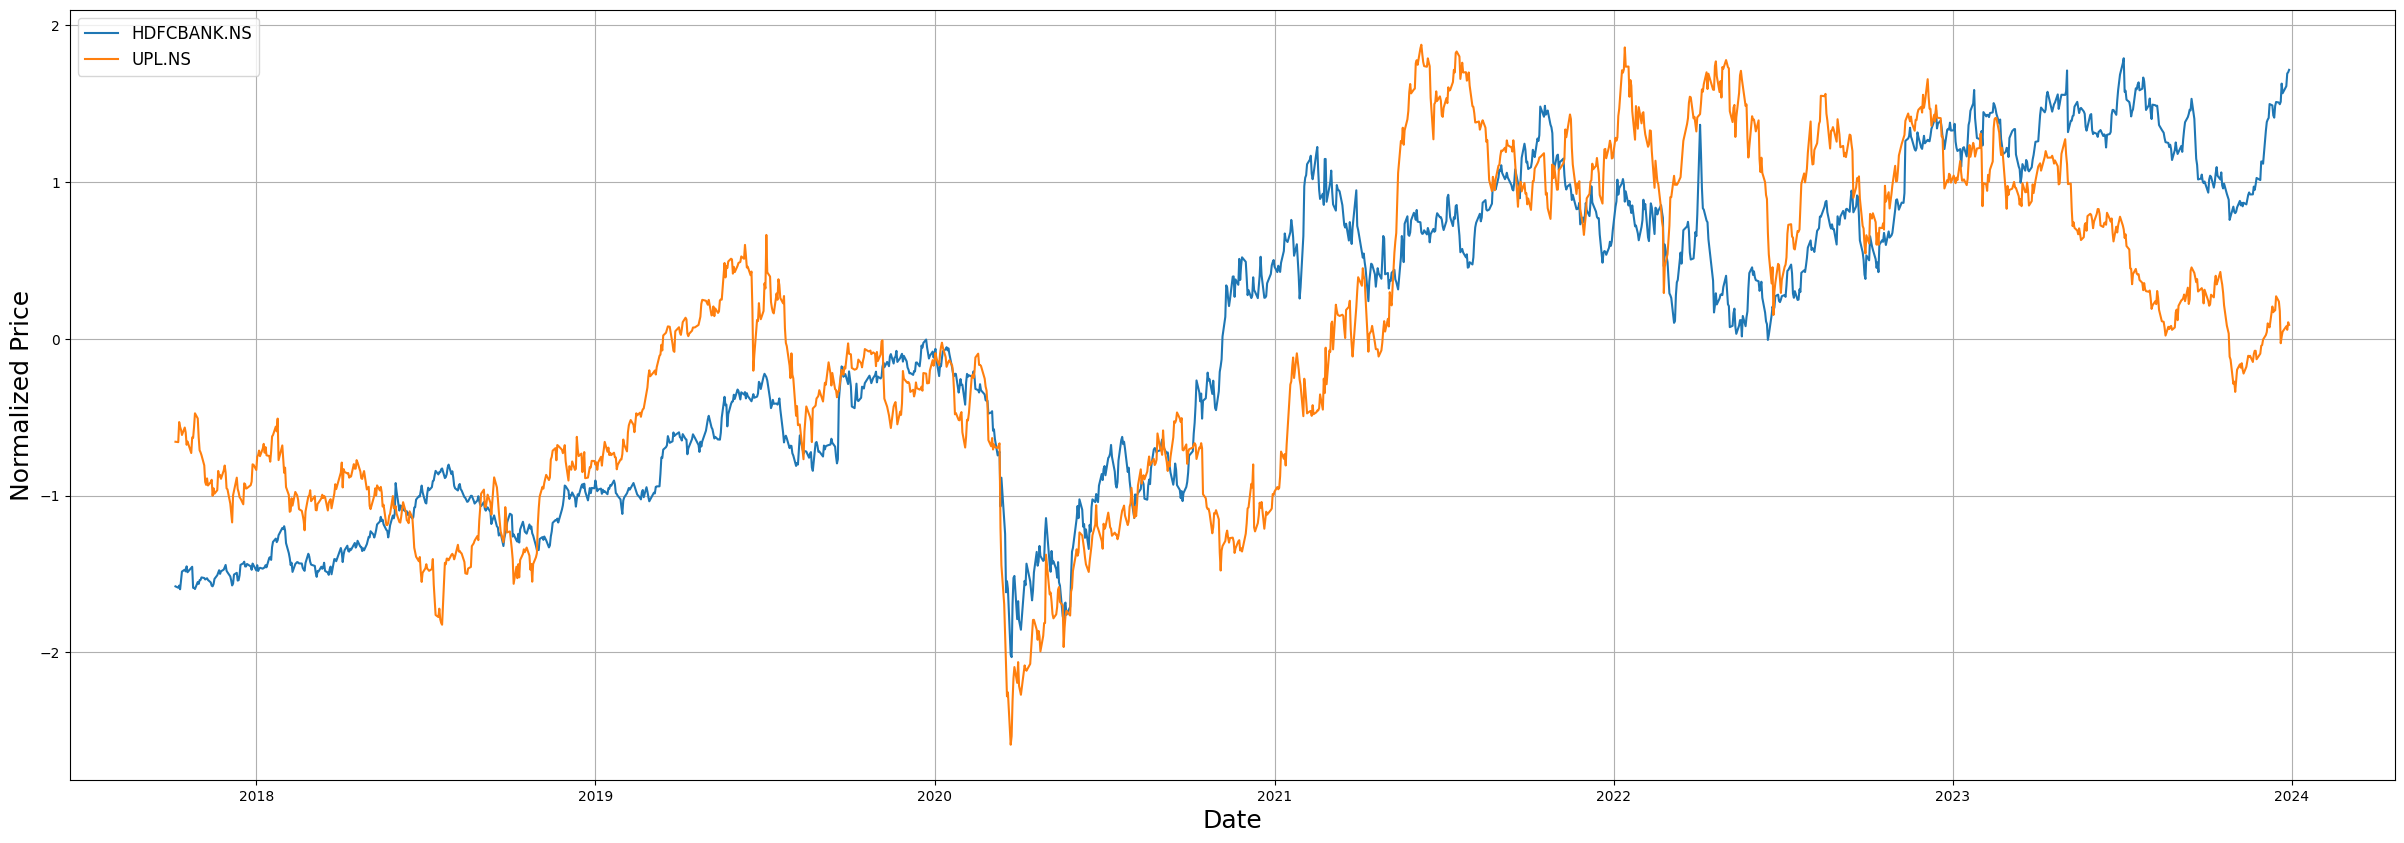

predicted_series_rnn_block10_w50.csv test_data2.csv 50


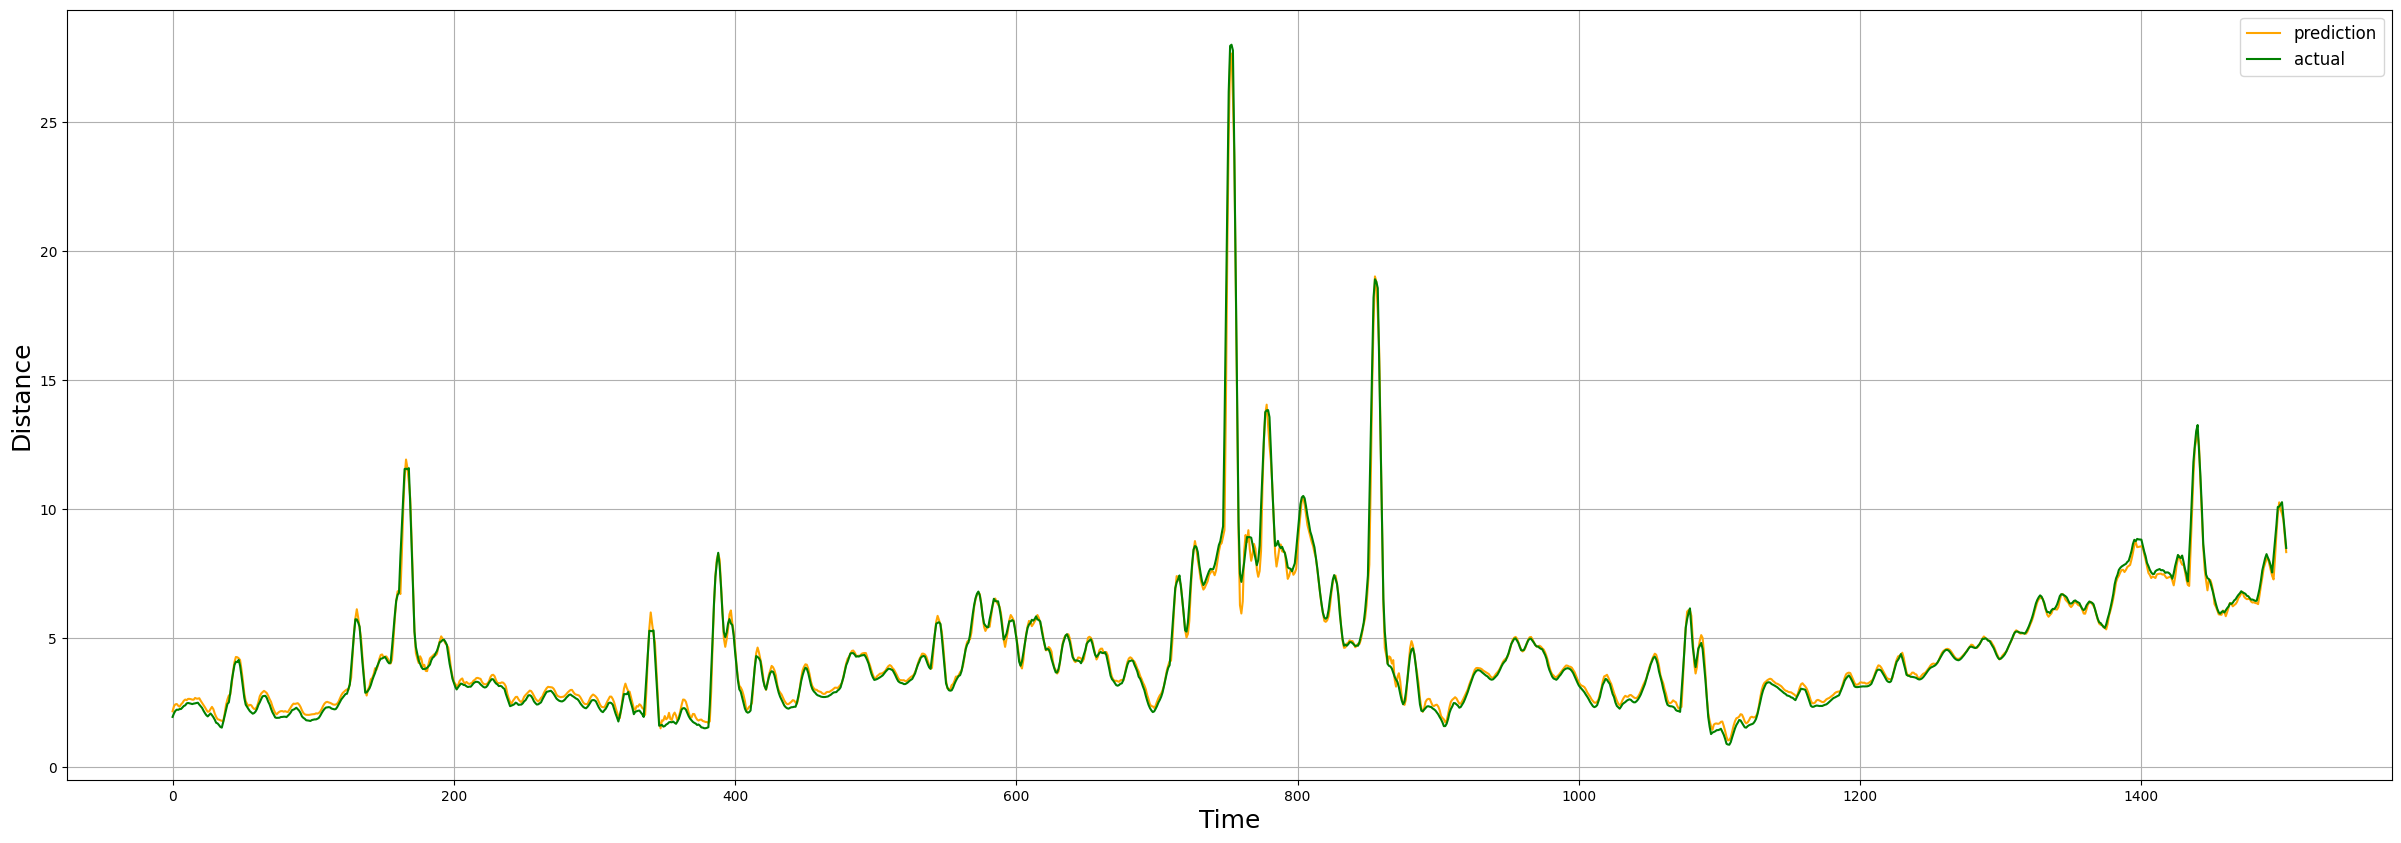

[*********************100%***********************]  1 of 1 completed

['HDFCBANK', 'UPL']



[*********************100%***********************]  1 of 1 completed


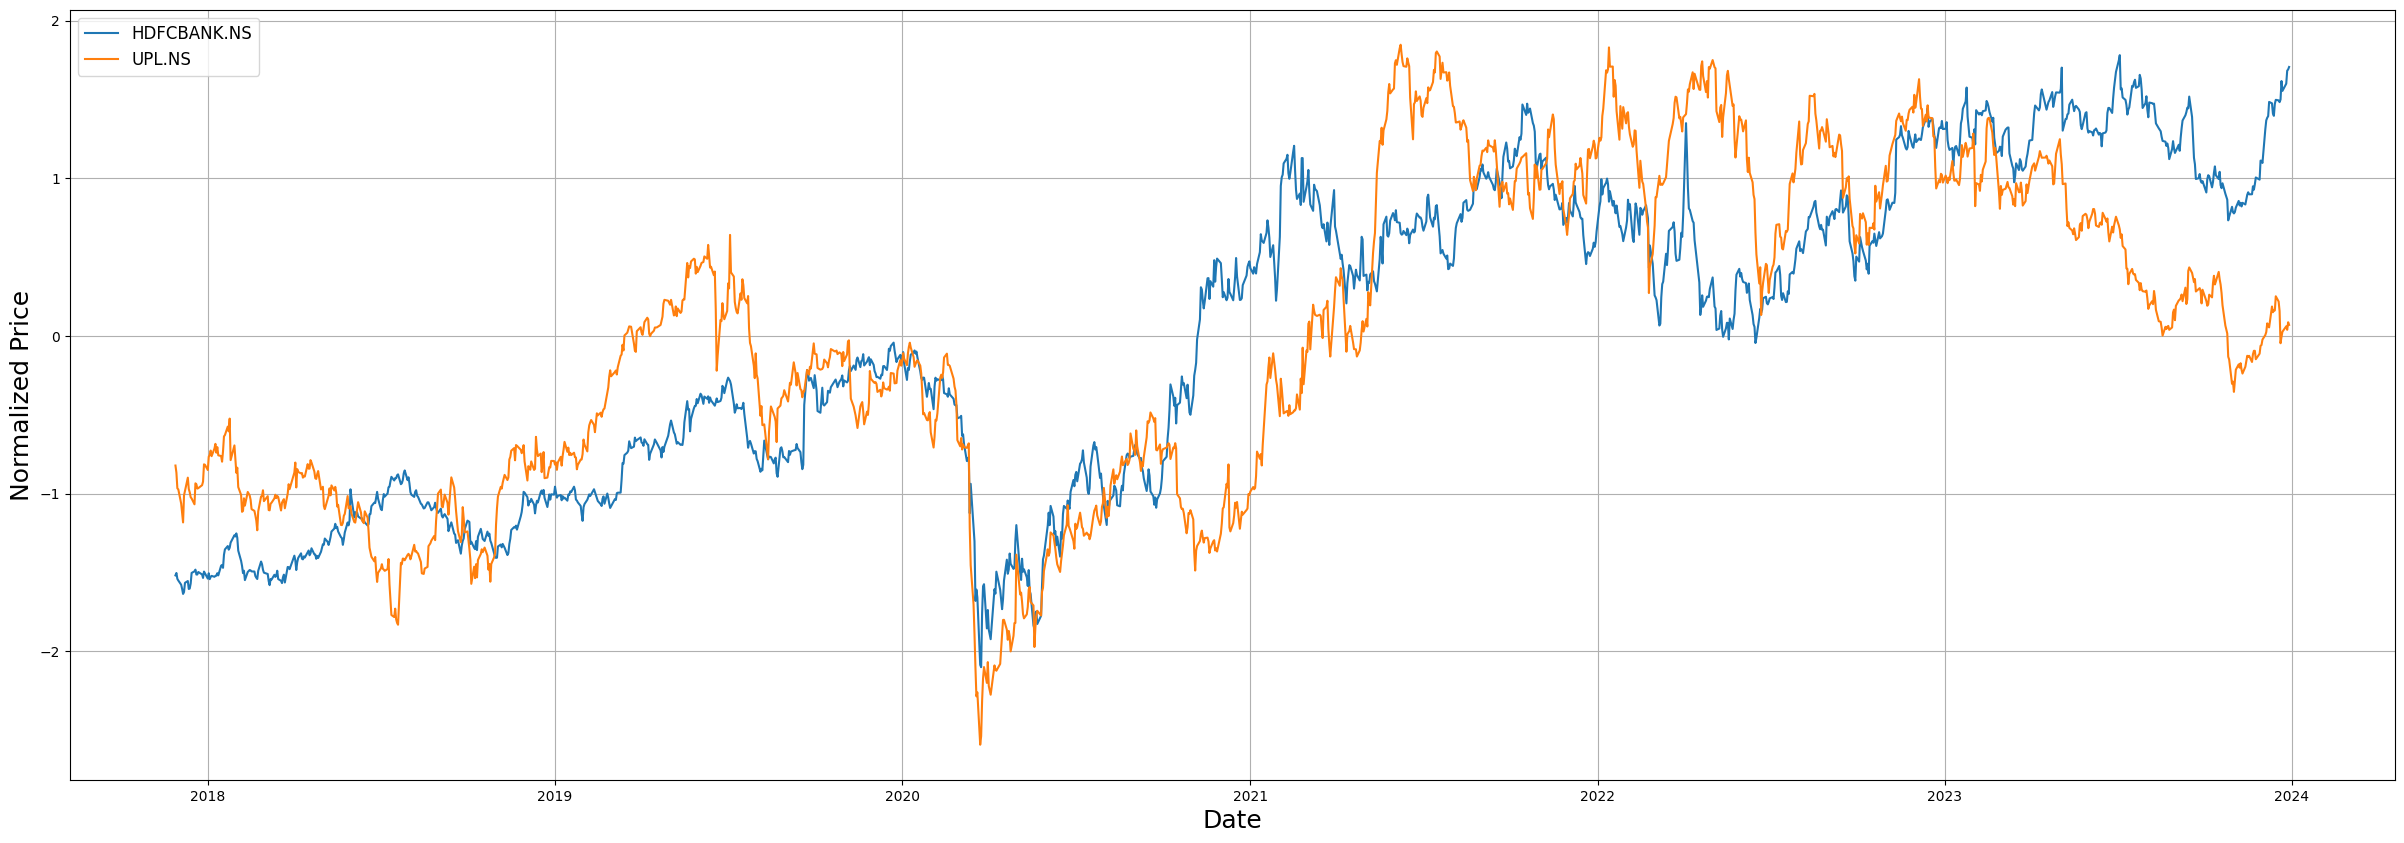

predicted_series_rnn_block10_w20.csv test_data2.csv 20


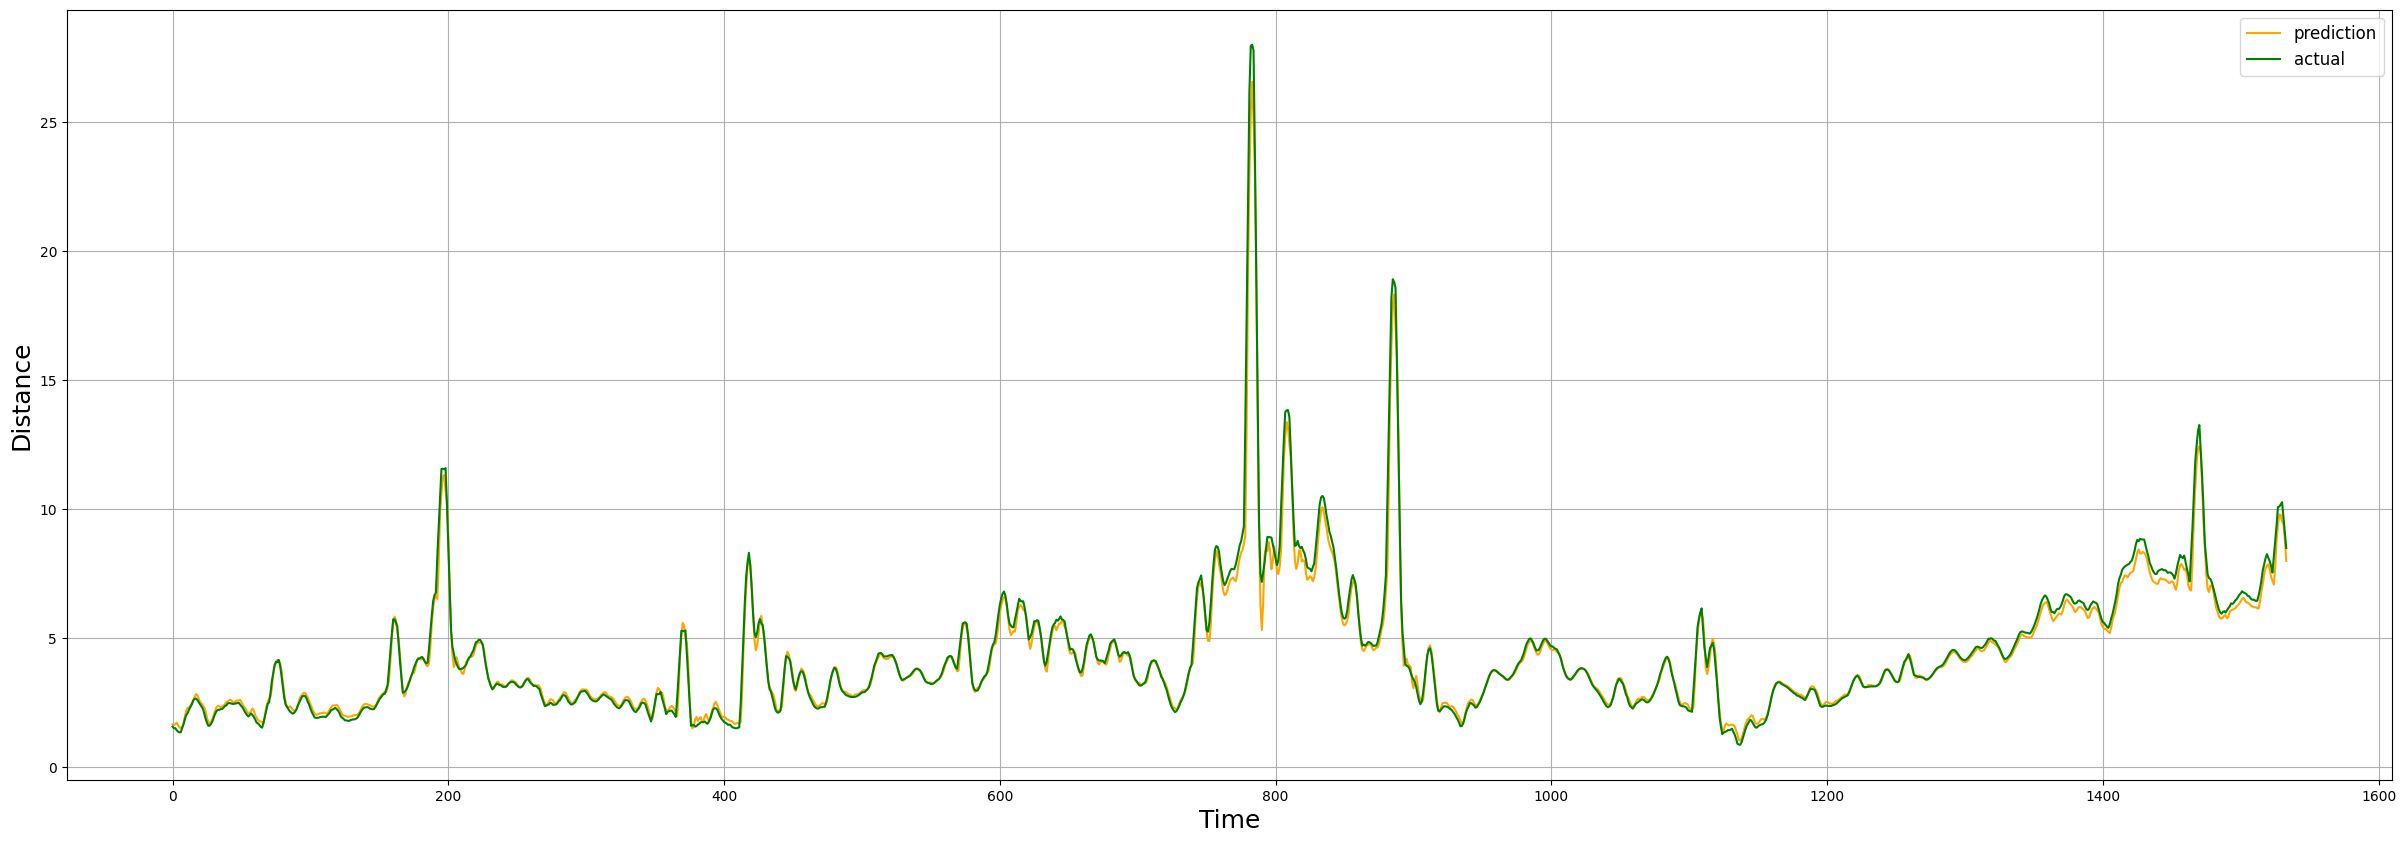

[*********************100%***********************]  1 of 1 completed

['HDFCBANK', 'UPL']



[*********************100%***********************]  1 of 1 completed


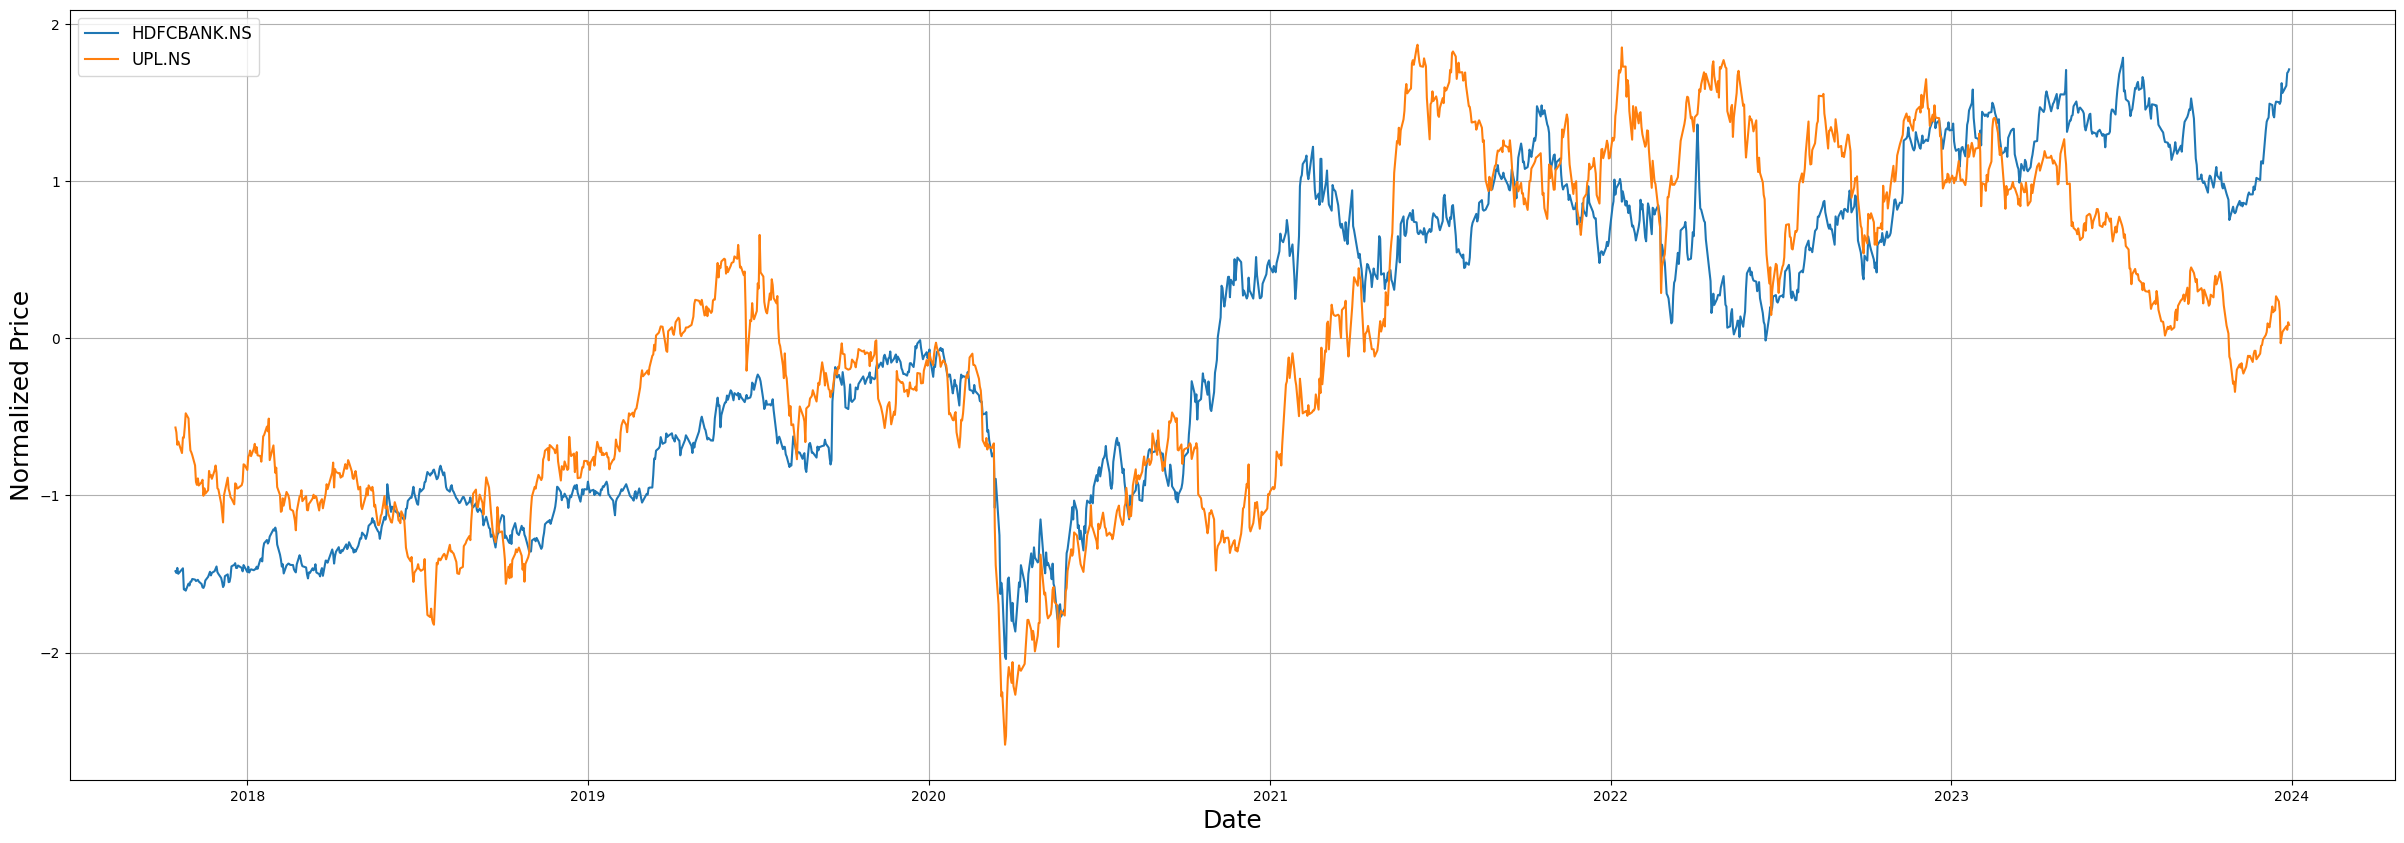

predicted_series_rnn_block20_w50.csv test_data3.csv 50


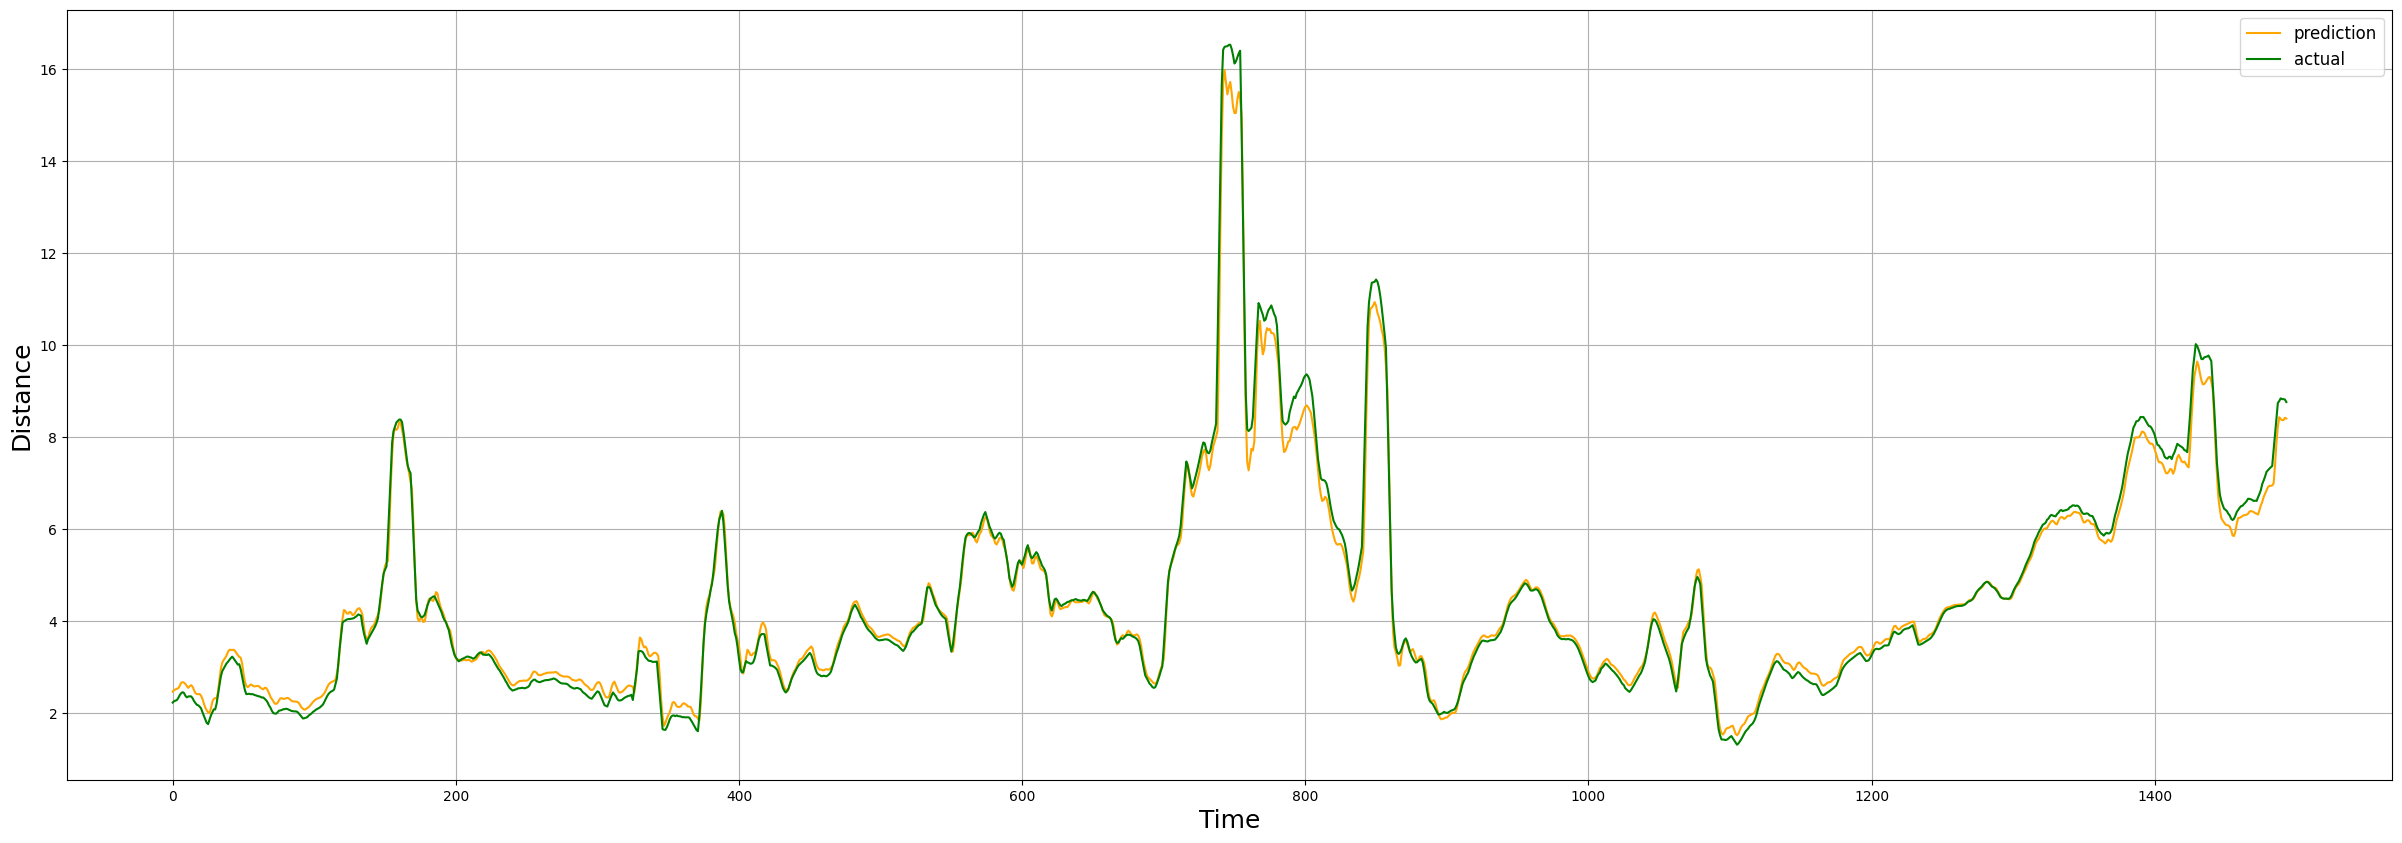

['HDFCBANK', 'UPL']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


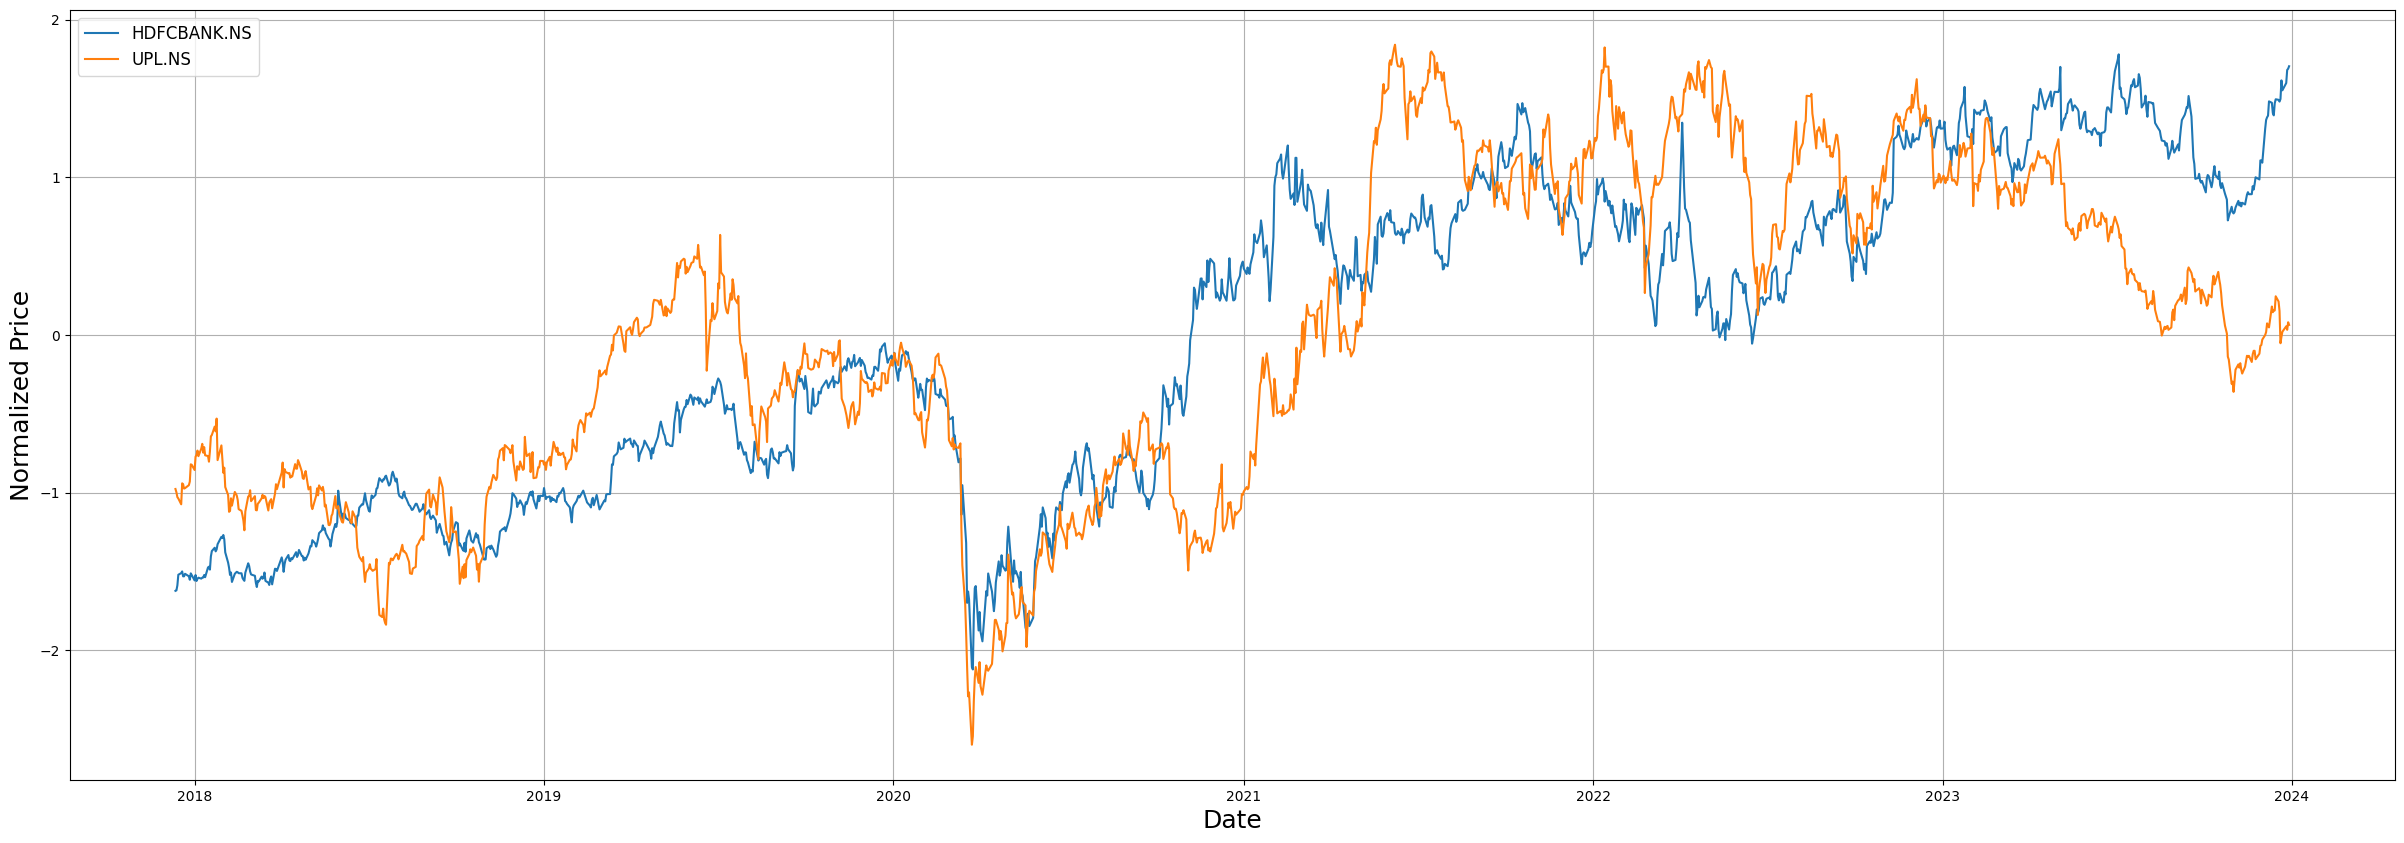

predicted_series_rnn_block20_w20.csv test_data3.csv 20


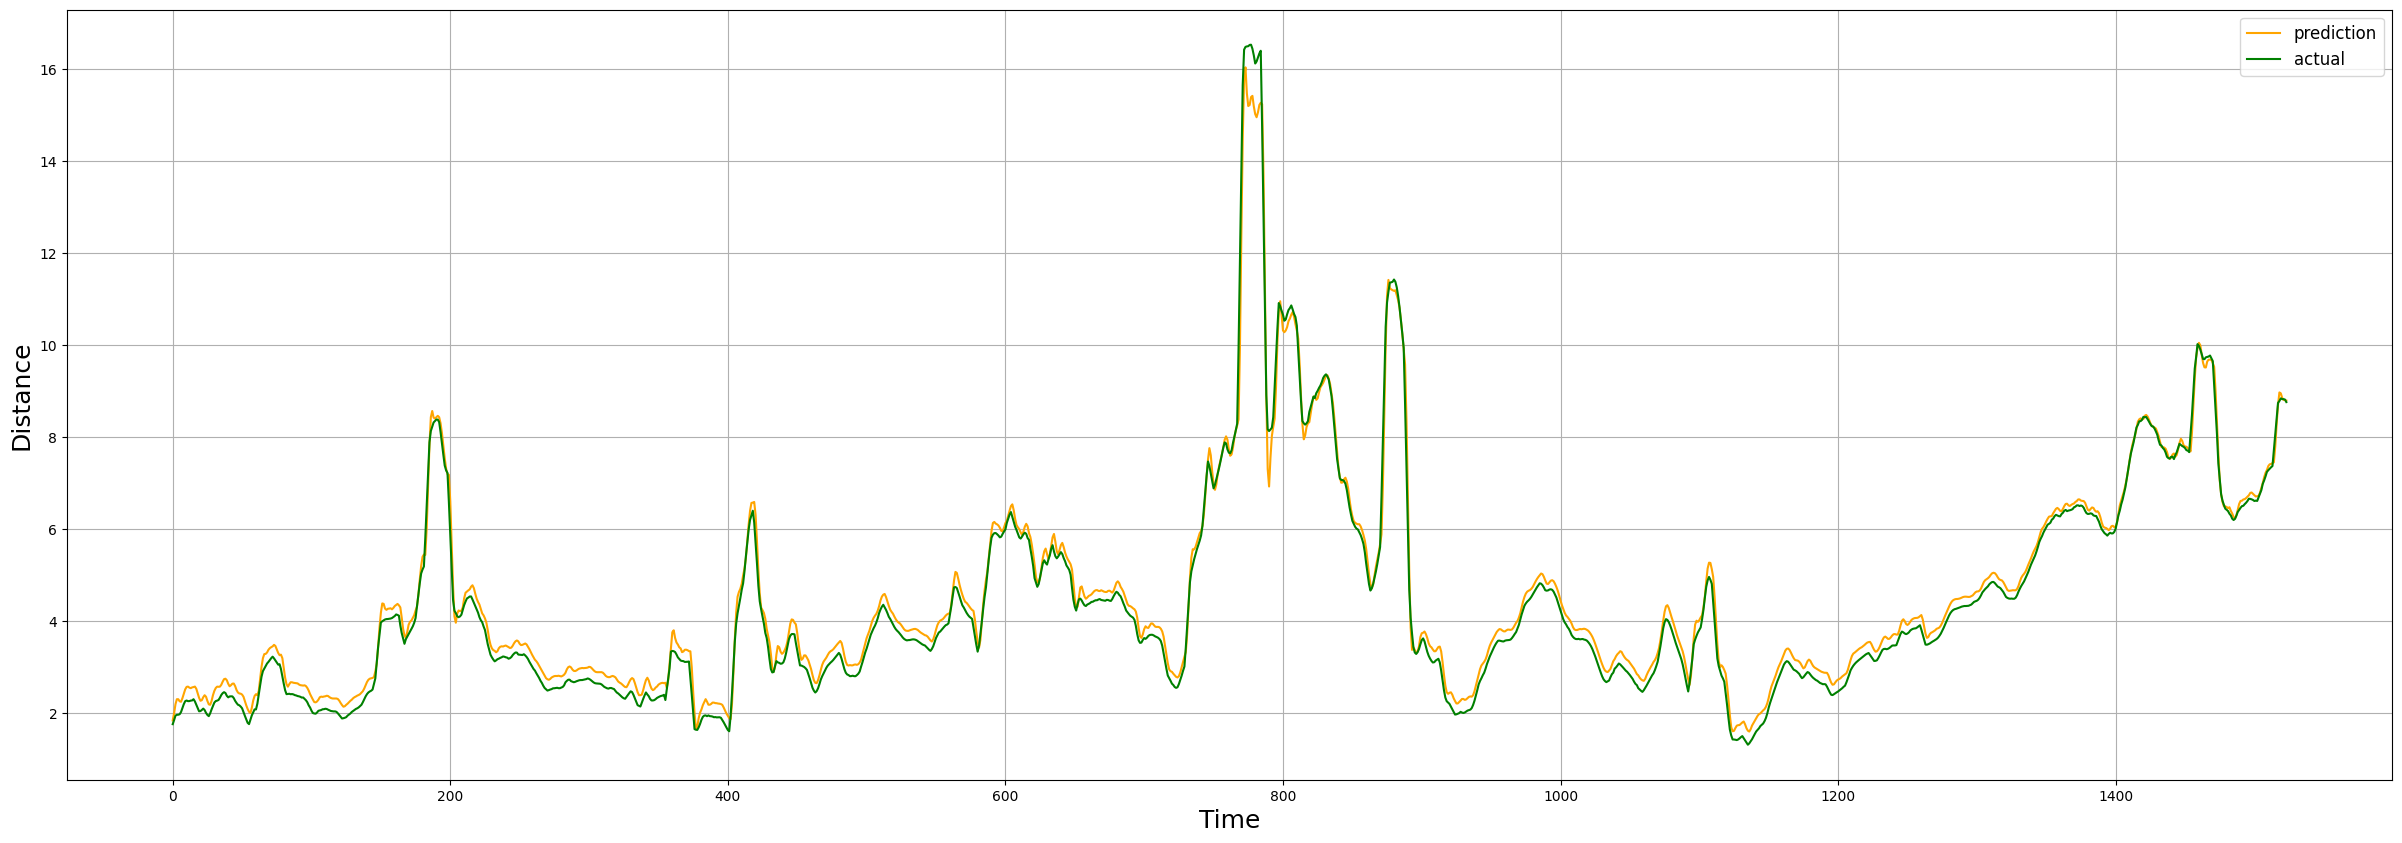

[*********************100%***********************]  1 of 1 completed

['HDFCBANK', 'UPL']



[*********************100%***********************]  1 of 1 completed


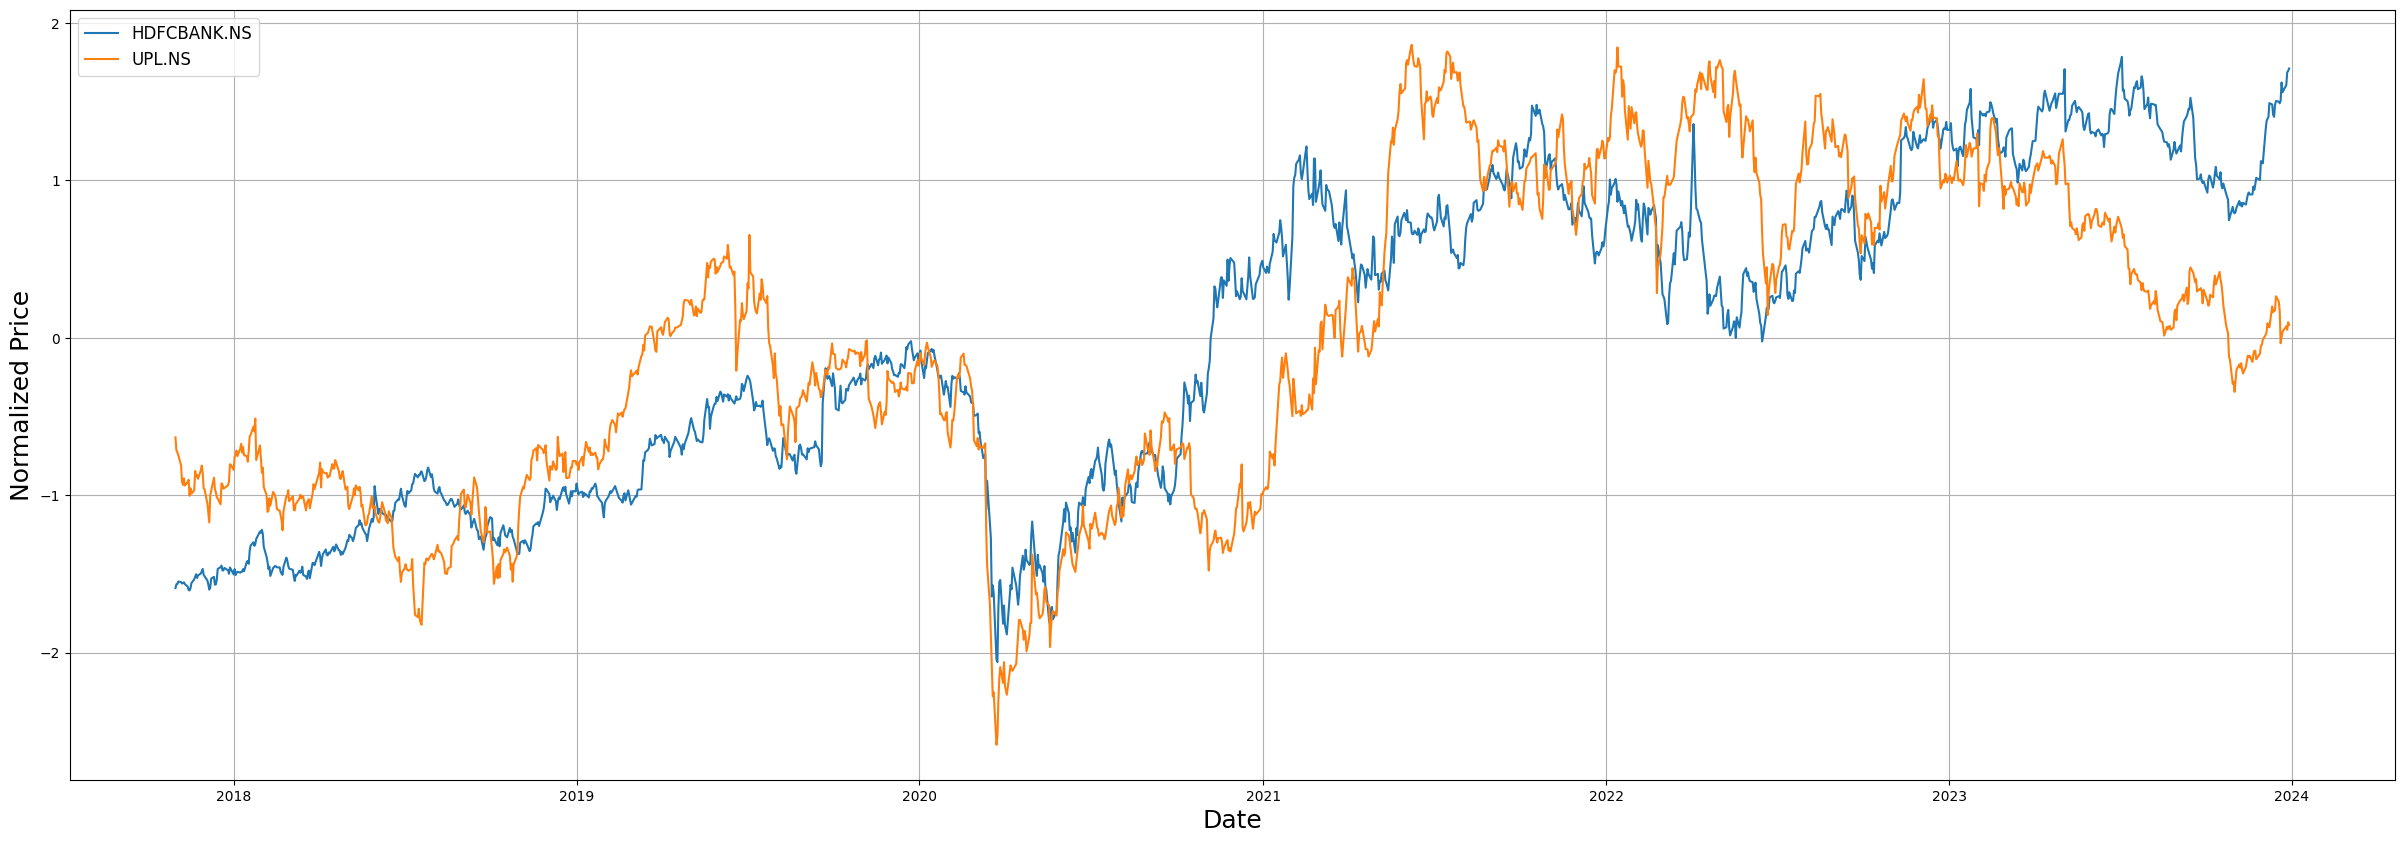

predicted_series_rnn_block30_w50.csv test_data4.csv 50


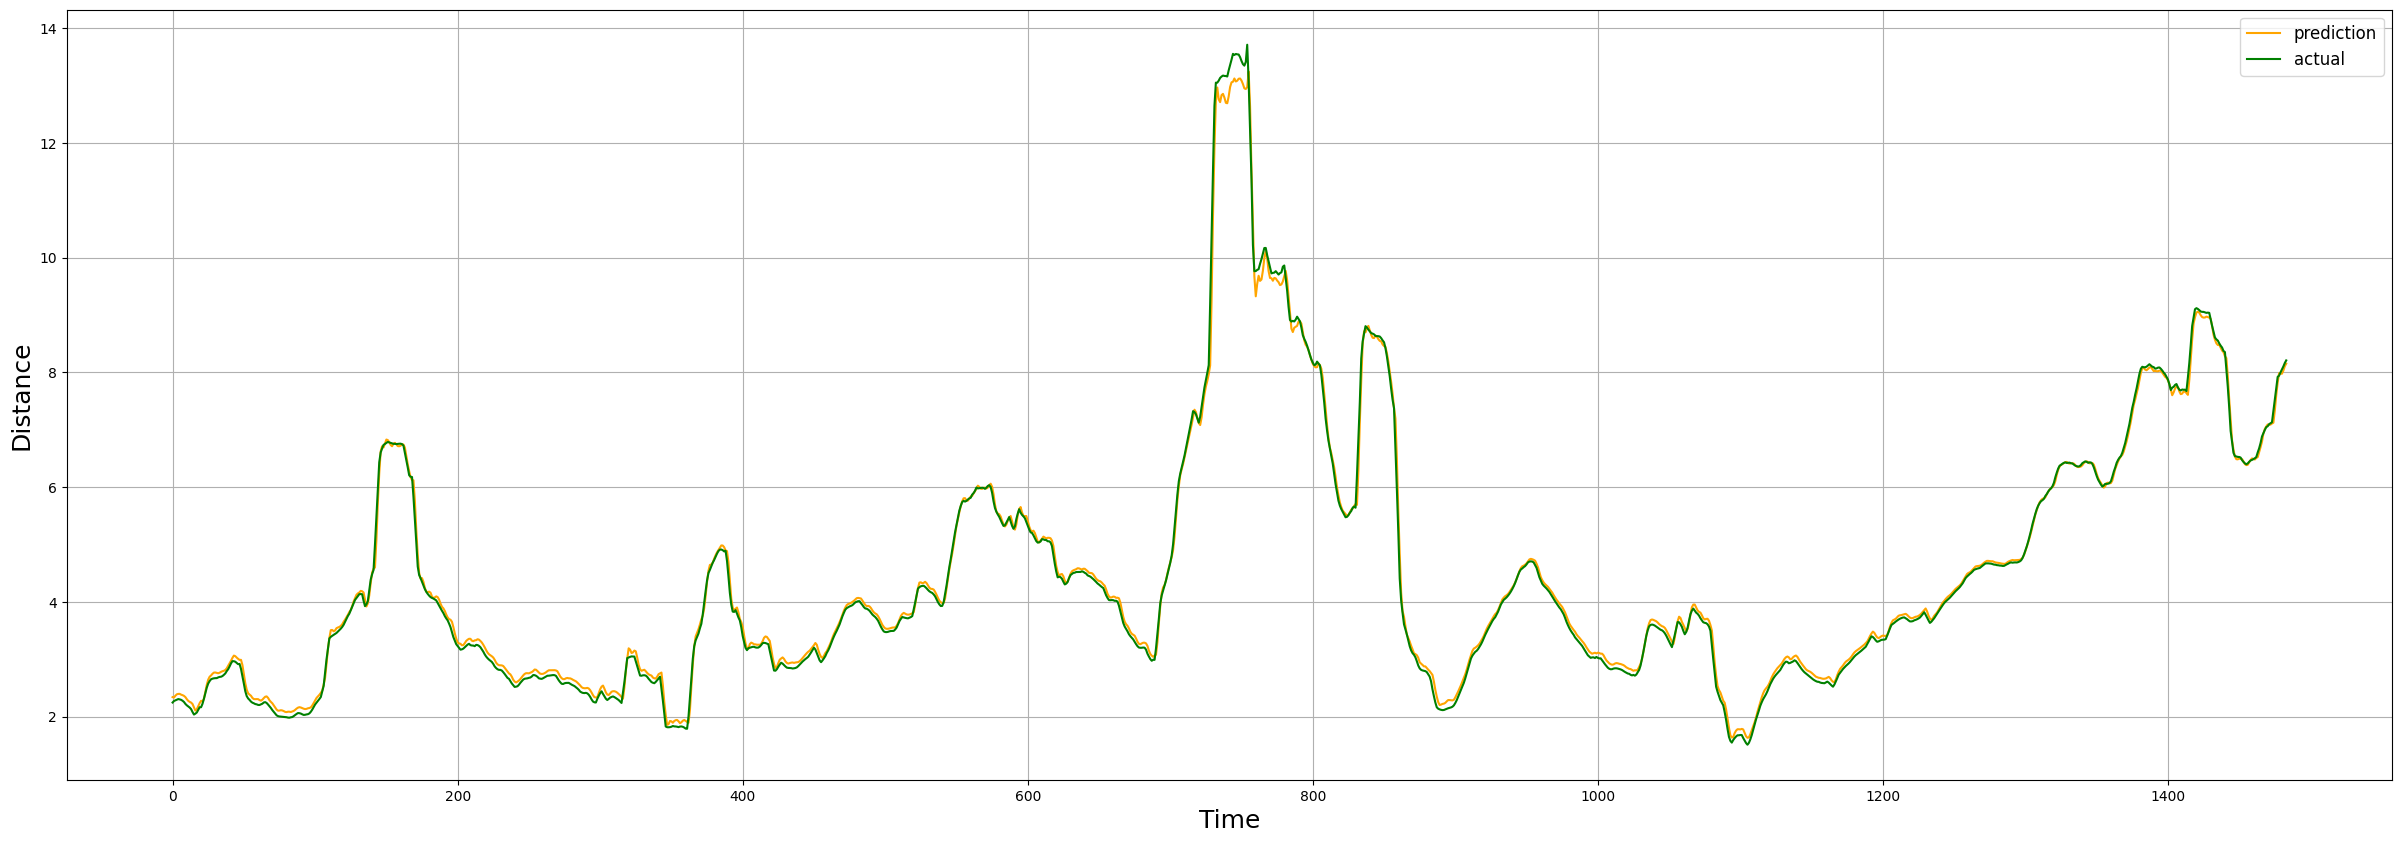

['HDFCBANK', 'UPL']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


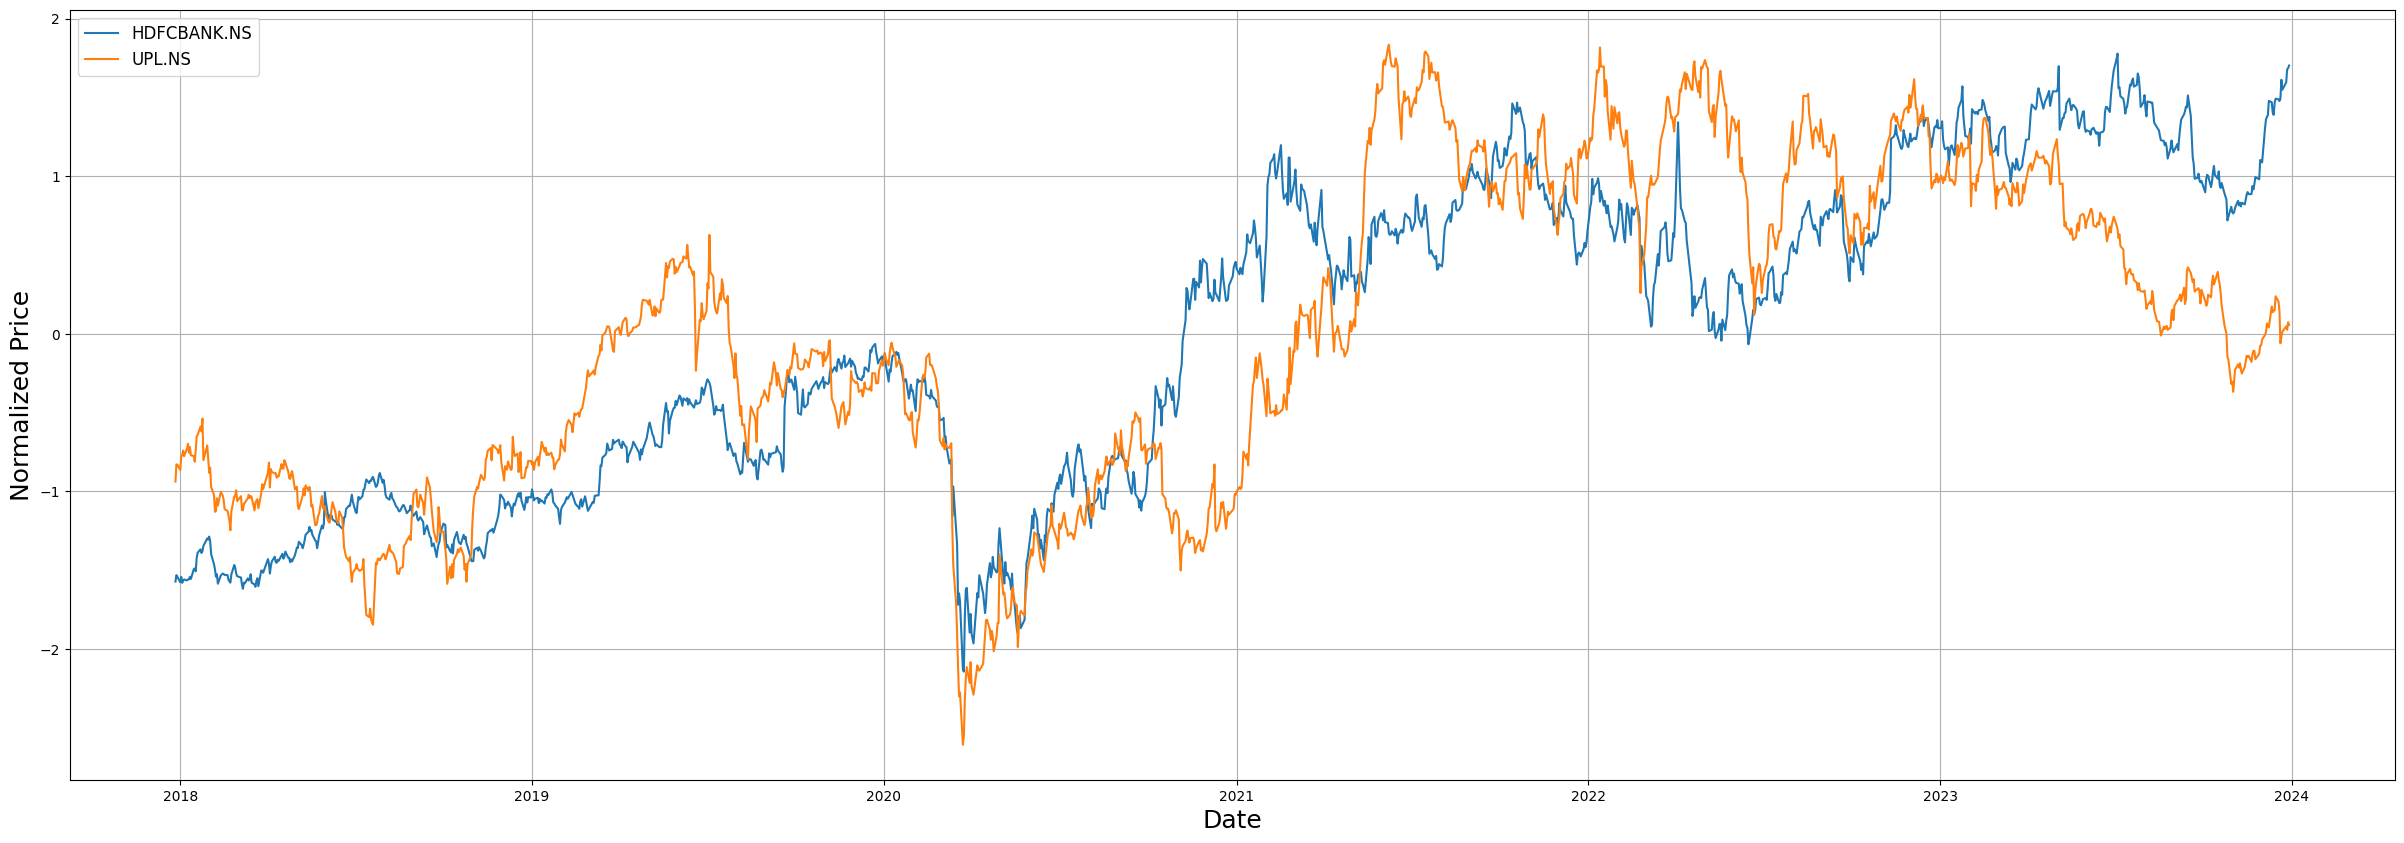

predicted_series_rnn_block30_w20.csv test_data4.csv 20


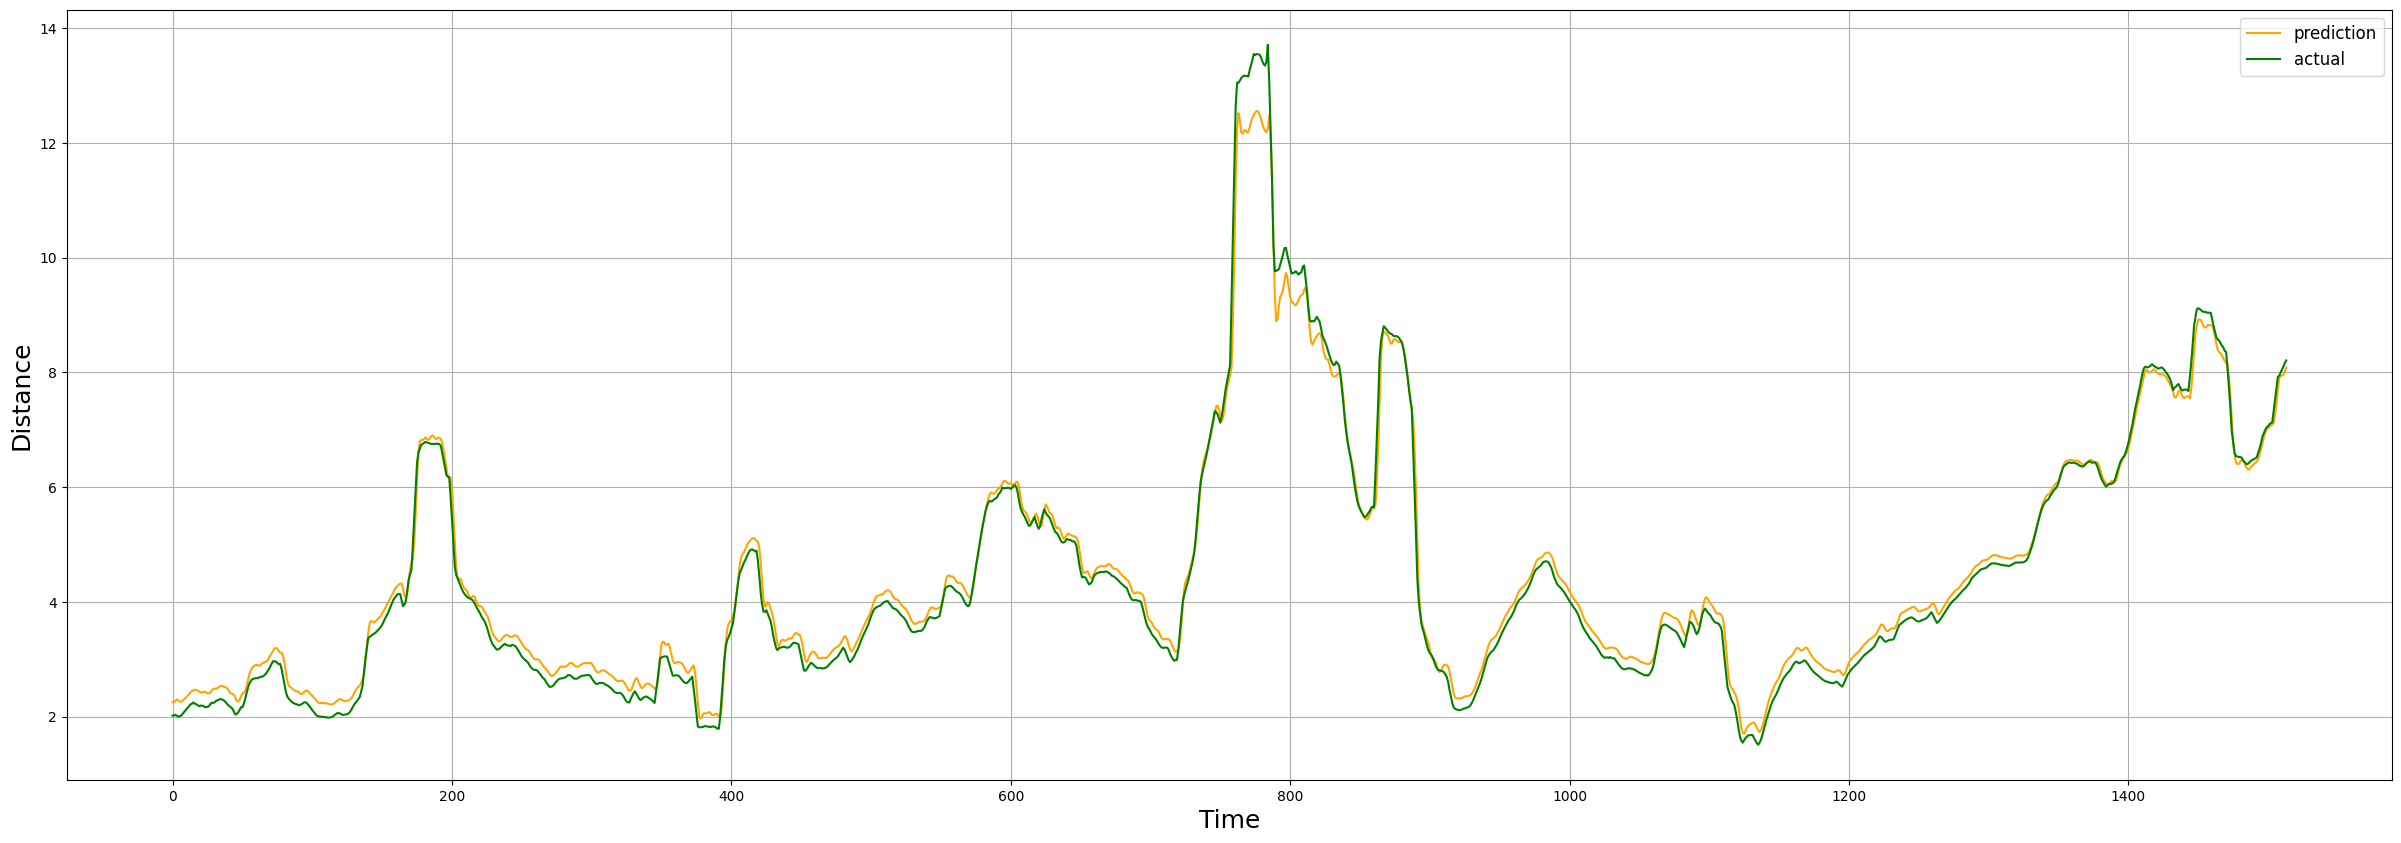

[*********************100%***********************]  1 of 1 completed

['HDFCBANK', 'UPL']



[*********************100%***********************]  1 of 1 completed


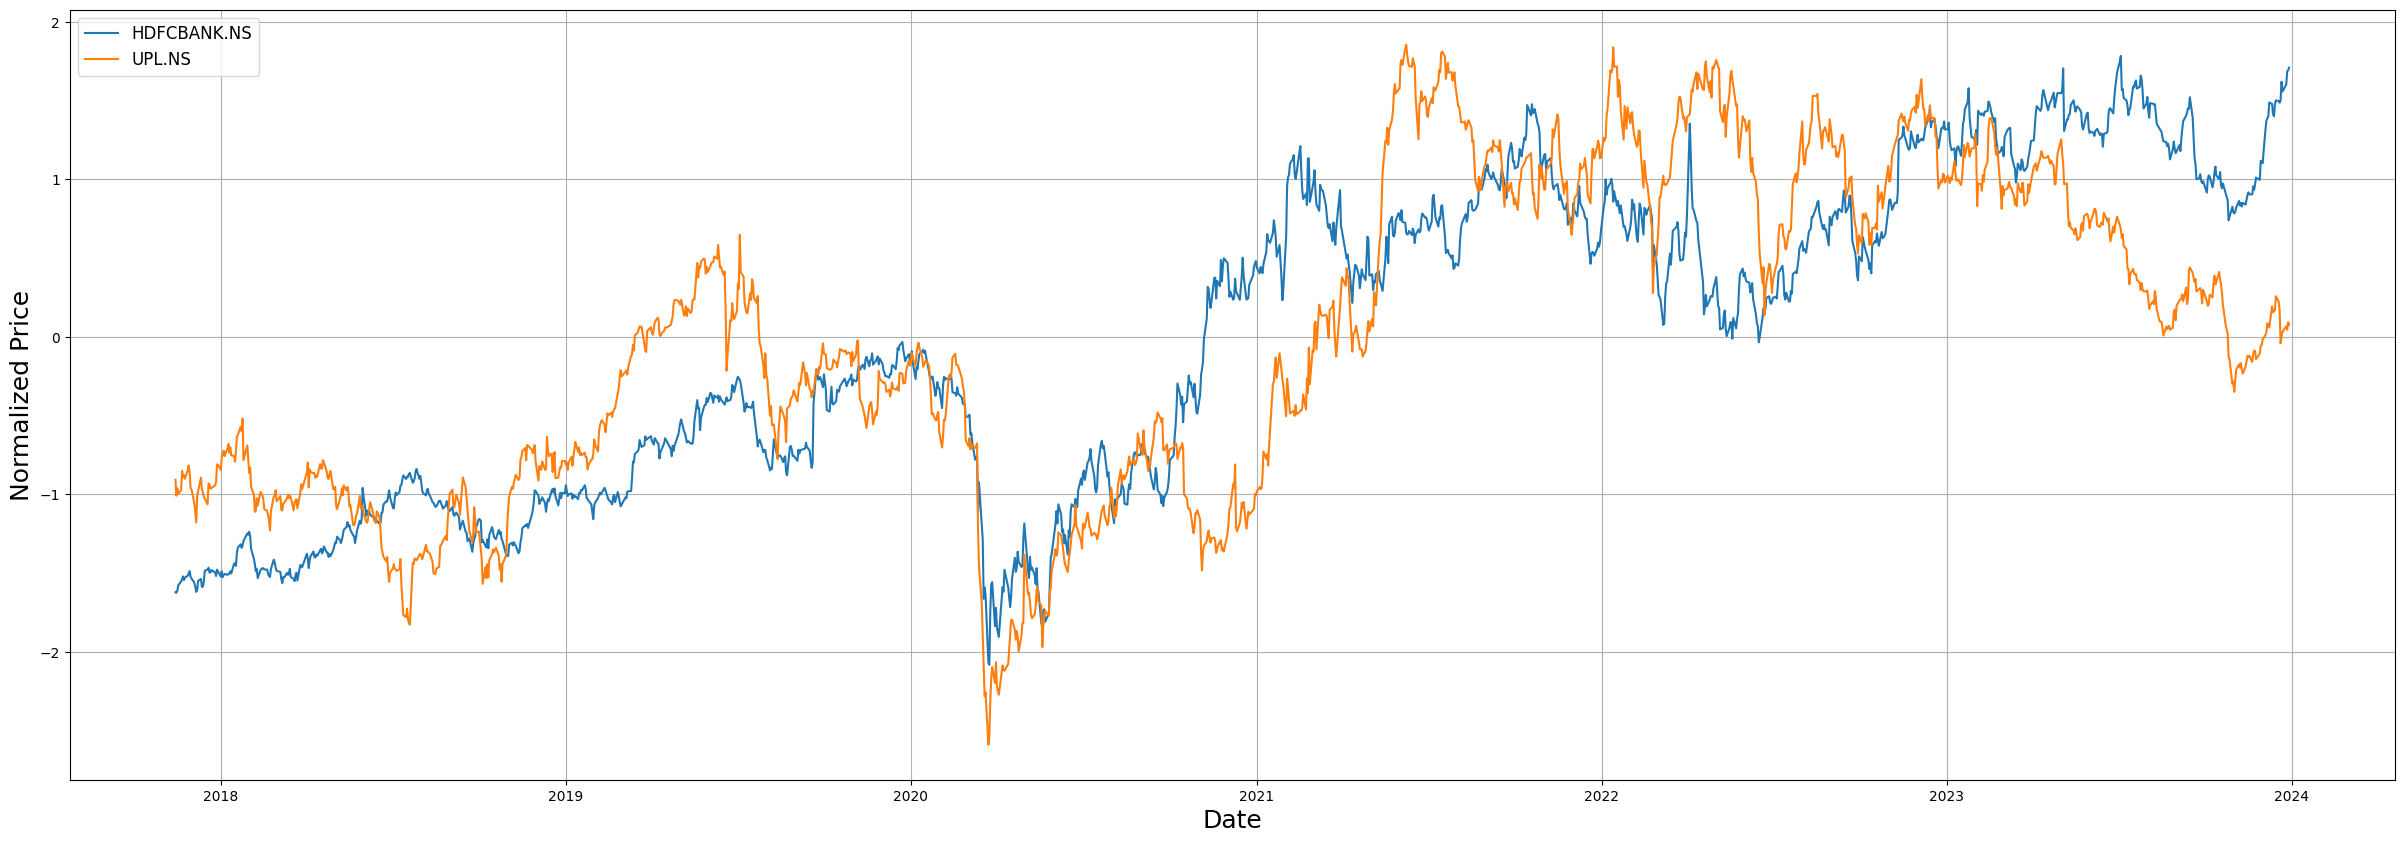

predicted_series_lstm_block1_w50.csv test_data1.csv 50


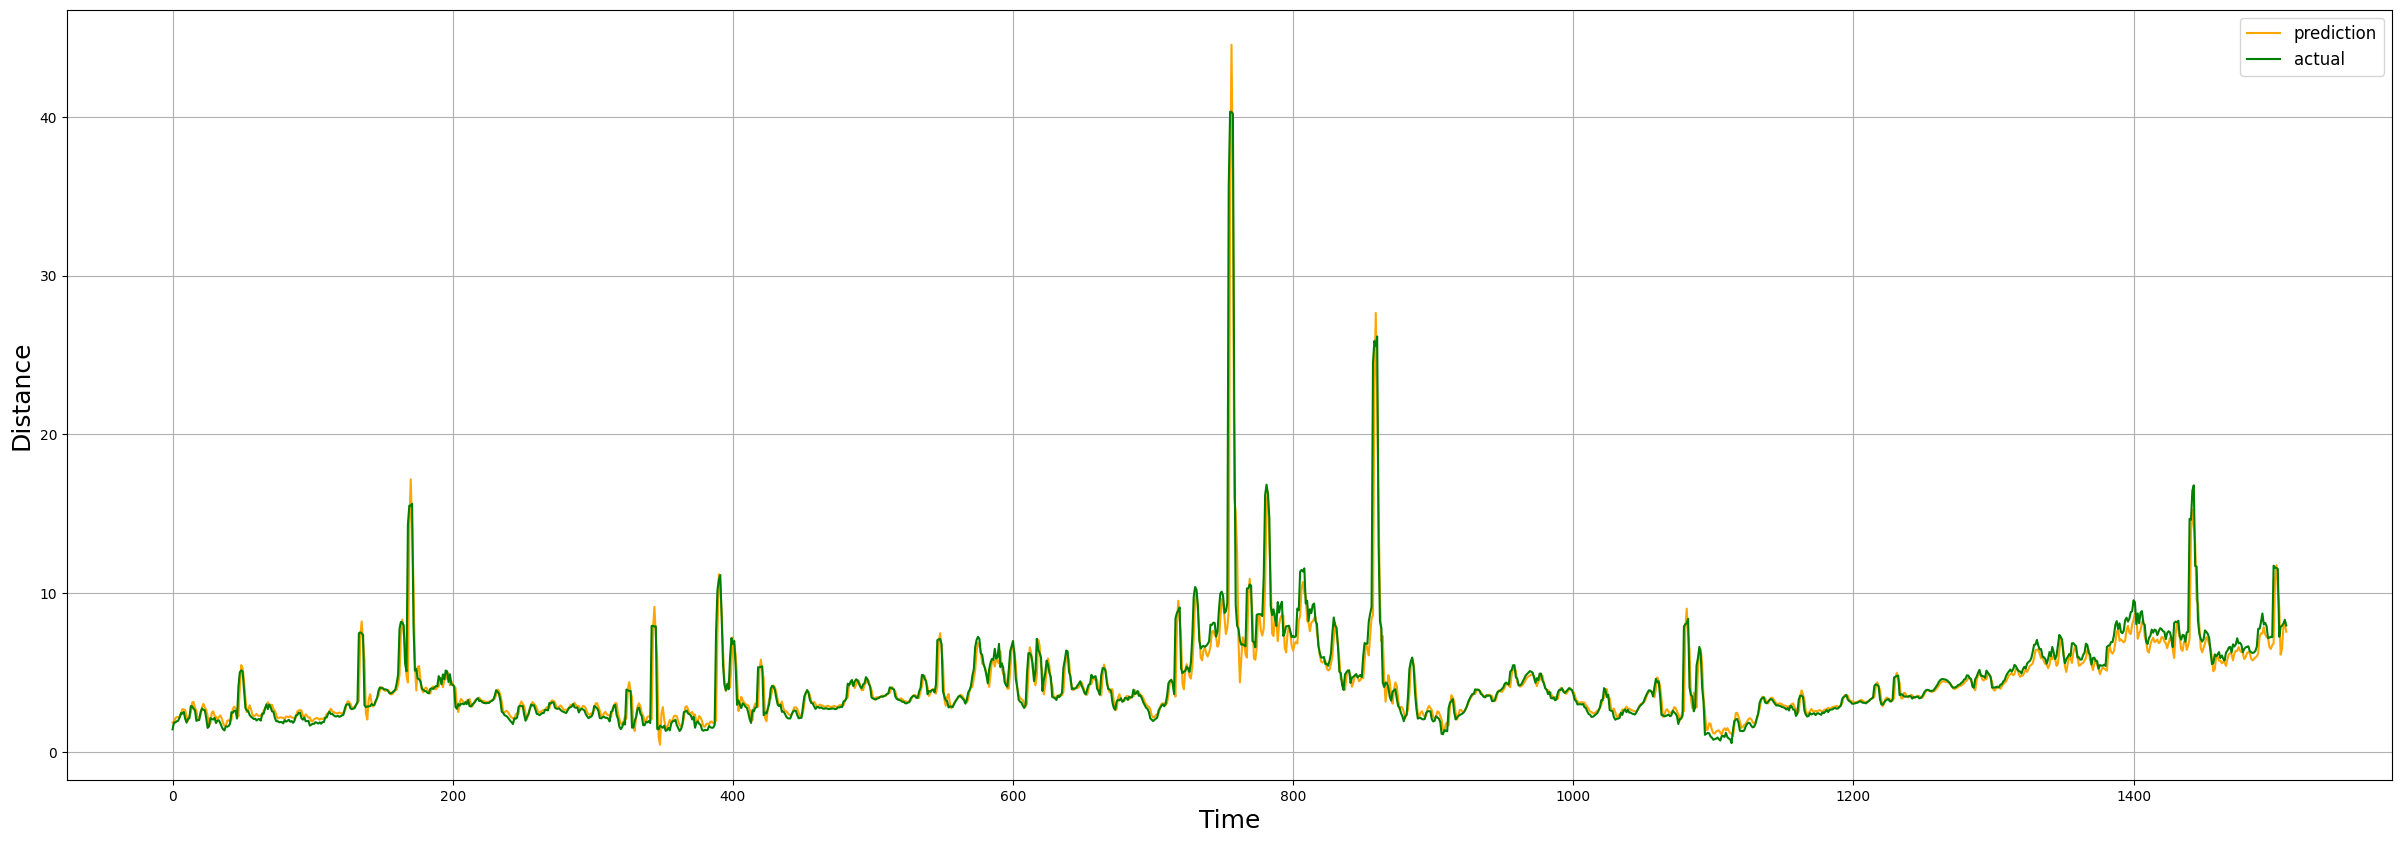

[*********************100%***********************]  1 of 1 completed

['HDFCBANK', 'UPL']



[*********************100%***********************]  1 of 1 completed


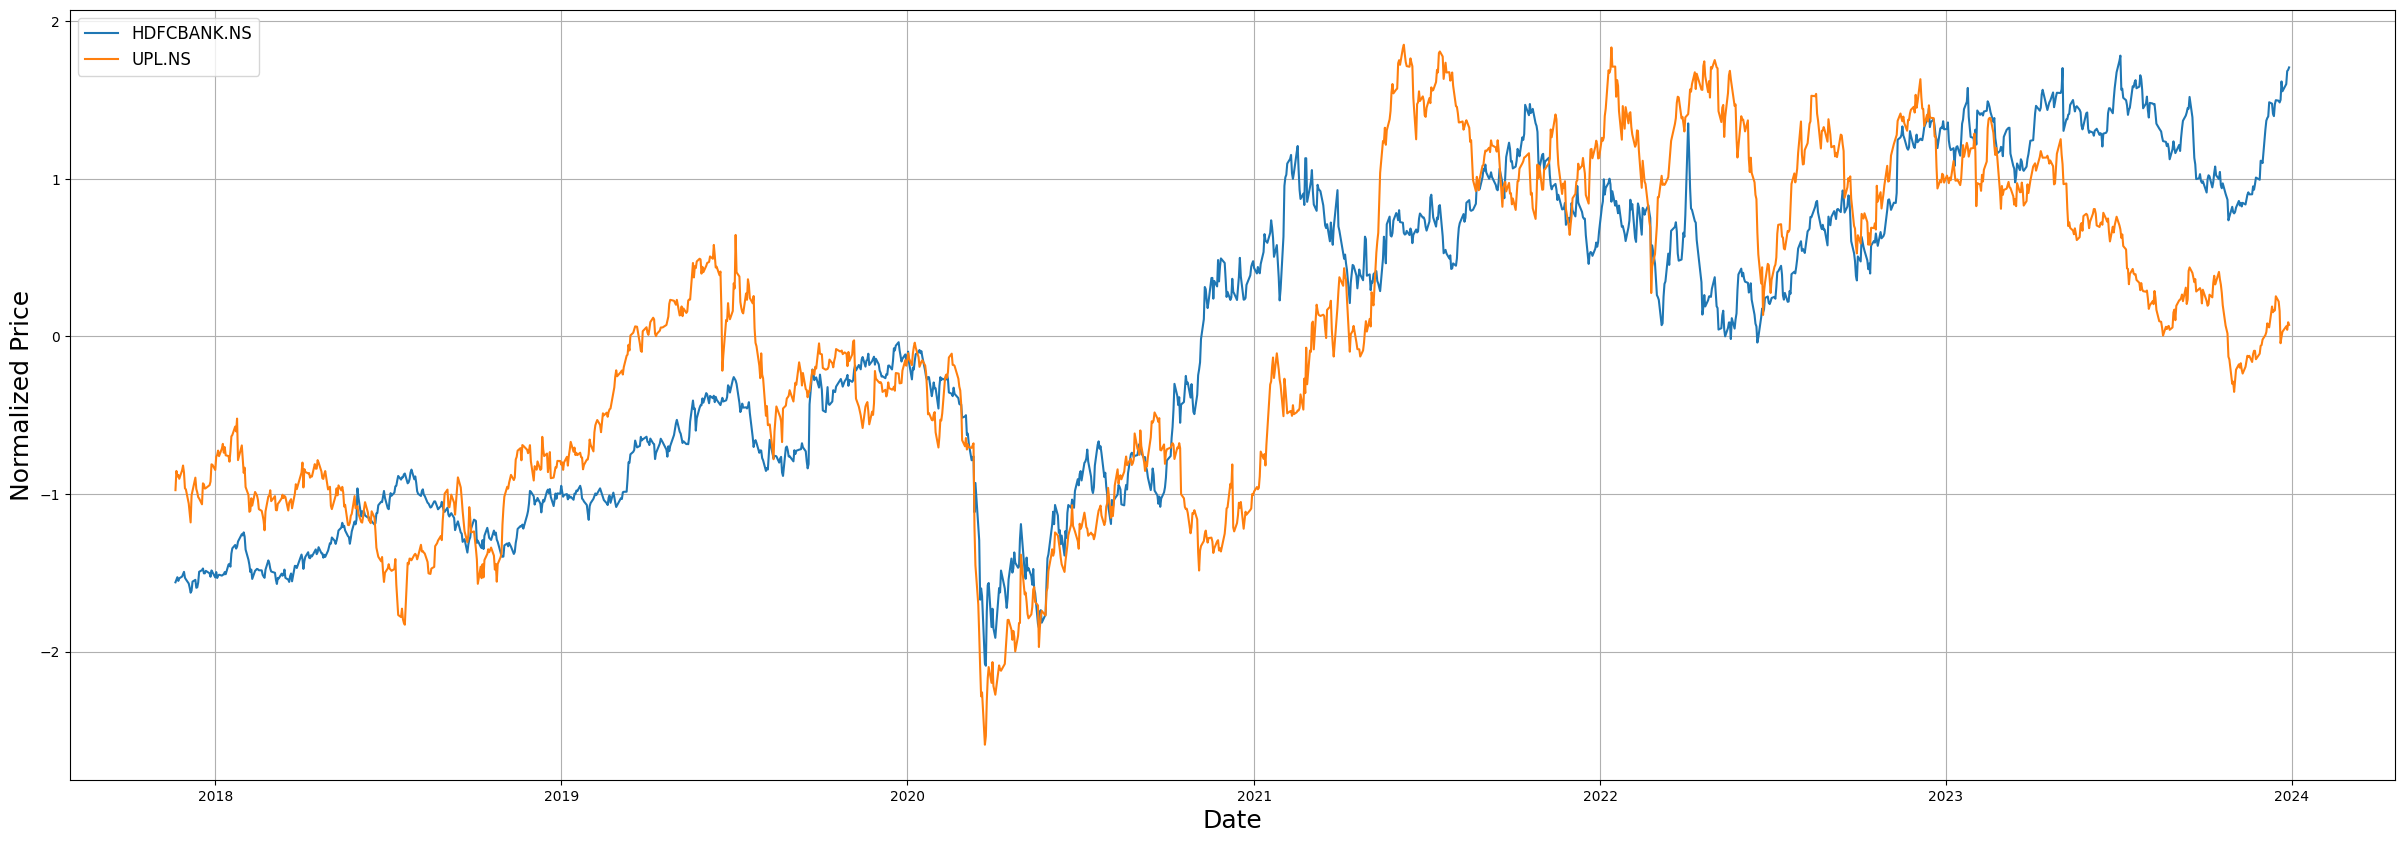

predicted_series_lstm_block1_w20.csv test_data1.csv 20


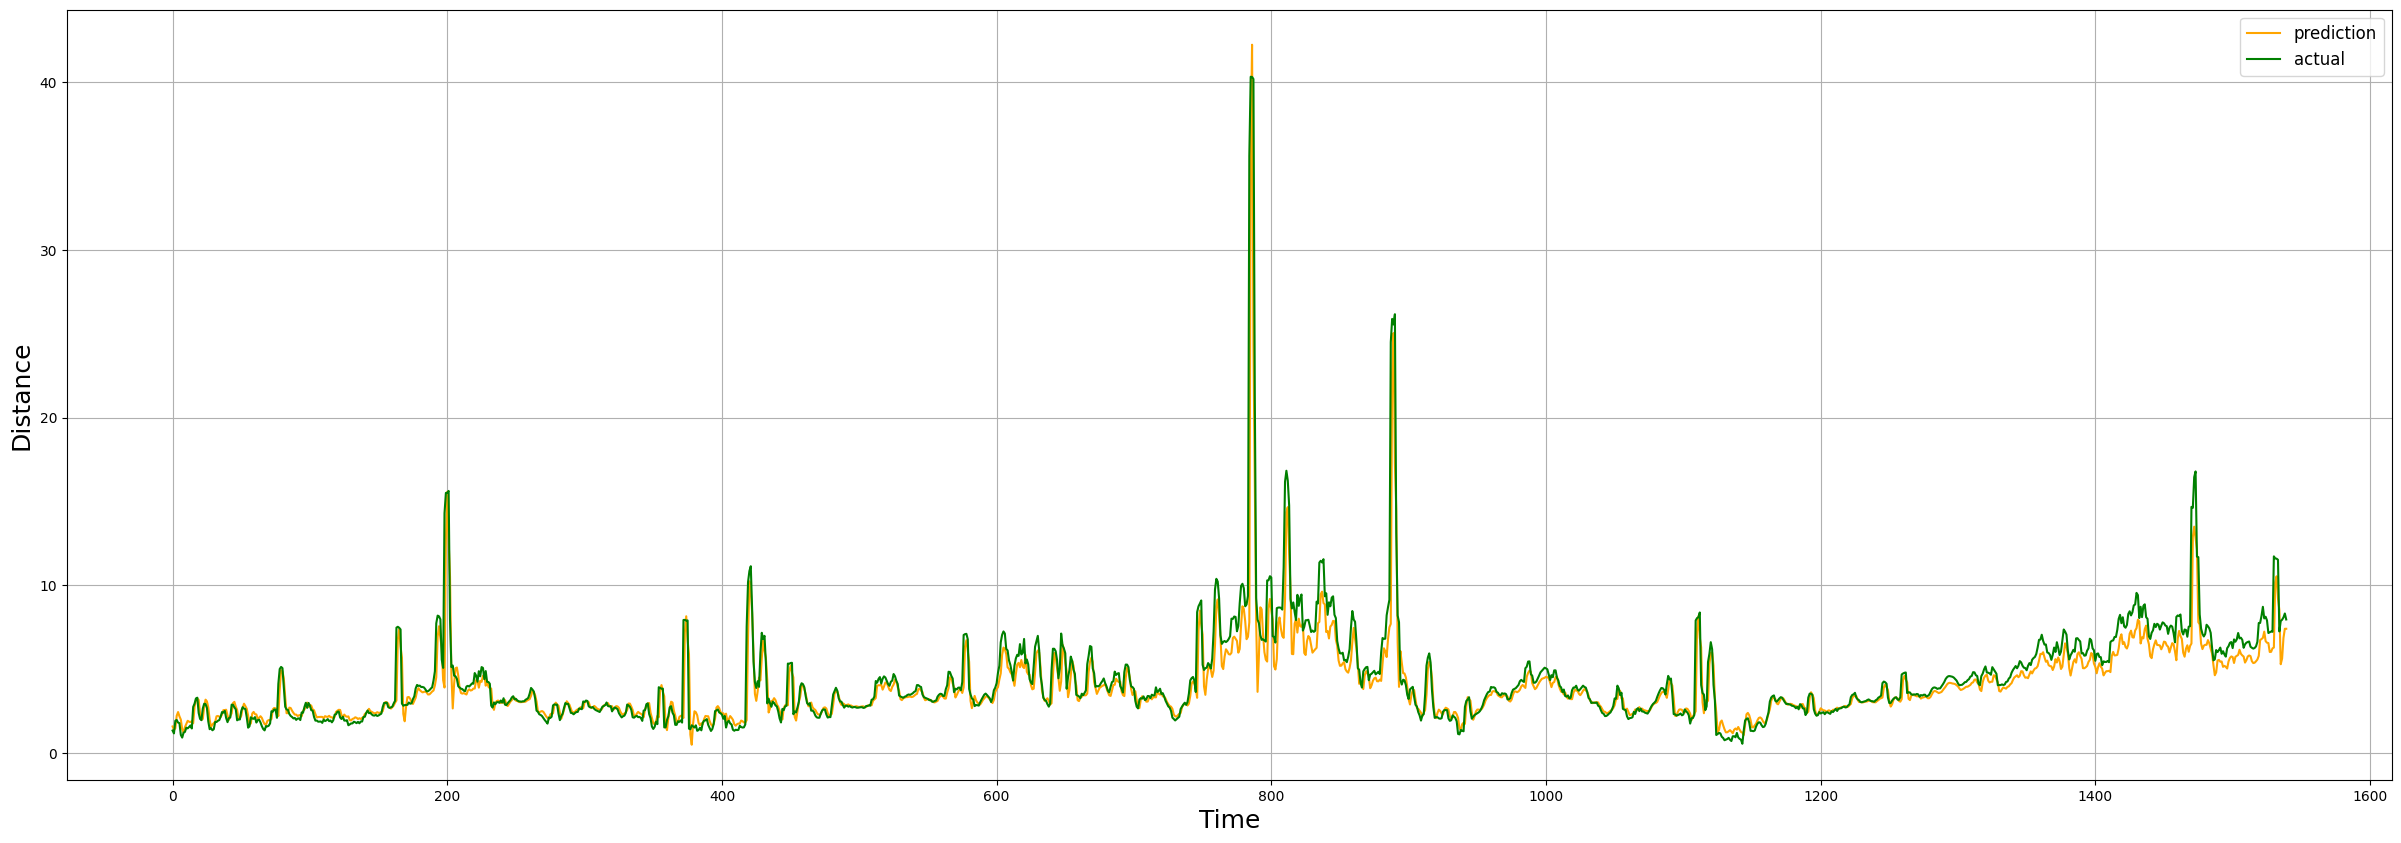

[*********************100%***********************]  1 of 1 completed

['HDFCBANK', 'UPL']



[*********************100%***********************]  1 of 1 completed


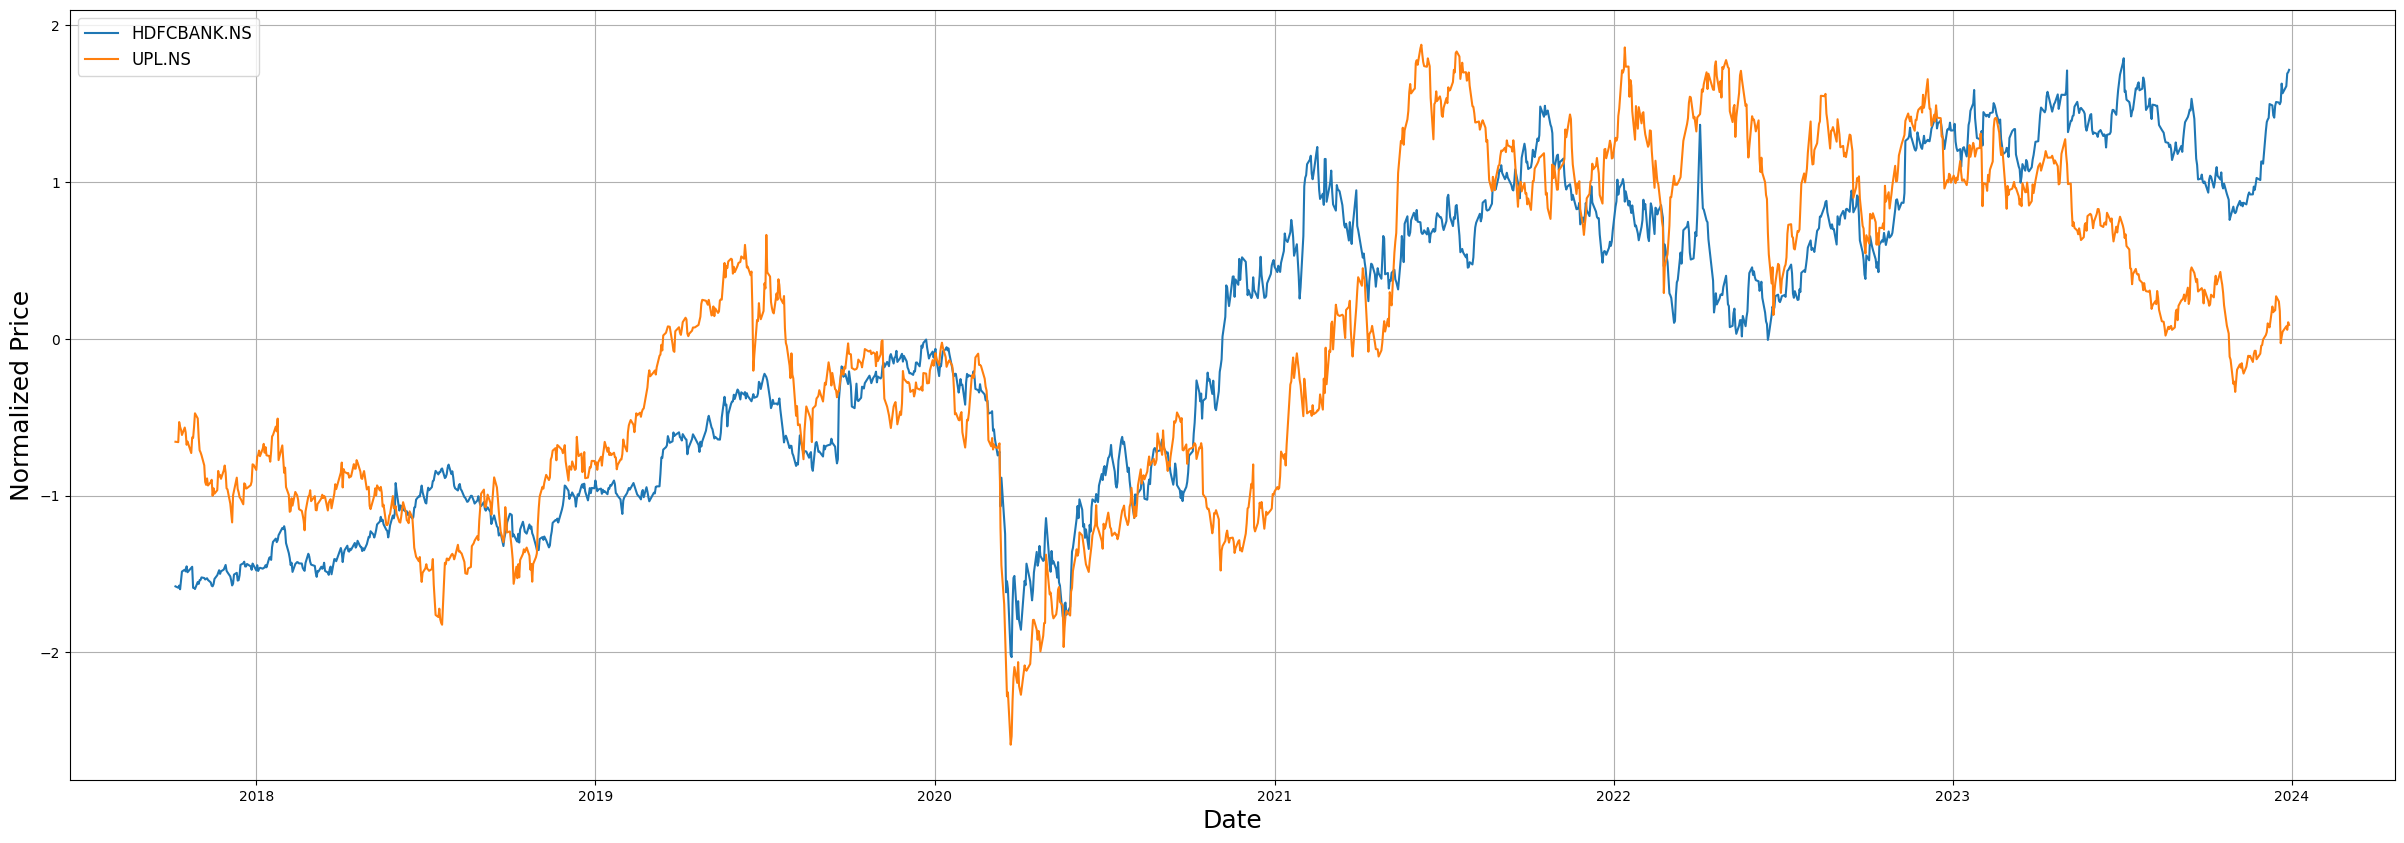

predicted_series_lstm_block10_w50.csv test_data2.csv 50


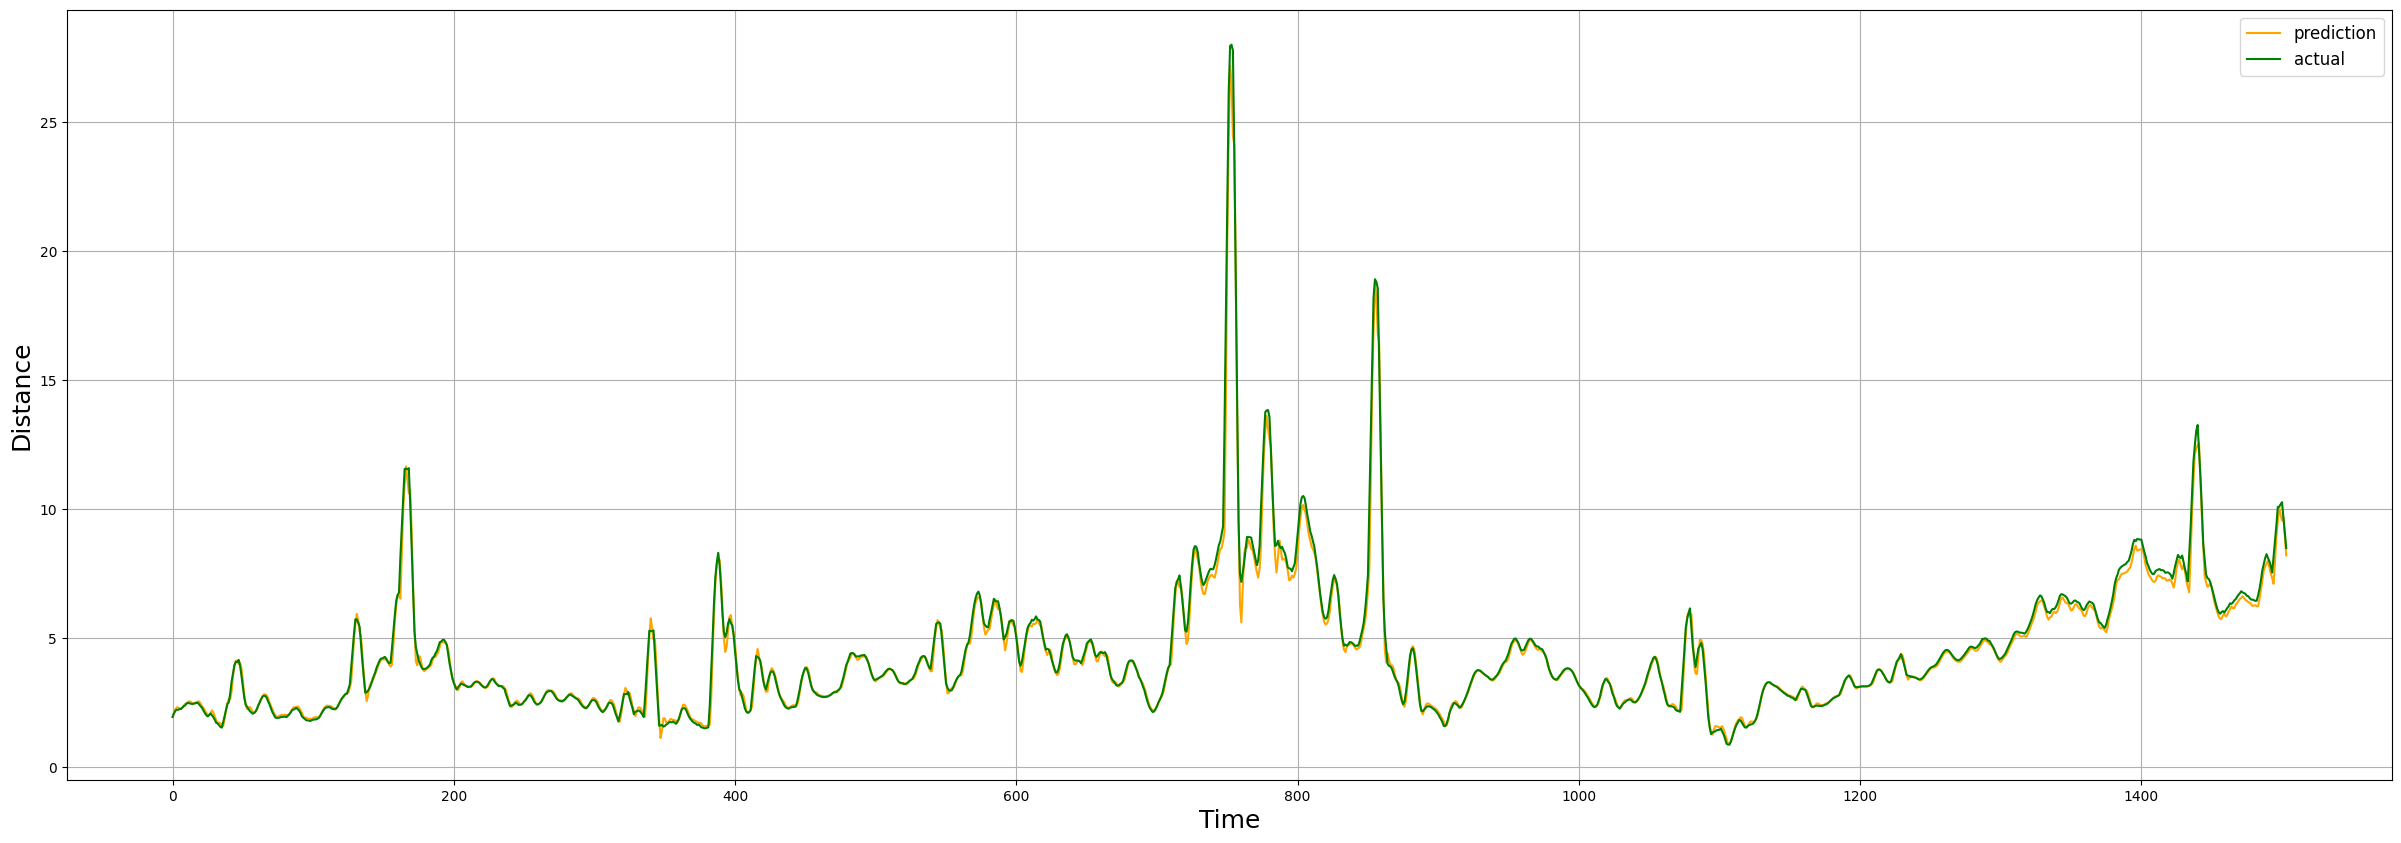

[*********************100%***********************]  1 of 1 completed

['HDFCBANK', 'UPL']



[*********************100%***********************]  1 of 1 completed


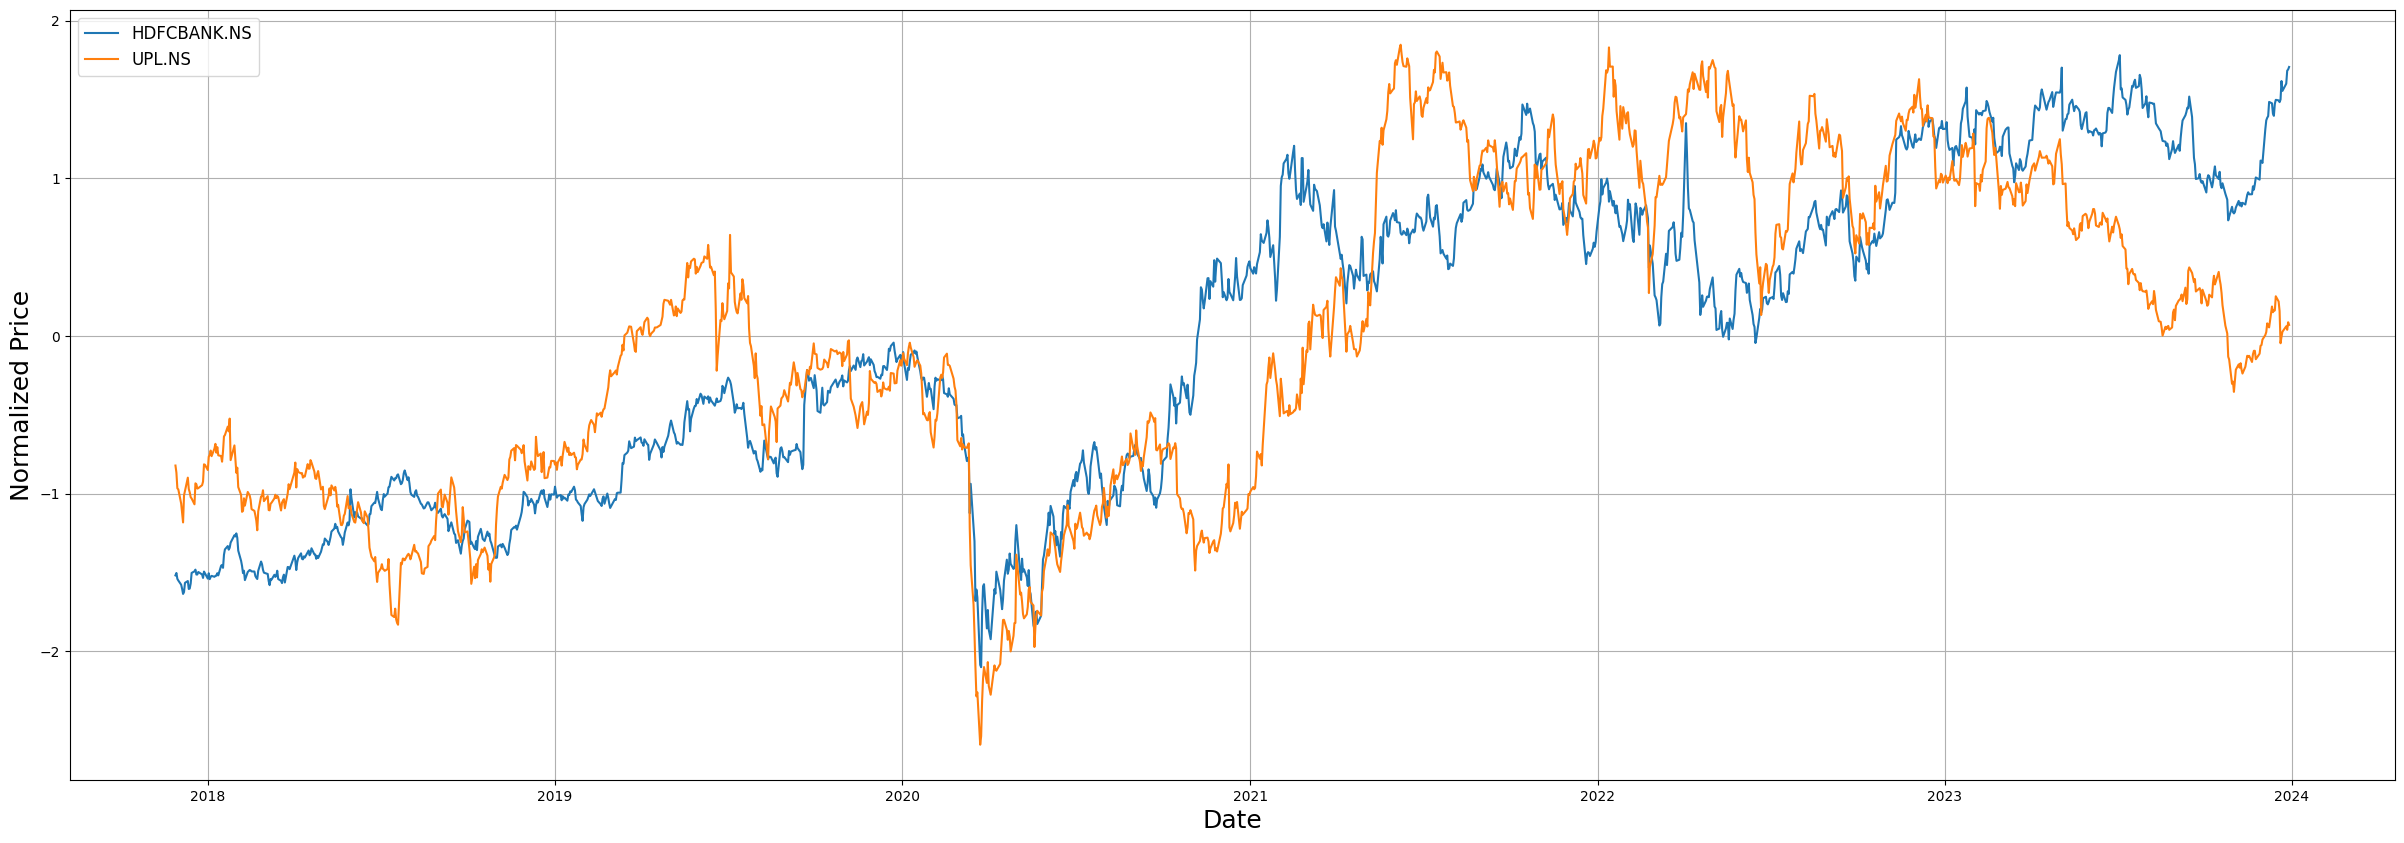

predicted_series_lstm_block10_w20.csv test_data2.csv 20


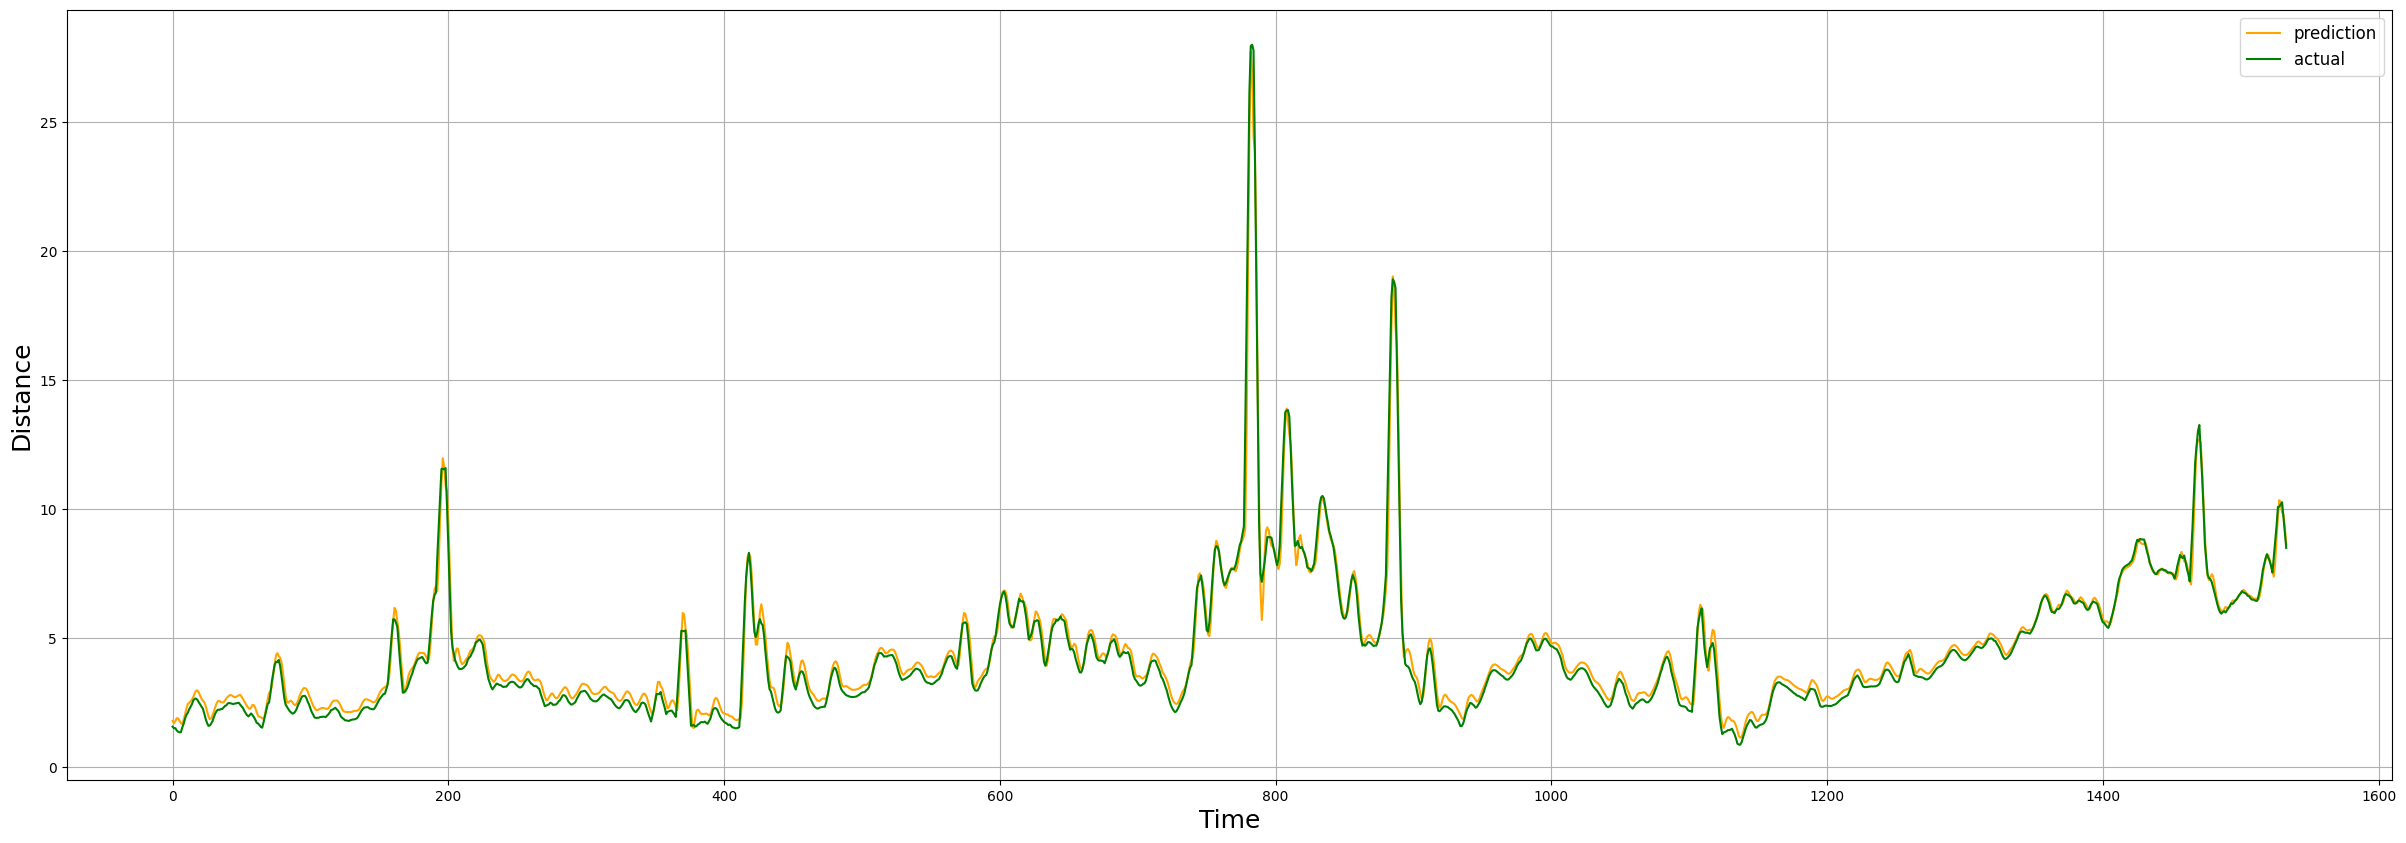

[*********************100%***********************]  1 of 1 completed

['HDFCBANK', 'UPL']



[*********************100%***********************]  1 of 1 completed


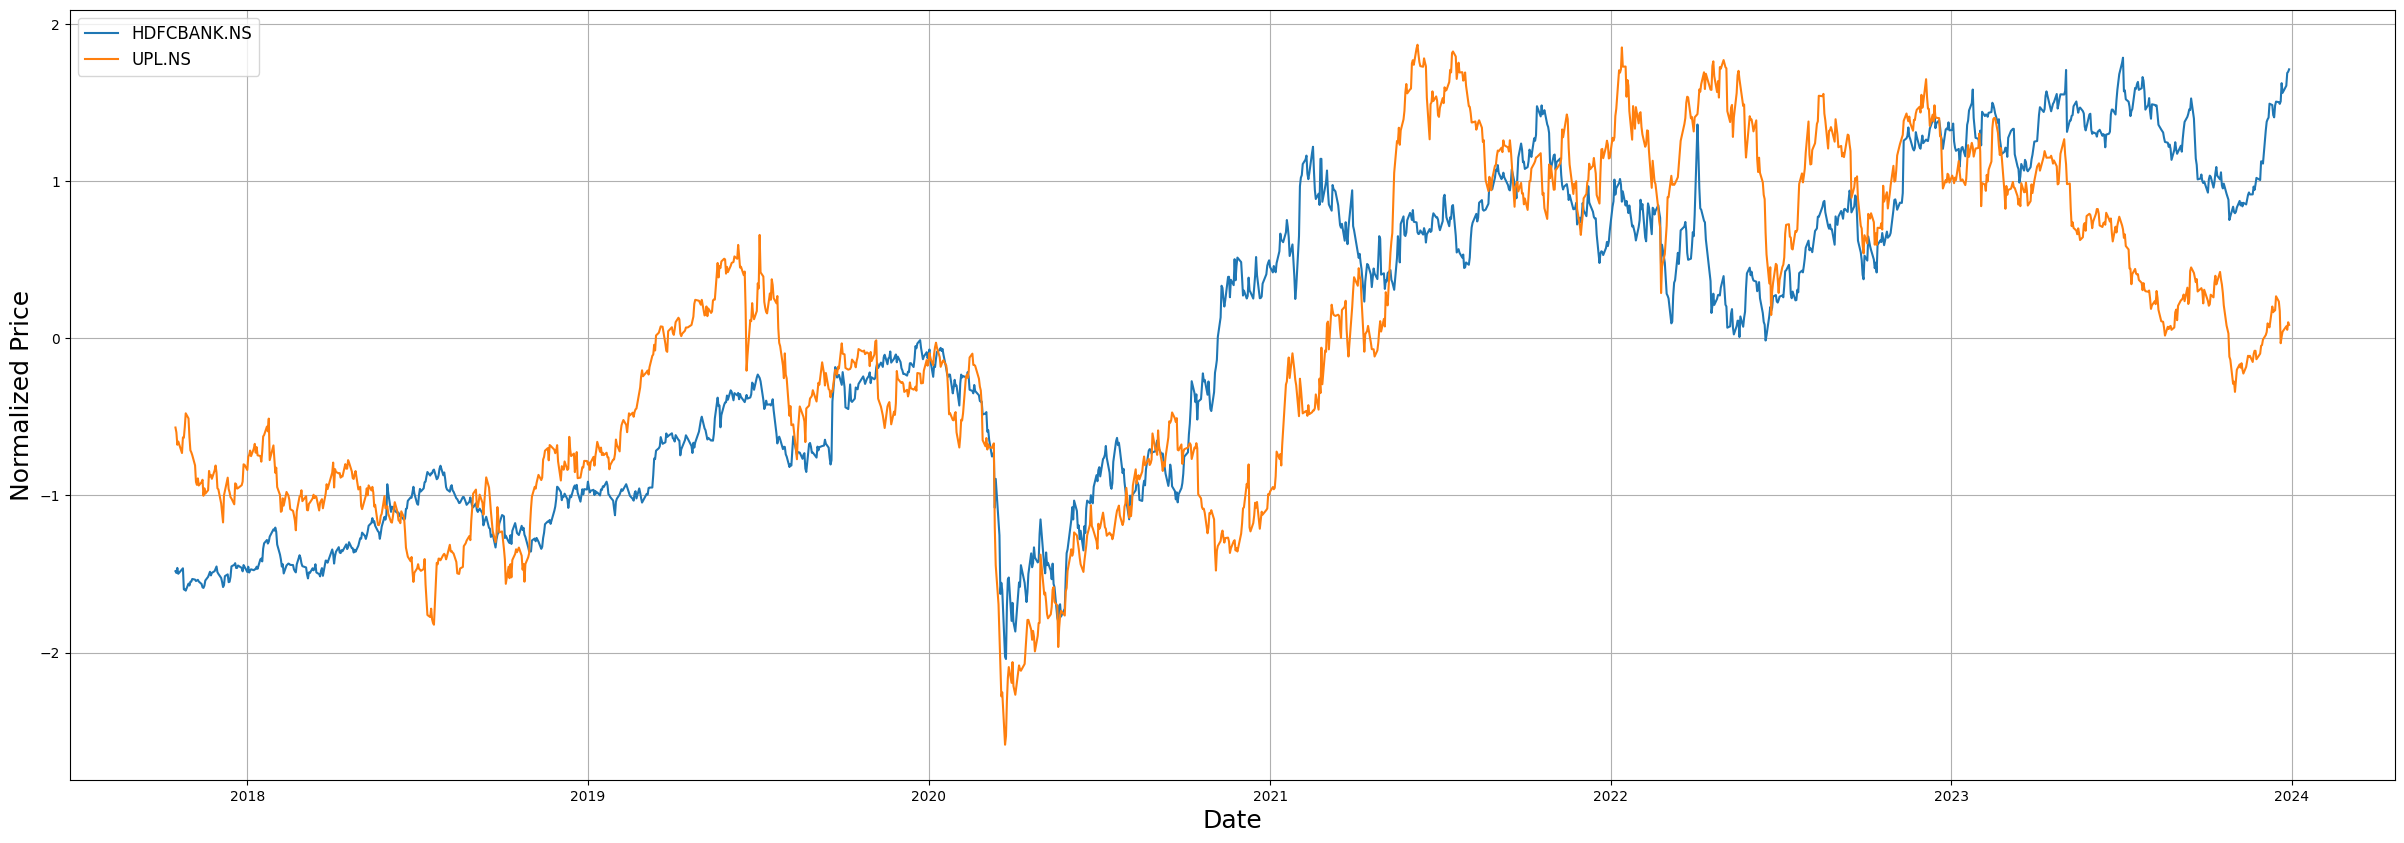

predicted_series_lstm_block20_w50.csv test_data3.csv 50


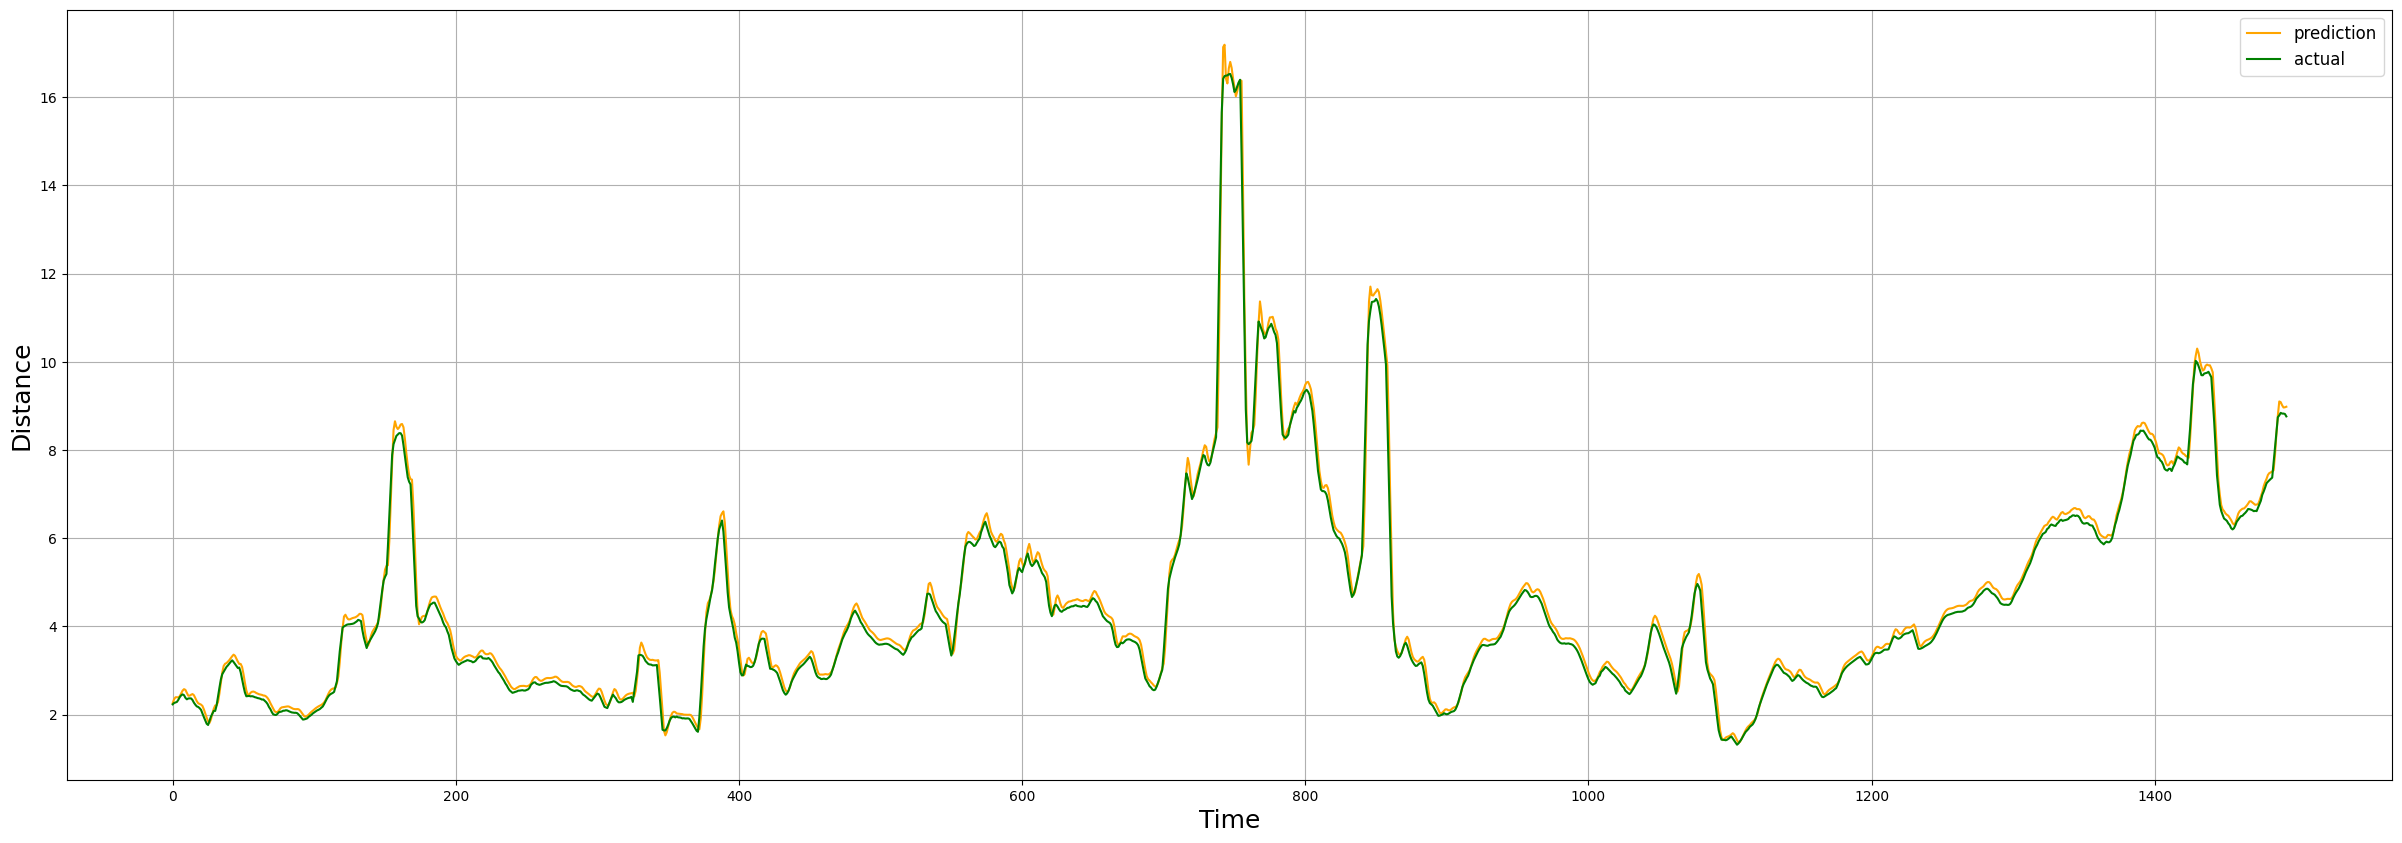

[*********************100%***********************]  1 of 1 completed

['HDFCBANK', 'UPL']



[*********************100%***********************]  1 of 1 completed


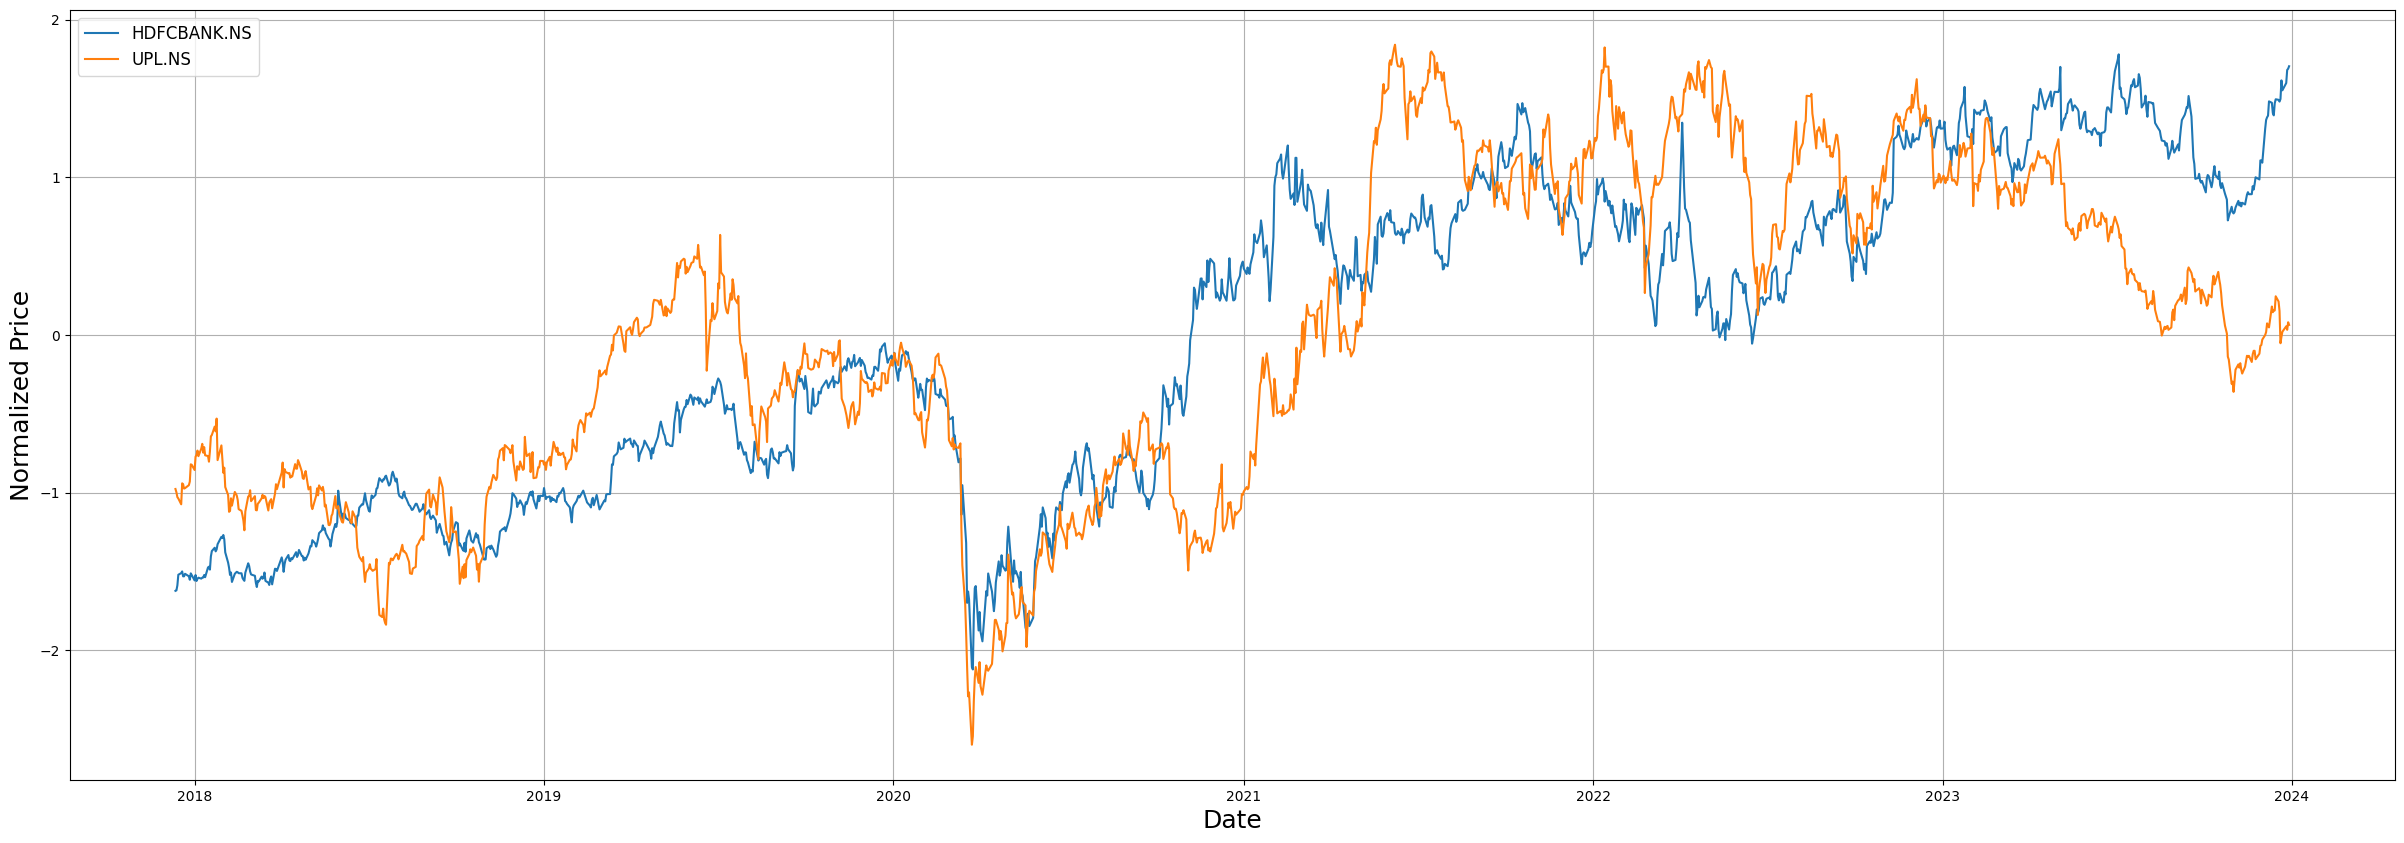

predicted_series_lstm_block20_w20.csv test_data3.csv 20


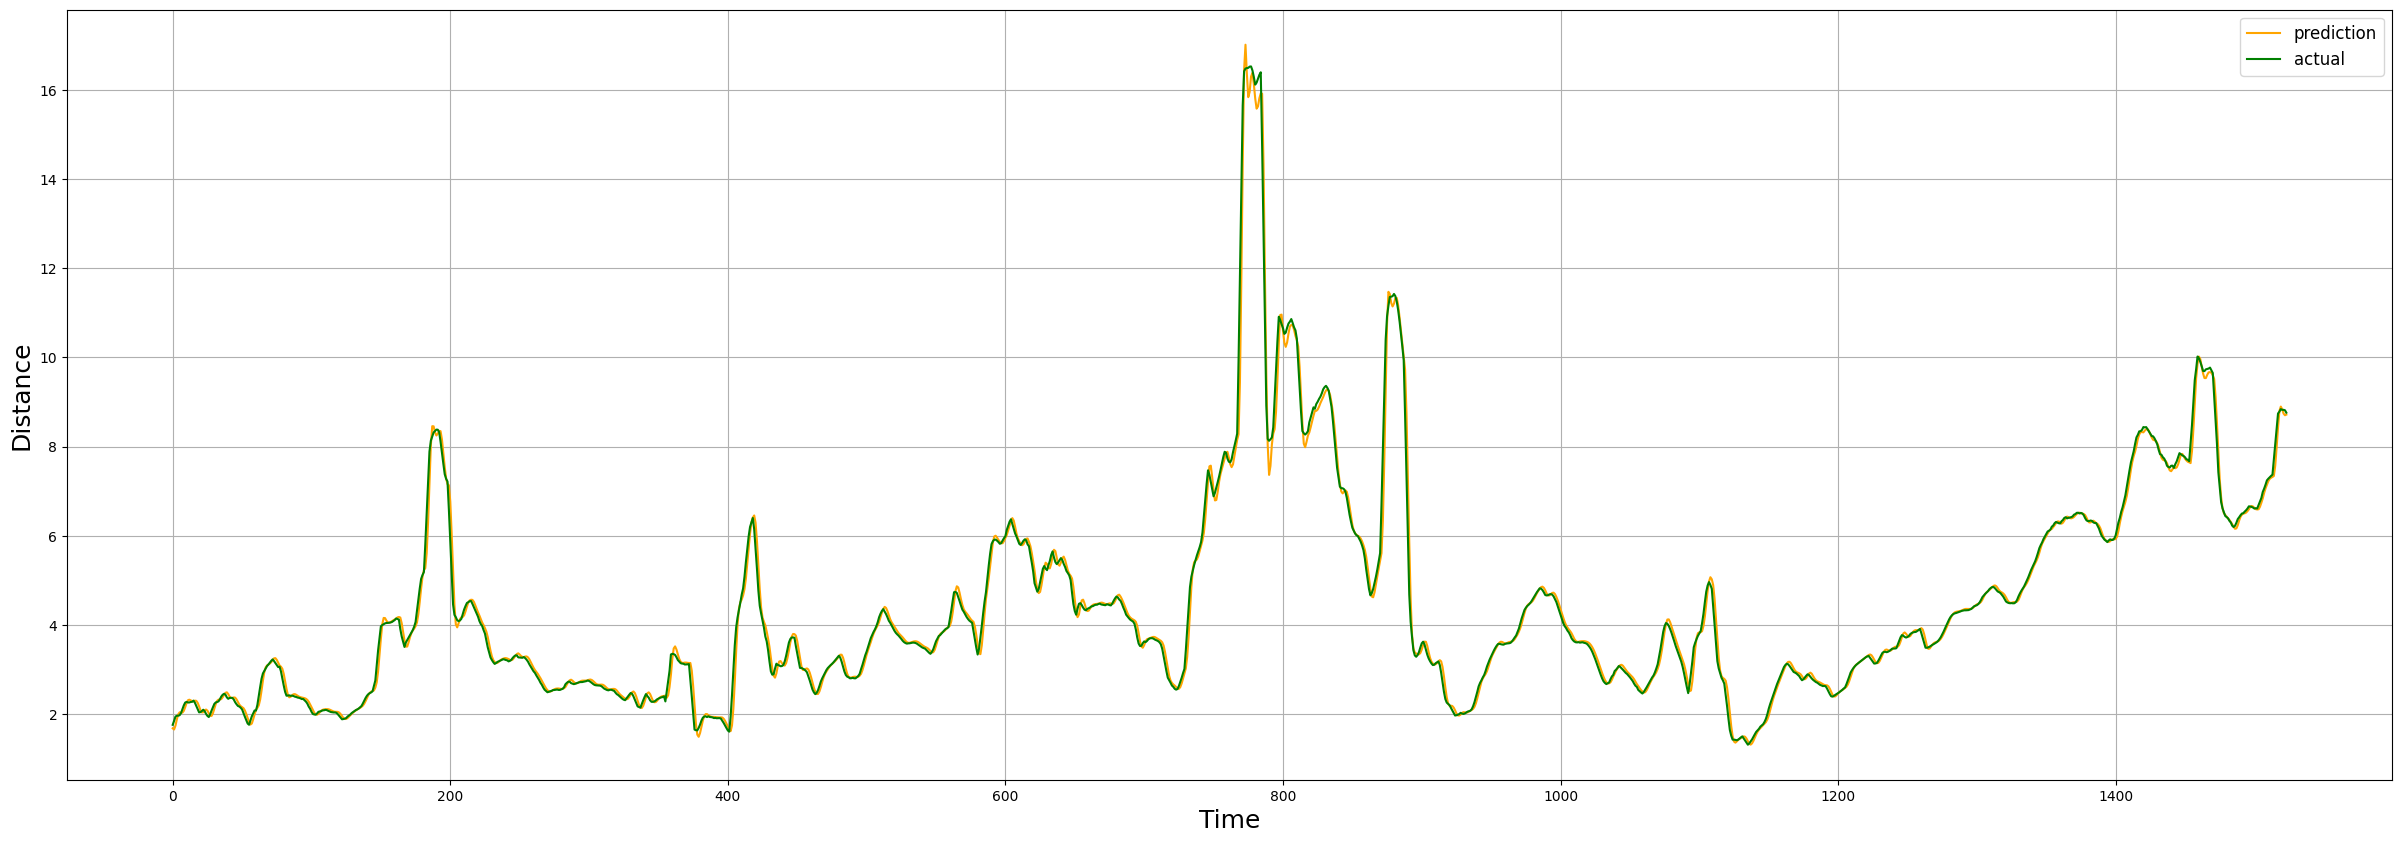

[*********************100%***********************]  1 of 1 completed

['HDFCBANK', 'UPL']



[*********************100%***********************]  1 of 1 completed


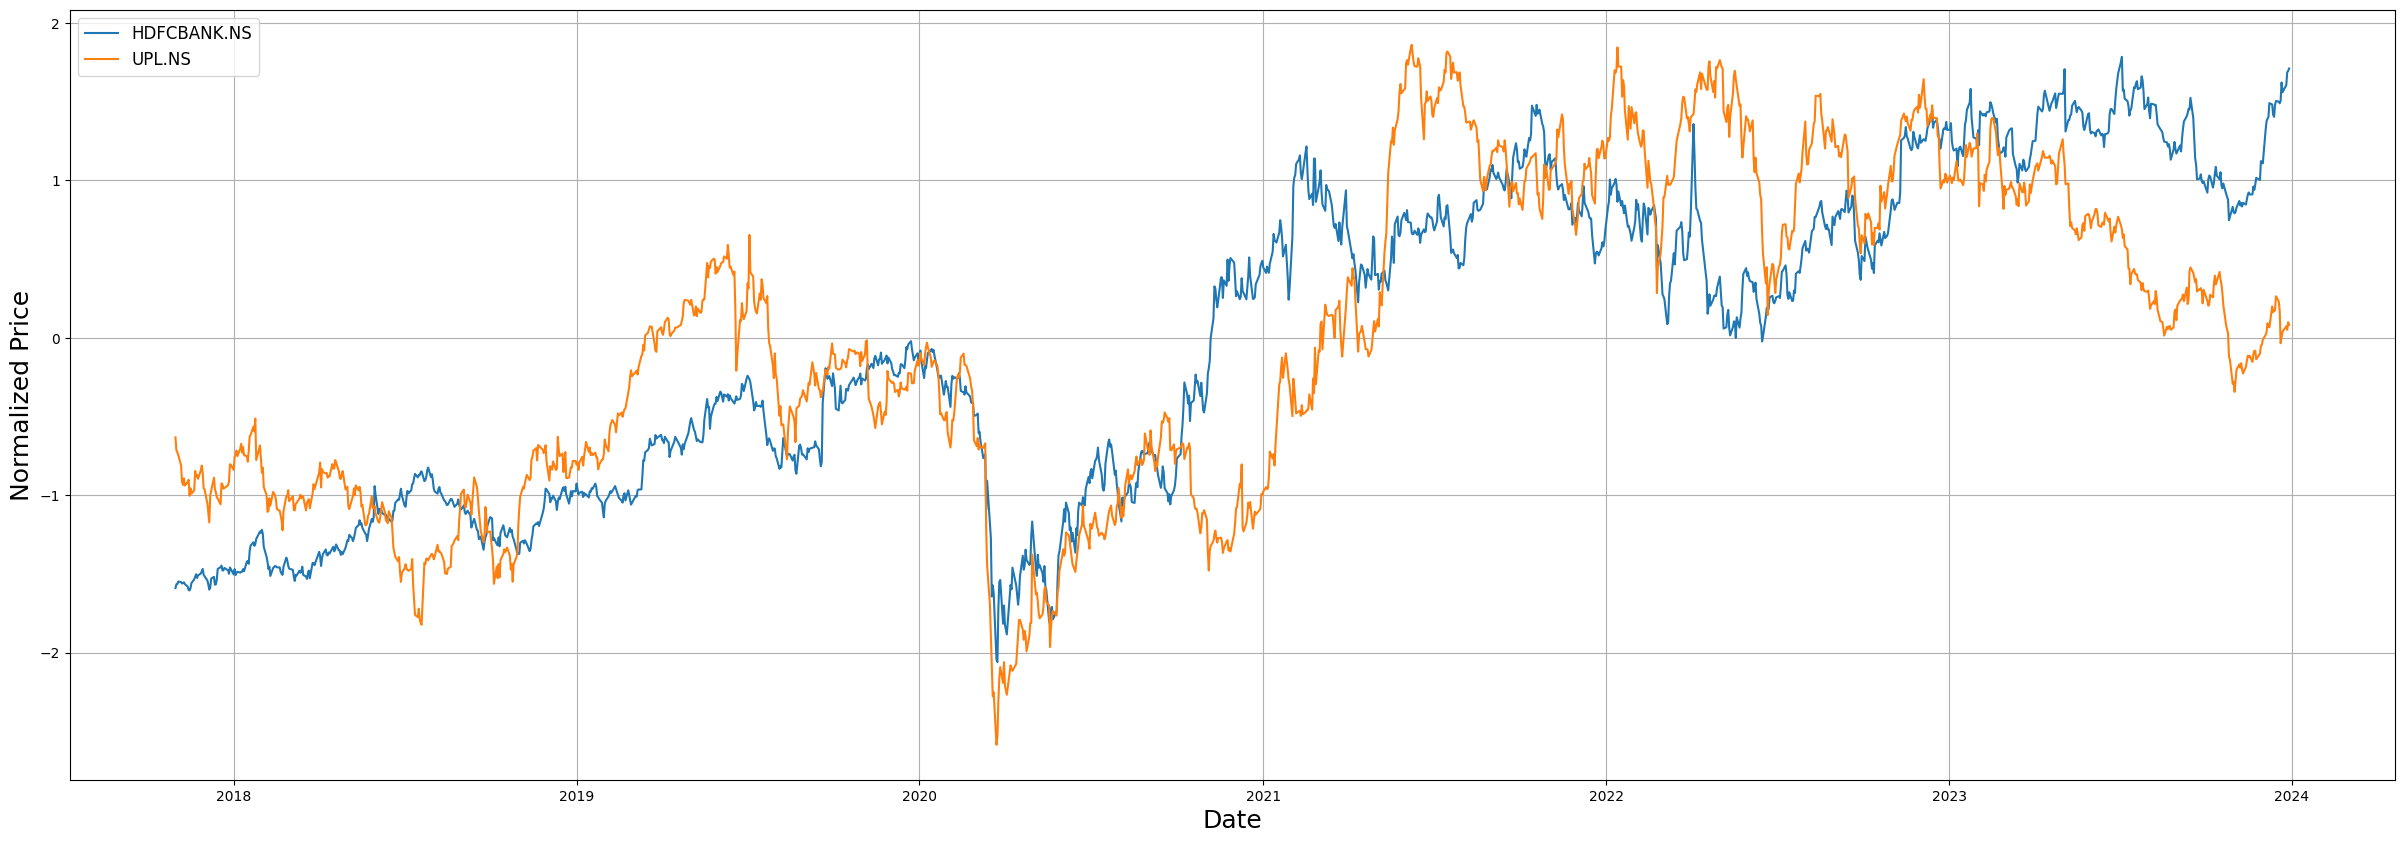

predicted_series_lstm_block30_w50.csv test_data4.csv 50


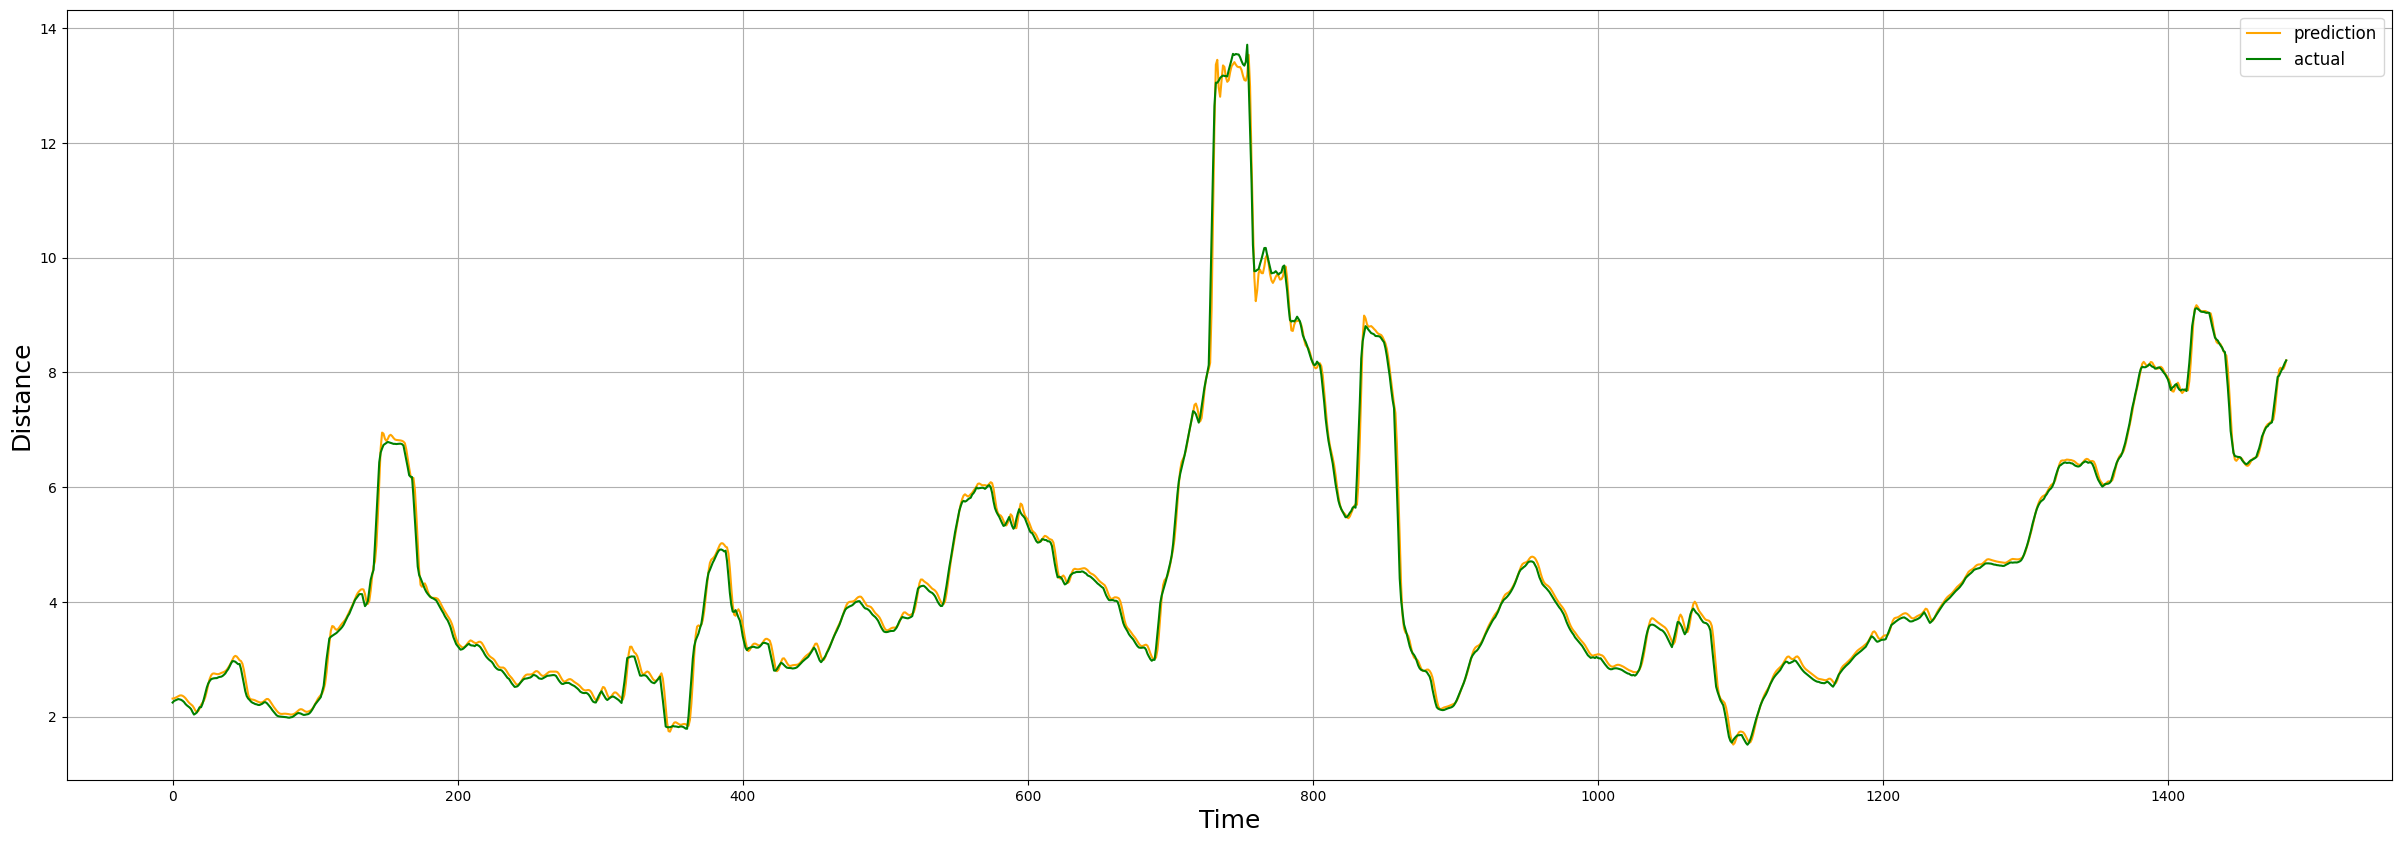

[*********************100%***********************]  1 of 1 completed

['HDFCBANK', 'UPL']



[*********************100%***********************]  1 of 1 completed


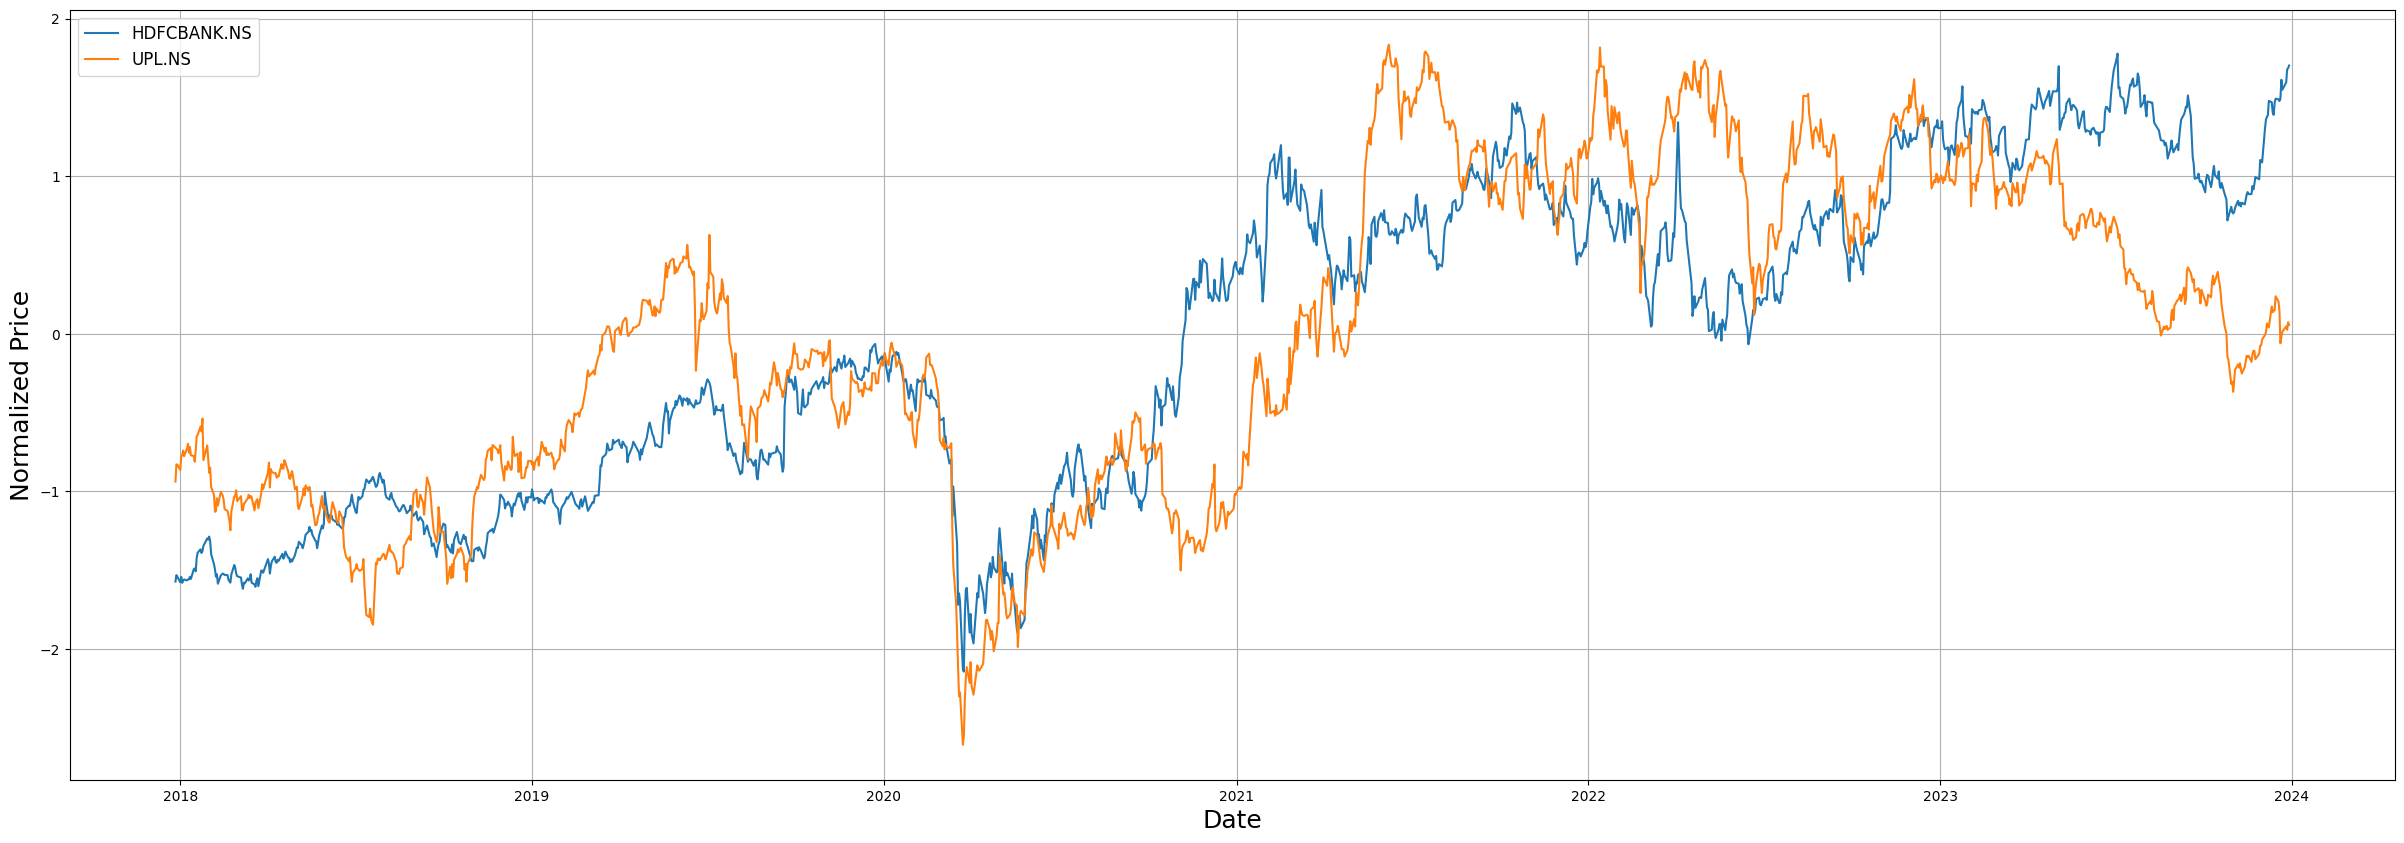

predicted_series_lstm_block30_w20.csv test_data4.csv 20


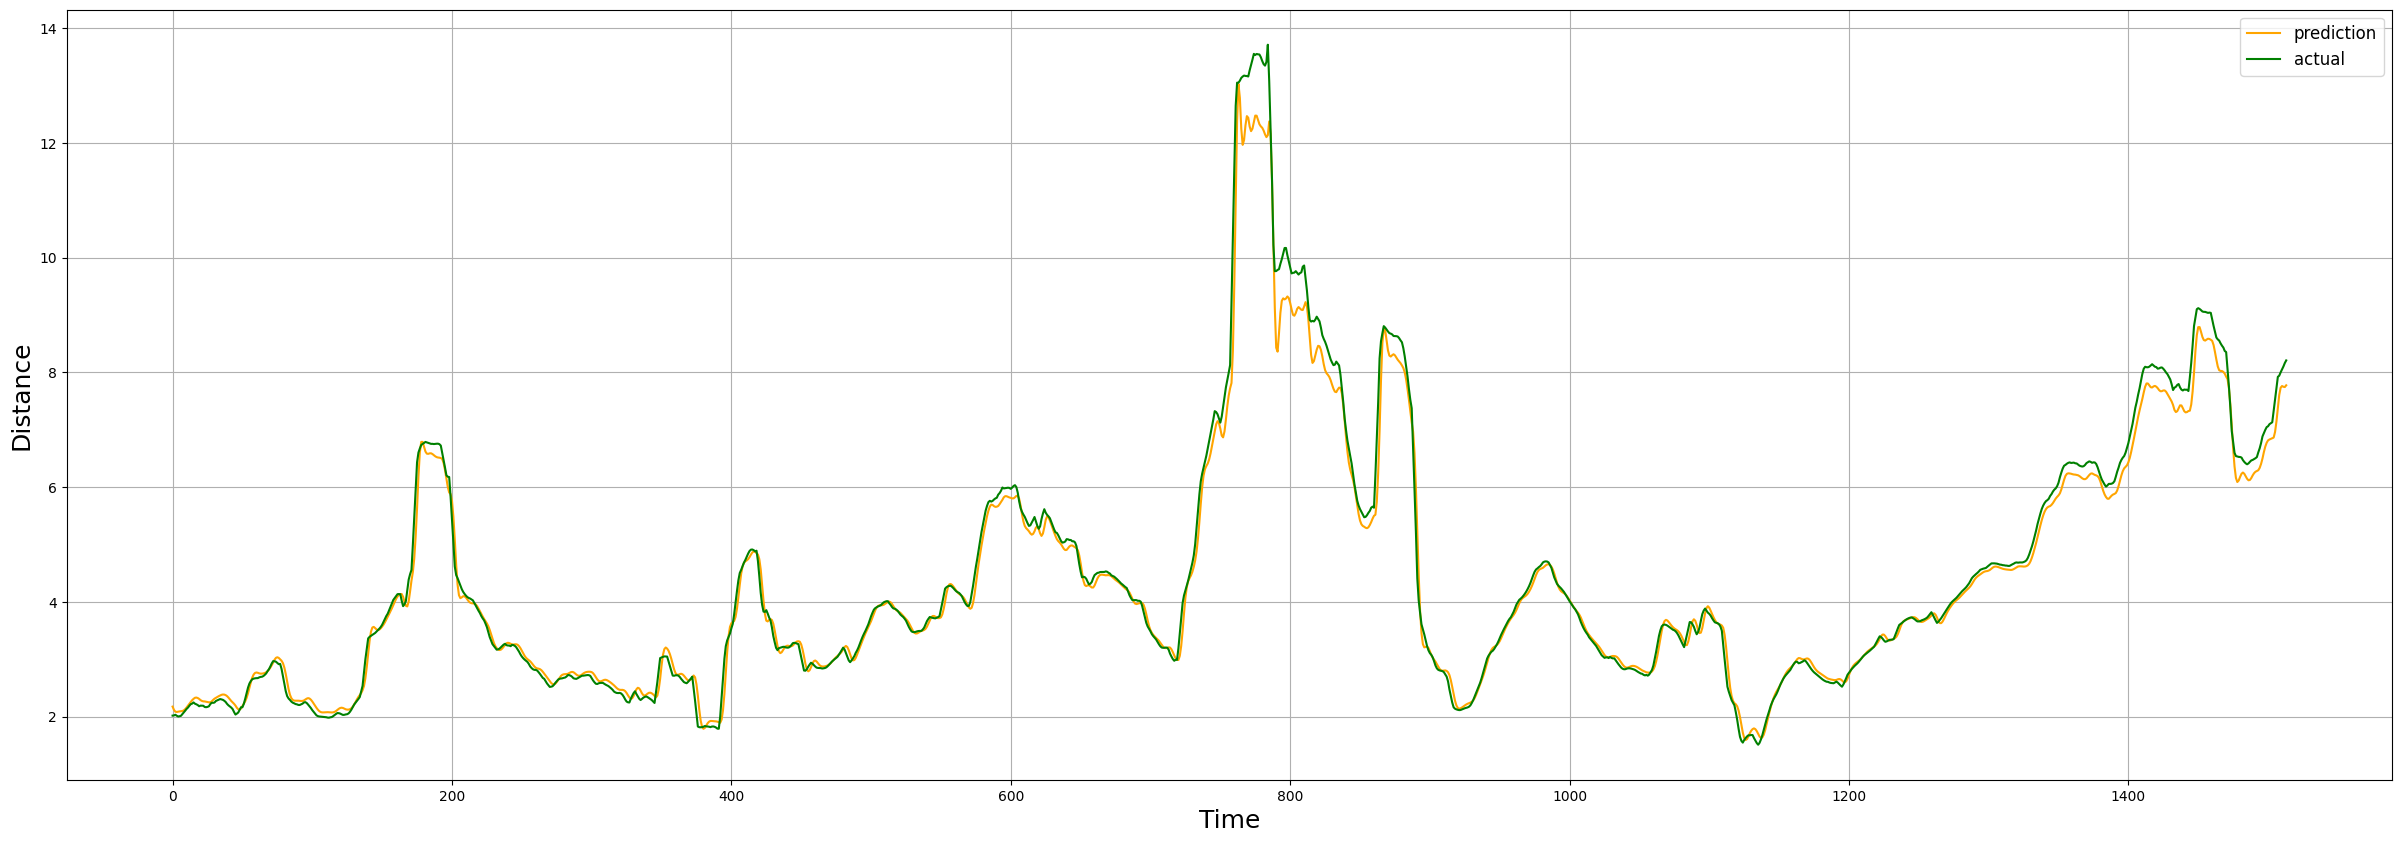

[*********************100%***********************]  1 of 1 completed

['HDFCBANK', 'UPL']



[*********************100%***********************]  1 of 1 completed


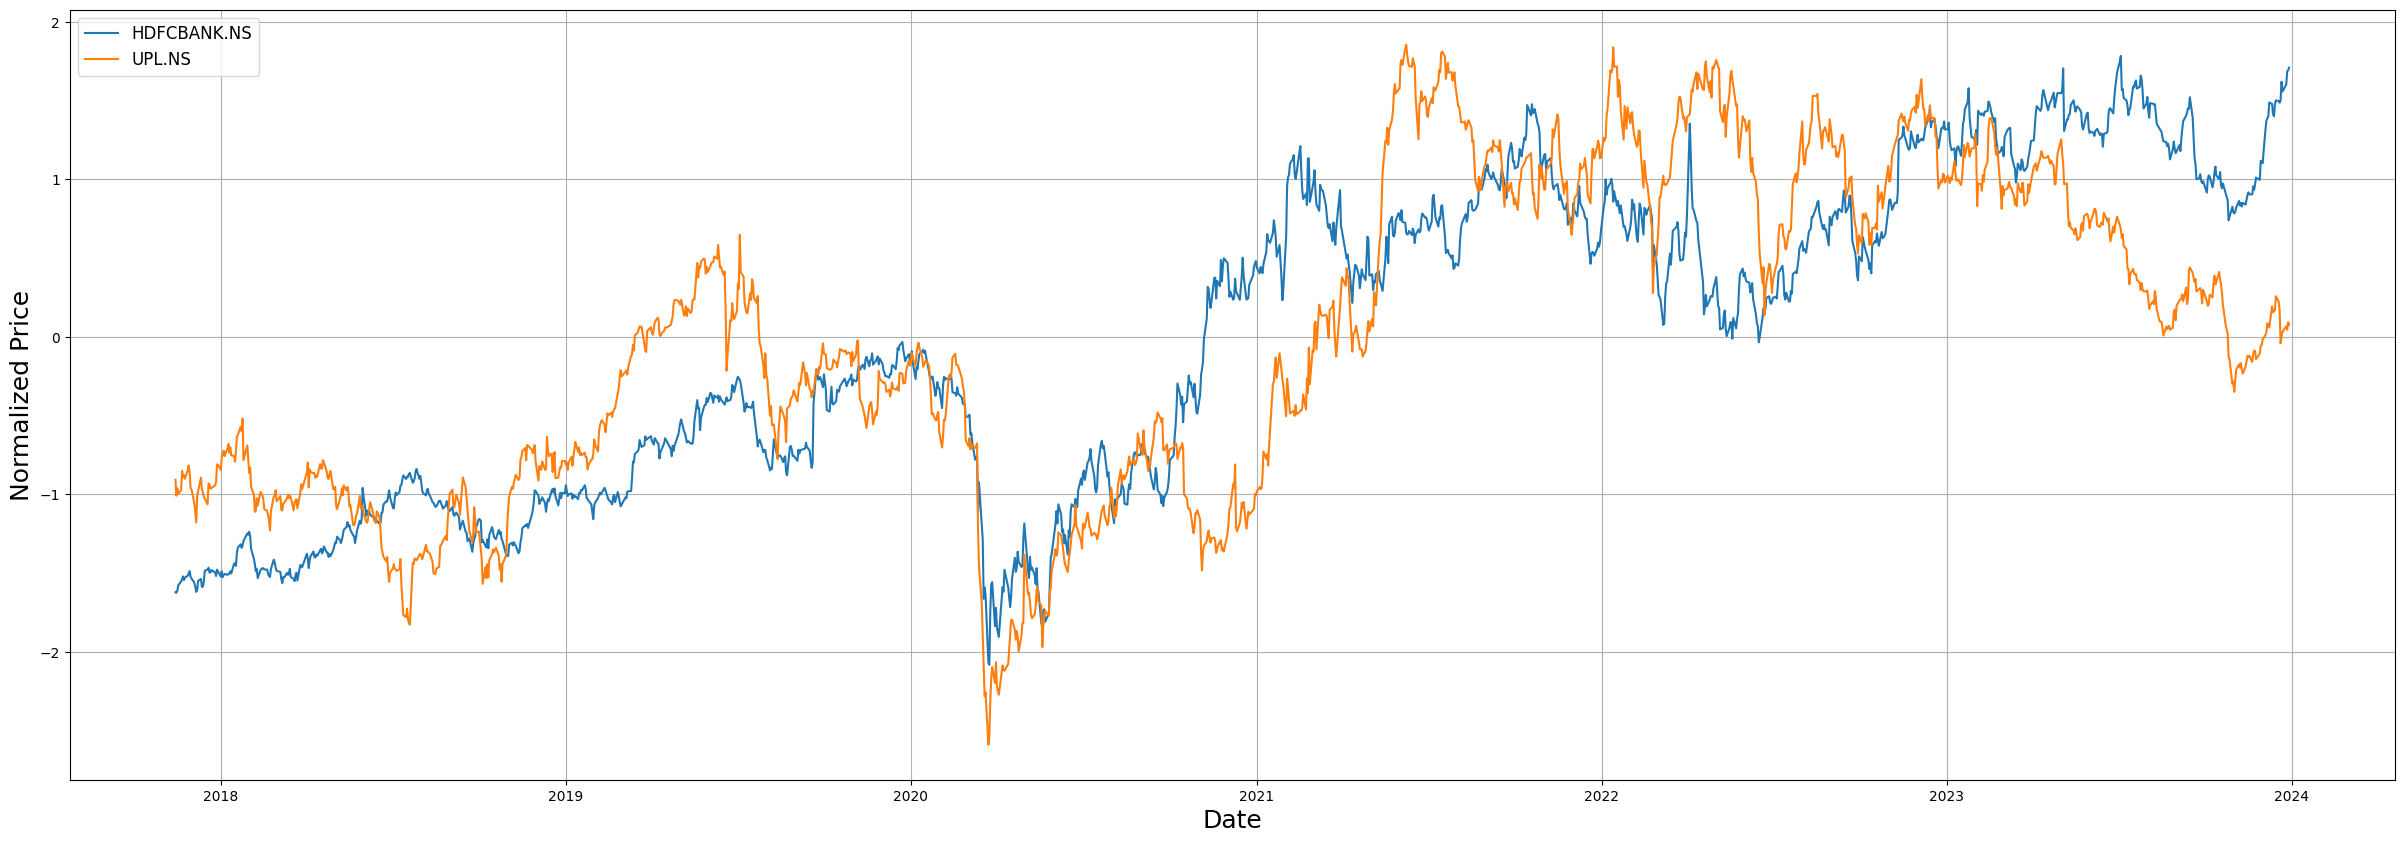

In [25]:
import os
# Create directory if it doesn't exist
if not os.path.exists("results_graphs"):
    os.makedirs("results_graphs")

stock = '"HDFCBANK_UPL"'
c = 0
for model in models:
    for block in blocks:
        for w in win:
            c+=1
            file = filename.format(model,block,w)
            testfile = "test_data{0}.csv".format(blocks.index(block)+1)
            predicted_series = pd.read_csv(file)
            test_data_file = pd.read_csv(testfile)
            print(file, testfile, w)
            test = test_data_file[stock][int(w):].tolist()
            pred = predicted_series[stock].tolist()
            plot(pred,test, stock, model, block, w)
            if c==1:
                plot_actual(stock, len(test),1)
            else:
                plot_actual(stock, len(test),0)


In [26]:
df = pd.DataFrame({
    'Files': files,
    'R2': R2_cv,
    'MAPE': MAPE_cv,
    'MAE': MAE_cv,
    'RMSE': RMSE_cv
})
df['R2_normalized'] = (df['R2'] - df['R2'].min()) / (df['R2'].max() - df['R2'].min())
df['MAPE_normalized'] = (df['MAPE'].max() - df['MAPE']) / (df['MAPE'].max() - df['MAPE'].min())
df['MAE_normalized'] = (df['MAE'].max() - df['MAE']) / (df['MAE'].max() - df['MAE'].min())
df['RMSE_normalized'] = (df['RMSE'].max() - df['RMSE']) / (df['RMSE'].max() - df['RMSE'].min())


In [27]:
#Classification

In [28]:
epsilons = pd.read_csv("epsilon_test1.csv")

In [29]:
test_data_file = pd.read_csv("test_data3.csv")
print(test_data_file.columns)

Index(['"HDFCBANK_M&M"', '"HDFCBANK_ULTRACEMCO"', '"HDFCBANK_GRASIM"',
       '"HDFCBANK_PIDILITIND"', '"HDFCBANK_LT"', '"HDFCBANK_HINDUNILVR"',
       '"HDFCBANK_ITC"', '"HDFCBANK_RELIANCE"', '"HDFCBANK_ONGC"',
       '"HDFCBANK_UPL"',
       ...
       '"INFY_TATASTEEL"', '"INFY_SUNPHARMA"', '"INFY_CONCOR"',
       '"INFY_BHARTIARTL"', '"TATASTEEL_SUNPHARMA"', '"TATASTEEL_CONCOR"',
       '"TATASTEEL_BHARTIARTL"', '"SUNPHARMA_CONCOR"',
       '"SUNPHARMA_BHARTIARTL"', '"CONCOR_BHARTIARTL"'],
      dtype='object', length=190)


In [30]:
names = test_data_file.columns.tolist()

In [31]:
filename = "predicted_series_lstm_block20_w20.csv"
predicted_series_lstm = pd.read_csv(filename)

In [41]:
for epsilon in epsilons:
    accuracies = []
    precisions_0 = []
    precisions_1 = []
    recalls_0 = []
    recalls_1 = []
    f1_scores_0 = []
    f1_scores_1 = []
    supports_0 = []
    supports_1 = []

    # Ensure epsilon_list matches the number of names
    epsilon_list = epsilons[epsilon].tolist()
    
    # Make sure epsilon_list only contains numeric values
    epsilon_list = [float(val) for val in epsilon_list if isinstance(val, (int, float))]

    if len(epsilon_list) != len(names):
        print(f"Warning: Epsilon list length ({len(epsilon_list)}) does not match names list length ({len(names)}) for epsilon {epsilon}.")
        continue  # Skip this iteration if the lengths don't match
    
    for name in names:
        try:
            # Ensure the threshold is a float and matches the stock pair
            index = names.index(name)
            if index >= len(epsilon_list):
                print(f"Skipping {name}: no corresponding threshold in epsilon list.")
                continue  # Skip if there's no corresponding threshold

            threshold = epsilon_list[index]  # Ensure the threshold is a float
            print(f"Using threshold: {threshold} for stock pair: {name}")

            # Compare predicted values to the threshold and create binary classes
            y_pred = (predicted_series_lstm[name] < threshold).astype(int)
            y_true = (test_data_file[name] < threshold).astype(int)
            y_true = y_true[20:]  # Adjusting data if necessary

            # Calculate metrics
            accuracy = accuracy_score(y_true, y_pred)
            precision = precision_score(y_true, y_pred, average=None, zero_division=1)
            recall = recall_score(y_true, y_pred, average=None, zero_division=1)
            f1 = f1_score(y_true, y_pred, average=None, zero_division=1)
            report = classification_report(y_true, y_pred, output_dict=True, zero_division=1)

            # Extracting support from classification report
            support_0 = report['0']['support']
            support_1 = report['1']['support'] if '1' in report else 0

            # Append results to lists
            accuracies.append(accuracy)
            precisions_0.append(precision[0])
            recalls_0.append(recall[0])
            f1_scores_0.append(f1[0])
            supports_0.append(support_0)
            if support_1 > 0:
                precisions_1.append(precision[1])
                recalls_1.append(recall[1])
                f1_scores_1.append(f1[1])
                supports_1.append(support_1)
            else:
                precisions_1.append(None)
                recalls_1.append(None)
                f1_scores_1.append(None)
                supports_1.append(0)

        except ValueError as e:
            print(f"Error processing {name}: {e}")
            continue  # Skip this iteration if there's an issue with the conversion

    per_class1 = []
    for i in range(len(supports_1)):
        per1 = (supports_1[i] / (supports_1[i] + supports_0[i]))
        per_class1.append(per1)

    df_results = pd.DataFrame({
        "stock_pair": names[:len(accuracies)],  # Ensure the length matches accuracies
        "accuracy": accuracies,
        "precision": precisions_1,
        "recall": recalls_1,
        "f1": f1_scores_1,
        "%class 1": per_class1
    })
    
    # Save dataframe to CSV
    df_results.to_csv(f'lstm_block20_w20_classification_results_{epsilon}.csv', index=False)


Using threshold: 0.4324727177577637 for stock pair: "HDFCBANK_M&M"
Using threshold: 0.5495760533816897 for stock pair: "HDFCBANK_ULTRACEMCO"
Using threshold: 0.6861922498651978 for stock pair: "HDFCBANK_GRASIM"
Using threshold: 1.2917286721890626 for stock pair: "HDFCBANK_PIDILITIND"
Using threshold: 0.4713422688110842 for stock pair: "HDFCBANK_LT"
Using threshold: 0.8857753631583251 for stock pair: "HDFCBANK_HINDUNILVR"
Using threshold: 0.5166429404308606 for stock pair: "HDFCBANK_ITC"
Using threshold: 0.5372623858503904 for stock pair: "HDFCBANK_RELIANCE"
Using threshold: 1.2198616860360356 for stock pair: "HDFCBANK_ONGC"
Using threshold: 0.7020874660320068 for stock pair: "HDFCBANK_UPL"
Using threshold: 0.4204781552506836 for stock pair: "HDFCBANK_ICICIBANK"
Using threshold: 0.7139842200447142 for stock pair: "HDFCBANK_SIEMENS"
Using threshold: 0.6111429998933103 for stock pair: "HDFCBANK_ABB"
Using threshold: 0.5016647581626223 for stock pair: "HDFCBANK_TCS"
Using threshold: 0.3638

Using threshold: 0.7348296654308712 for stock pair: "ITC_TCS"
Using threshold: 0.8642363485607426 for stock pair: "ITC_INFY"
Using threshold: 0.972281436979858 for stock pair: "ITC_TATASTEEL"
Using threshold: 0.7180616040214968 for stock pair: "ITC_SUNPHARMA"
Using threshold: 1.5815044329757326 for stock pair: "ITC_CONCOR"
Using threshold: 0.9697955212643804 for stock pair: "ITC_BHARTIARTL"
Using threshold: 0.9412517256151378 for stock pair: "RELIANCE_ONGC"
Using threshold: 0.6972247594303225 for stock pair: "RELIANCE_UPL"
Using threshold: 0.5259223433254884 for stock pair: "RELIANCE_ICICIBANK"
Using threshold: 0.4868294839820801 for stock pair: "RELIANCE_SIEMENS"
Using threshold: 0.632271421901416 for stock pair: "RELIANCE_ABB"
Using threshold: 0.5747994083994872 for stock pair: "RELIANCE_TCS"
Using threshold: 0.4845508376987061 for stock pair: "RELIANCE_INFY"
Using threshold: 0.6937587810205076 for stock pair: "RELIANCE_TATASTEEL"
Using threshold: 0.9267007490240234 for stock pair: "

Using threshold: 0.8335034288632204 for stock pair: "GRASIM_PIDILITIND"
Using threshold: 0.4854584440654905 for stock pair: "GRASIM_LT"
Using threshold: 0.9136607409064936 for stock pair: "GRASIM_HINDUNILVR"
Using threshold: 0.8892363800008543 for stock pair: "GRASIM_ITC"
Using threshold: 0.7789737636372673 for stock pair: "GRASIM_RELIANCE"
Using threshold: 0.8205375816110229 for stock pair: "GRASIM_ONGC"
Using threshold: 0.7949393833688964 for stock pair: "GRASIM_UPL"
Using threshold: 0.631175865946747 for stock pair: "GRASIM_ICICIBANK"
Using threshold: 0.5311287388631591 for stock pair: "GRASIM_SIEMENS"
Using threshold: 0.6524847696919556 for stock pair: "GRASIM_ABB"
Using threshold: 0.7028374578286438 for stock pair: "GRASIM_TCS"
Using threshold: 0.7827148834999693 for stock pair: "GRASIM_INFY"
Using threshold: 0.6252377969021301 for stock pair: "GRASIM_TATASTEEL"
Using threshold: 0.6580349458616637 for stock pair: "GRASIM_SUNPHARMA"
Using threshold: 1.4748845319541628 for stock pai

Using threshold: 1.6354252445814512 for stock pair: "INFY_CONCOR"
Using threshold: 1.2466233028708484 for stock pair: "INFY_BHARTIARTL"
Using threshold: 0.8094076108847963 for stock pair: "TATASTEEL_SUNPHARMA"
Using threshold: 1.6215024870959167 for stock pair: "TATASTEEL_CONCOR"
Using threshold: 0.957677467910492 for stock pair: "TATASTEEL_BHARTIARTL"
Using threshold: 0.9729045466154176 for stock pair: "SUNPHARMA_CONCOR"
Using threshold: 1.5954527305336912 for stock pair: "SUNPHARMA_BHARTIARTL"
Using threshold: 1.4836020938710934 for stock pair: "CONCOR_BHARTIARTL"
Using threshold: 0.6511968467645994 for stock pair: "HDFCBANK_M&M"
Using threshold: 0.8194338925220459 for stock pair: "HDFCBANK_ULTRACEMCO"
Using threshold: 1.122210086087256 for stock pair: "HDFCBANK_GRASIM"
Using threshold: 1.8792944640425653 for stock pair: "HDFCBANK_PIDILITIND"
Using threshold: 0.6990502819829709 for stock pair: "HDFCBANK_LT"
Using threshold: 1.2863618464294495 for stock pair: "HDFCBANK_HINDUNILVR"
Usi

Using threshold: 0.9161187808531432 for stock pair: "ITC_UPL"
Using threshold: 1.0810798469216063 for stock pair: "ITC_ICICIBANK"
Using threshold: 0.801119654717633 for stock pair: "ITC_SIEMENS"
Using threshold: 0.9911728018676392 for stock pair: "ITC_ABB"
Using threshold: 0.9322398798253176 for stock pair: "ITC_TCS"
Using threshold: 1.0983766366373289 for stock pair: "ITC_INFY"
Using threshold: 1.2499614440003597 for stock pair: "ITC_TATASTEEL"
Using threshold: 1.1493674391962398 for stock pair: "ITC_SUNPHARMA"
Using threshold: 1.9314473583780152 for stock pair: "ITC_CONCOR"
Using threshold: 1.3143675635087282 for stock pair: "ITC_BHARTIARTL"
Using threshold: 1.3204381666783689 for stock pair: "RELIANCE_ONGC"
Using threshold: 1.0756111014006344 for stock pair: "RELIANCE_UPL"
Using threshold: 0.8142585536369015 for stock pair: "RELIANCE_ICICIBANK"
Using threshold: 0.7975360468682374 for stock pair: "RELIANCE_SIEMENS"
Using threshold: 1.0289753286508794 for stock pair: "RELIANCE_ABB"
Us

Using threshold: 0.9822757439917116 for stock pair: "ULTRACEMCO_ABB"
Using threshold: 0.7691920408951965 for stock pair: "ULTRACEMCO_TCS"
Using threshold: 1.3154921238614992 for stock pair: "ULTRACEMCO_INFY"
Using threshold: 1.1188174979818604 for stock pair: "ULTRACEMCO_TATASTEEL"
Using threshold: 1.1811598684144256 for stock pair: "ULTRACEMCO_SUNPHARMA"
Using threshold: 1.579839879723084 for stock pair: "ULTRACEMCO_CONCOR"
Using threshold: 1.1479894337270449 for stock pair: "ULTRACEMCO_BHARTIARTL"
Using threshold: 1.2124306766012207 for stock pair: "GRASIM_PIDILITIND"
Using threshold: 0.7131136090433994 for stock pair: "GRASIM_LT"
Using threshold: 1.3371642877938843 for stock pair: "GRASIM_HINDUNILVR"
Using threshold: 1.309661930634204 for stock pair: "GRASIM_ITC"
Using threshold: 1.157030067149927 for stock pair: "GRASIM_RELIANCE"
Using threshold: 1.1642004669274906 for stock pair: "GRASIM_ONGC"
Using threshold: 1.189939593761572 for stock pair: "GRASIM_UPL"
Using threshold: 0.86375

Using threshold: 1.5592213765255127 for stock pair: "SIEMENS_BHARTIARTL"
Using threshold: 0.8542265343692019 for stock pair: "ABB_TCS"
Using threshold: 0.9859399636808588 for stock pair: "ABB_INFY"
Using threshold: 1.6271113497352414 for stock pair: "ABB_TATASTEEL"
Using threshold: 1.7119134615537472 for stock pair: "ABB_SUNPHARMA"
Using threshold: 2.7106704159107786 for stock pair: "ABB_CONCOR"
Using threshold: 1.5785047969910038 for stock pair: "ABB_BHARTIARTL"
Using threshold: 0.5738294367613558 for stock pair: "TCS_INFY"
Using threshold: 1.017354852285324 for stock pair: "TCS_TATASTEEL"
Using threshold: 0.6151440978973879 for stock pair: "TCS_SUNPHARMA"
Using threshold: 1.9742006608601077 for stock pair: "TCS_CONCOR"
Using threshold: 1.0865228602676875 for stock pair: "TCS_BHARTIARTL"
Using threshold: 1.0684831419093812 for stock pair: "INFY_TATASTEEL"
Using threshold: 1.711896116040344 for stock pair: "INFY_SUNPHARMA"
Using threshold: 2.0700240154074523 for stock pair: "INFY_CONCO

Using threshold: 1.0182175847546389 for stock pair: "HINDUNILVR_SIEMENS"
Using threshold: 1.4554918530462897 for stock pair: "HINDUNILVR_ABB"
Using threshold: 0.8406444727675293 for stock pair: "HINDUNILVR_TCS"
Using threshold: 0.9835200997098144 for stock pair: "HINDUNILVR_INFY"
Using threshold: 1.4056864010660648 for stock pair: "HINDUNILVR_TATASTEEL"
Using threshold: 1.8276686360200205 for stock pair: "HINDUNILVR_SUNPHARMA"
Using threshold: 1.990823388648926 for stock pair: "HINDUNILVR_CONCOR"
Using threshold: 2.0212394444656248 for stock pair: "HINDUNILVR_BHARTIARTL"
Using threshold: 1.2366284844222657 for stock pair: "ITC_RELIANCE"
Using threshold: 1.217596405449463 for stock pair: "ITC_ONGC"
Using threshold: 1.2318594035144774 for stock pair: "ITC_UPL"
Using threshold: 1.3547417205087893 for stock pair: "ITC_ICICIBANK"
Using threshold: 1.0004163624970706 for stock pair: "ITC_SIEMENS"
Using threshold: 1.2810924467548586 for stock pair: "ITC_ABB"
Using threshold: 1.1415497694156254

Using threshold: 1.306845519519702 for stock pair: "ULTRACEMCO_ITC"
Using threshold: 1.5737137588332768 for stock pair: "ULTRACEMCO_RELIANCE"
Using threshold: 1.221858628911084 for stock pair: "ULTRACEMCO_ONGC"
Using threshold: 1.438193725491278 for stock pair: "ULTRACEMCO_UPL"
Using threshold: 1.187903063111914 for stock pair: "ULTRACEMCO_ICICIBANK"
Using threshold: 1.122456149086475 for stock pair: "ULTRACEMCO_SIEMENS"
Using threshold: 1.2713448797104736 for stock pair: "ULTRACEMCO_ABB"
Using threshold: 0.99712947460874 for stock pair: "ULTRACEMCO_TCS"
Using threshold: 1.6397121460762207 for stock pair: "ULTRACEMCO_INFY"
Using threshold: 1.36474994793775 for stock pair: "ULTRACEMCO_TATASTEEL"
Using threshold: 1.5350989936796384 for stock pair: "ULTRACEMCO_SUNPHARMA"
Using threshold: 1.8413451895707156 for stock pair: "ULTRACEMCO_CONCOR"
Using threshold: 1.4194856505762512 for stock pair: "ULTRACEMCO_BHARTIARTL"
Using threshold: 1.5904017083884034 for stock pair: "GRASIM_PIDILITIND"
U

Using threshold: 1.9188865770000123 for stock pair: "ICICIBANK_BHARTIARTL"
Using threshold: 0.7993347211289994 for stock pair: "SIEMENS_ABB"
Using threshold: 0.7576993316320864 for stock pair: "SIEMENS_TCS"
Using threshold: 1.195945842289575 for stock pair: "SIEMENS_INFY"
Using threshold: 1.3965815620046755 for stock pair: "SIEMENS_TATASTEEL"
Using threshold: 1.4196984005624025 for stock pair: "SIEMENS_SUNPHARMA"
Using threshold: 2.394574974074536 for stock pair: "SIEMENS_CONCOR"
Using threshold: 1.974735074262884 for stock pair: "SIEMENS_BHARTIARTL"
Using threshold: 1.1108303754448123 for stock pair: "ABB_TCS"
Using threshold: 1.2836172128620849 for stock pair: "ABB_INFY"
Using threshold: 2.1994558402594544 for stock pair: "ABB_TATASTEEL"
Using threshold: 2.1319297110724245 for stock pair: "ABB_SUNPHARMA"
Using threshold: 3.1524164627898683 for stock pair: "ABB_CONCOR"
Using threshold: 1.9424315295693115 for stock pair: "ABB_BHARTIARTL"
Using threshold: 0.7802498373939057 for stock pa

In [43]:
from prettytable import PrettyTable
dfs = []

for epsilon in epsilons:
    df = pd.read_csv(f'lstm_block20_w20_classification_results_{epsilon}.csv')
    df['epsilon'] = epsilon
    dfs.append(df)

df_results = pd.concat(dfs, ignore_index=True)

In [44]:
summary = df_results.groupby('epsilon').agg(['mean', 'std', 'min', 'max', 'median'])
summary.columns = ['_'.join(col).strip() for col in summary.columns.values]

C:\Users\bensc\AppData\Local\Temp\ipykernel_11620\3977975528.py:1: FutureWarning: ['stock_pair'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary = df_results.groupby('epsilon').agg(['mean', 'std', 'min', 'max', 'median'])


In [45]:
def generate_summary_table(df, epsilon):
    # Filter for the specific epsilon value
    epsilon_df = df[df['epsilon'] == epsilon]
    # Select only numeric columns for aggregation
    numeric_cols = epsilon_df.select_dtypes(include=['number']).columns
    # Calculate summary statistics
    summary = epsilon_df[numeric_cols].agg(['mean', 'std', 'min', 'max', 'median']).T
    summary.columns = ['Mean', 'Std Dev', 'Min', 'Max', 'Median']
    
    return summary

In [47]:
pd.set_option('display.float_format', '{:.2f}'.format)

for epsilon in epsilons:
    summary_table = generate_summary_table(df_results, epsilon)
    print(f"\nSummary Statistics for Epsilon = {epsilon}")
    display(summary_table)
    summary_table_rounded = summary_table.round(2)
    print(summary_table['Mean']['accuracy'])
    summary_table_rounded.to_csv('lstm_block20_w20_summary_results_{0}.csv'.format(epsilon), index=True)


Summary Statistics for Epsilon = Stock Pair


Mean  Std Dev  Min  Max  Median
accuracy    NaN      NaN  NaN  NaN     NaN
precision   NaN      NaN  NaN  NaN     NaN
recall      NaN      NaN  NaN  NaN     NaN
f1          NaN      NaN  NaN  NaN     NaN
%class 1    NaN      NaN  NaN  NaN     NaN

nan

Summary Statistics for Epsilon = 20%


Mean  Std Dev  Min  Max  Median
accuracy   1.00     0.01 0.94 1.00    1.00
precision  0.89     0.26 0.00 1.00    1.00
recall     0.21     0.37 0.00 1.00    0.00
f1         0.20     0.34 0.00 0.82    0.00
%class 1   0.00     0.01 0.00 0.06    0.00

0.9988016300594005

Summary Statistics for Epsilon = 25%


Mean  Std Dev  Min  Max  Median
accuracy   1.00     0.01 0.96 1.00    1.00
precision  0.93     0.18 0.00 1.00    1.00
recall     0.28     0.34 0.00 1.00    0.03
f1         0.32     0.35 0.00 0.92    0.05
%class 1   0.00     0.01 0.00 0.08    0.00

0.9977275866832435

Summary Statistics for Epsilon = 30%


Mean  Std Dev  Min  Max  Median
accuracy   1.00     0.01 0.93 1.00    1.00
precision  0.88     0.25 0.00 1.00    1.00
recall     0.34     0.35 0.00 1.00    0.31
f1         0.38     0.35 0.00 0.93    0.44
%class 1   0.01     0.02 0.00 0.09    0.00

0.995096007735875

Summary Statistics for Epsilon = 35%


Mean  Std Dev  Min  Max  Median
accuracy   0.99     0.02 0.90 1.00    1.00
precision  0.90     0.19 0.00 1.00    1.00
recall     0.45     0.35 0.00 1.00    0.50
f1         0.49     0.35 0.00 0.96    0.58
%class 1   0.01     0.03 0.00 0.17    0.00

0.992084542063821

Summary Statistics for Epsilon = 40%


Mean  Std Dev  Min  Max  Median
accuracy   0.99     0.02 0.89 1.00    1.00
precision  0.89     0.21 0.00 1.00    0.98
recall     0.51     0.35 0.00 1.00    0.59
f1         0.56     0.34 0.00 0.95    0.67
%class 1   0.02     0.04 0.00 0.24    0.00

0.9891835888934937

Summary Statistics for Epsilon = 45%


Mean  Std Dev  Min  Max  Median
accuracy   0.99     0.02 0.85 1.00    1.00
precision  0.89     0.18 0.00 1.00    0.96
recall     0.60     0.32 0.00 1.00    0.70
f1         0.65     0.30 0.00 1.00    0.77
%class 1   0.04     0.05 0.00 0.27    0.01

0.9868144771377262


In [48]:
def calculate_cv(summary_table):
    summary_table['CV'] = summary_table['Std Dev'] / summary_table['Mean']
    return summary_table

pd.set_option('display.float_format', '{:.4f}'.format)

# Initialize an empty DataFrame to store CV values for each epsilon
cv_df = pd.DataFrame()

for epsilon in epsilons:
    summary_table = generate_summary_table(df_results, epsilon)
    summary_table = calculate_cv(summary_table)
    print(f"\nSummary Statistics for Epsilon = {epsilon}")
    display(summary_table)
    
    # Extract the CV values and store them in a DataFrame
    cv_values = summary_table['CV'].to_frame().T
    cv_values['epsilon'] = epsilon
    cv_df = pd.concat([cv_df, cv_values], ignore_index=True)

# Set 'epsilon' as the index
cv_df.set_index('epsilon', inplace=True)

# Drop the first 3 rows
cv_df = cv_df.iloc[3:]

# Display the CV DataFrame
print("\nCoefficient of Variation (CV) for Each Epsilon")
display(cv_df)


Summary Statistics for Epsilon = Stock Pair


Mean  Std Dev  Min  Max  Median  CV
accuracy    NaN      NaN  NaN  NaN     NaN NaN
precision   NaN      NaN  NaN  NaN     NaN NaN
recall      NaN      NaN  NaN  NaN     NaN NaN
f1          NaN      NaN  NaN  NaN     NaN NaN
%class 1    NaN      NaN  NaN  NaN     NaN NaN


Summary Statistics for Epsilon = 20%


Mean  Std Dev    Min    Max  Median     CV
accuracy  0.9988   0.0058 0.9429 1.0000  1.0000 0.0058
precision 0.8877   0.2640 0.0000 1.0000  1.0000 0.2974
recall    0.2083   0.3695 0.0000 1.0000  0.0000 1.7739
f1        0.2007   0.3388 0.0000 0.8235  0.0000 1.6882
%class 1  0.0013   0.0061 0.0000 0.0577  0.0000 4.6556


Summary Statistics for Epsilon = 25%


Mean  Std Dev    Min    Max  Median     CV
accuracy  0.9977   0.0068 0.9567 1.0000  1.0000 0.0068
precision 0.9343   0.1828 0.0000 1.0000  1.0000 0.1957
recall    0.2762   0.3362 0.0000 1.0000  0.0270 1.2172
f1        0.3171   0.3473 0.0000 0.9167  0.0526 1.0953
%class 1  0.0031   0.0096 0.0000 0.0755  0.0000 3.0785


Summary Statistics for Epsilon = 30%


Mean  Std Dev    Min    Max  Median     CV
accuracy  0.9951   0.0112 0.9311 1.0000  1.0000 0.0113
precision 0.8826   0.2457 0.0000 1.0000  1.0000 0.2784
recall    0.3430   0.3518 0.0000 1.0000  0.3115 1.0255
f1        0.3827   0.3512 0.0000 0.9350  0.4365 0.9175
%class 1  0.0076   0.0171 0.0000 0.0886  0.0000 2.2522


Summary Statistics for Epsilon = 35%


Mean  Std Dev    Min    Max  Median     CV
accuracy  0.9921   0.0167 0.8970 1.0000  1.0000 0.0169
precision 0.9018   0.1918 0.0000 1.0000  1.0000 0.2127
recall    0.4478   0.3538 0.0000 1.0000  0.5000 0.7901
f1        0.4885   0.3530 0.0000 0.9553  0.5791 0.7227
%class 1  0.0144   0.0277 0.0000 0.1739  0.0000 1.9231


Summary Statistics for Epsilon = 40%


Mean  Std Dev    Min    Max  Median     CV
accuracy  0.9892   0.0192 0.8911 1.0000  0.9967 0.0194
precision 0.8882   0.2135 0.0000 1.0000  0.9753 0.2404
recall    0.5067   0.3455 0.0000 1.0000  0.5874 0.6819
f1        0.5567   0.3389 0.0000 0.9533  0.6708 0.6088
%class 1  0.0246   0.0401 0.0000 0.2356  0.0039 1.6340


Summary Statistics for Epsilon = 45%


Mean  Std Dev    Min    Max  Median     CV
accuracy  0.9868   0.0220 0.8550 1.0000  0.9954 0.0223
precision 0.8939   0.1792 0.0000 1.0000  0.9616 0.2004
recall    0.6019   0.3160 0.0000 1.0000  0.6993 0.5251
f1        0.6540   0.2952 0.0000 1.0000  0.7701 0.4514
%class 1  0.0371   0.0526 0.0000 0.2697  0.0102 1.4182


Coefficient of Variation (CV) for Each Epsilon


accuracy  precision  recall     f1  %class 1
epsilon                                              
30%        0.0113     0.2784  1.0255 0.9175    2.2522
35%        0.0169     0.2127  0.7901 0.7227    1.9231
40%        0.0194     0.2404  0.6819 0.6088    1.6340
45%        0.0223     0.2004  0.5251 0.4514    1.4182

In [49]:
rank_df = cv_df.rank(ascending=True)

# Calculate average rank for each epsilon
cv_df['average_rank'] = rank_df.mean(axis=1)

# Sort epsilons by average rank
ranked_epsilons = cv_df.sort_values(by='average_rank')

# Display the ranked epsilons
print("Ranked Epsilons Based on Average Rank")
display(ranked_epsilons)
ranked_epsilons_rounded = ranked_epsilons.round(2)
ranked_epsilons_rounded.to_csv('ranked_epsilons.csv')

Ranked Epsilons Based on Average Rank


accuracy  precision  recall     f1  %class 1  average_rank
epsilon                                                            
45%        0.0223     0.2004  0.5251 0.4514    1.4182        1.6000
40%        0.0194     0.2404  0.6819 0.6088    1.6340        2.4000
35%        0.0169     0.2127  0.7901 0.7227    1.9231        2.6000
30%        0.0113     0.2784  1.0255 0.9175    2.2522        3.4000

In [50]:
df2 = df_results[df_results['epsilon'] == 'RR 45%_Testing']
df2

Empty DataFrame
Columns: [stock_pair, accuracy, precision, recall, f1, %class 1, epsilon]
Index: []

In [51]:
len(df2[df2['f1_1'] == 0.0])

KeyError: 'f1_1'

In [ ]:
df2[df2['stock_pair'] == '"HDFCBANK_UPL"']

In [ ]:
df2[df2['f1_1'] <= 0.4]

In [ ]:
len(df2[df2['f1_1'] <= 0.4])

In [52]:
filename = "predicted_series_lstm_block20_w20.csv"
predicted_series_lstm = pd.read_csv(filename)

test_data_file = pd.read_csv('test_data3.csv')

In [53]:
def plot2(pred,test,stockname,block,w):
    plt.figure(figsize = (30,10))
    plt.plot(pred, label = "prediction", c = "orange")
    plt.plot(test, label = "actual", c = "green")
    plt.xlabel("Time", fontsize=18)
    plt.ylabel("Distance", fontsize=18)
    plt.legend(fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.axvspan(215, 375, color='grey', alpha=0.2)
    plt.axvspan(125, 215, color='red', alpha=0.2)
    plt.axvspan(50, 125, color='green', alpha=0.2)
    plt.grid(True)
    plt.savefig('ComparisonGraph_Prediction.jpeg', dpi=1200, bbox_inches='tight')
    plt.show()
   

def plot_actual2(stockname, n):
    stockname = stockname[1:-1] 
    s = stockname.split('_')
    print(s)
    s1 = s[0]+'.NS'
    s2 = s[1]+'.NS'
    stock1 = yf.download(s1, start='2003-01-01', end='2023-12-31')['Adj Close']
    stock2 = yf.download(s2, start='2003-01-01', end='2023-12-31')['Adj Close']
    
    # Take the last 3701 prices for each stock
    stock1_1 = stock1[-n:]
    stock2_1 = stock2[-n:]
    
    # Normalize time series individually using standard deviation
    normalized_stock1 = (stock1_1 - stock1_1.mean()) / (stock1_1.std())
    normalized_stock2 = (stock2_1 - stock2_1.mean()) / (stock2_1.std())
    
    # Plot the normalized time series
    plt.figure(figsize=(30, 10))
    plt.plot(normalized_stock1, label=s[0])
    plt.plot(normalized_stock2, label=s[1])
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Normalized Price', fontsize=18)
    plt.legend(fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.axvspan('2018-11-01', '2019-08-01', color='grey', alpha=0.2)
    plt.axvspan('2018-06-01', '2018-11-01', color='red', alpha=0.2)
    plt.axvspan('2018-02-01', '2018-06-01', color='green', alpha=0.2)
    plt.grid(True)
    plt.savefig('ComparisonGraph_Actual.jpeg', dpi=1200, bbox_inches='tight')
    plt.show()

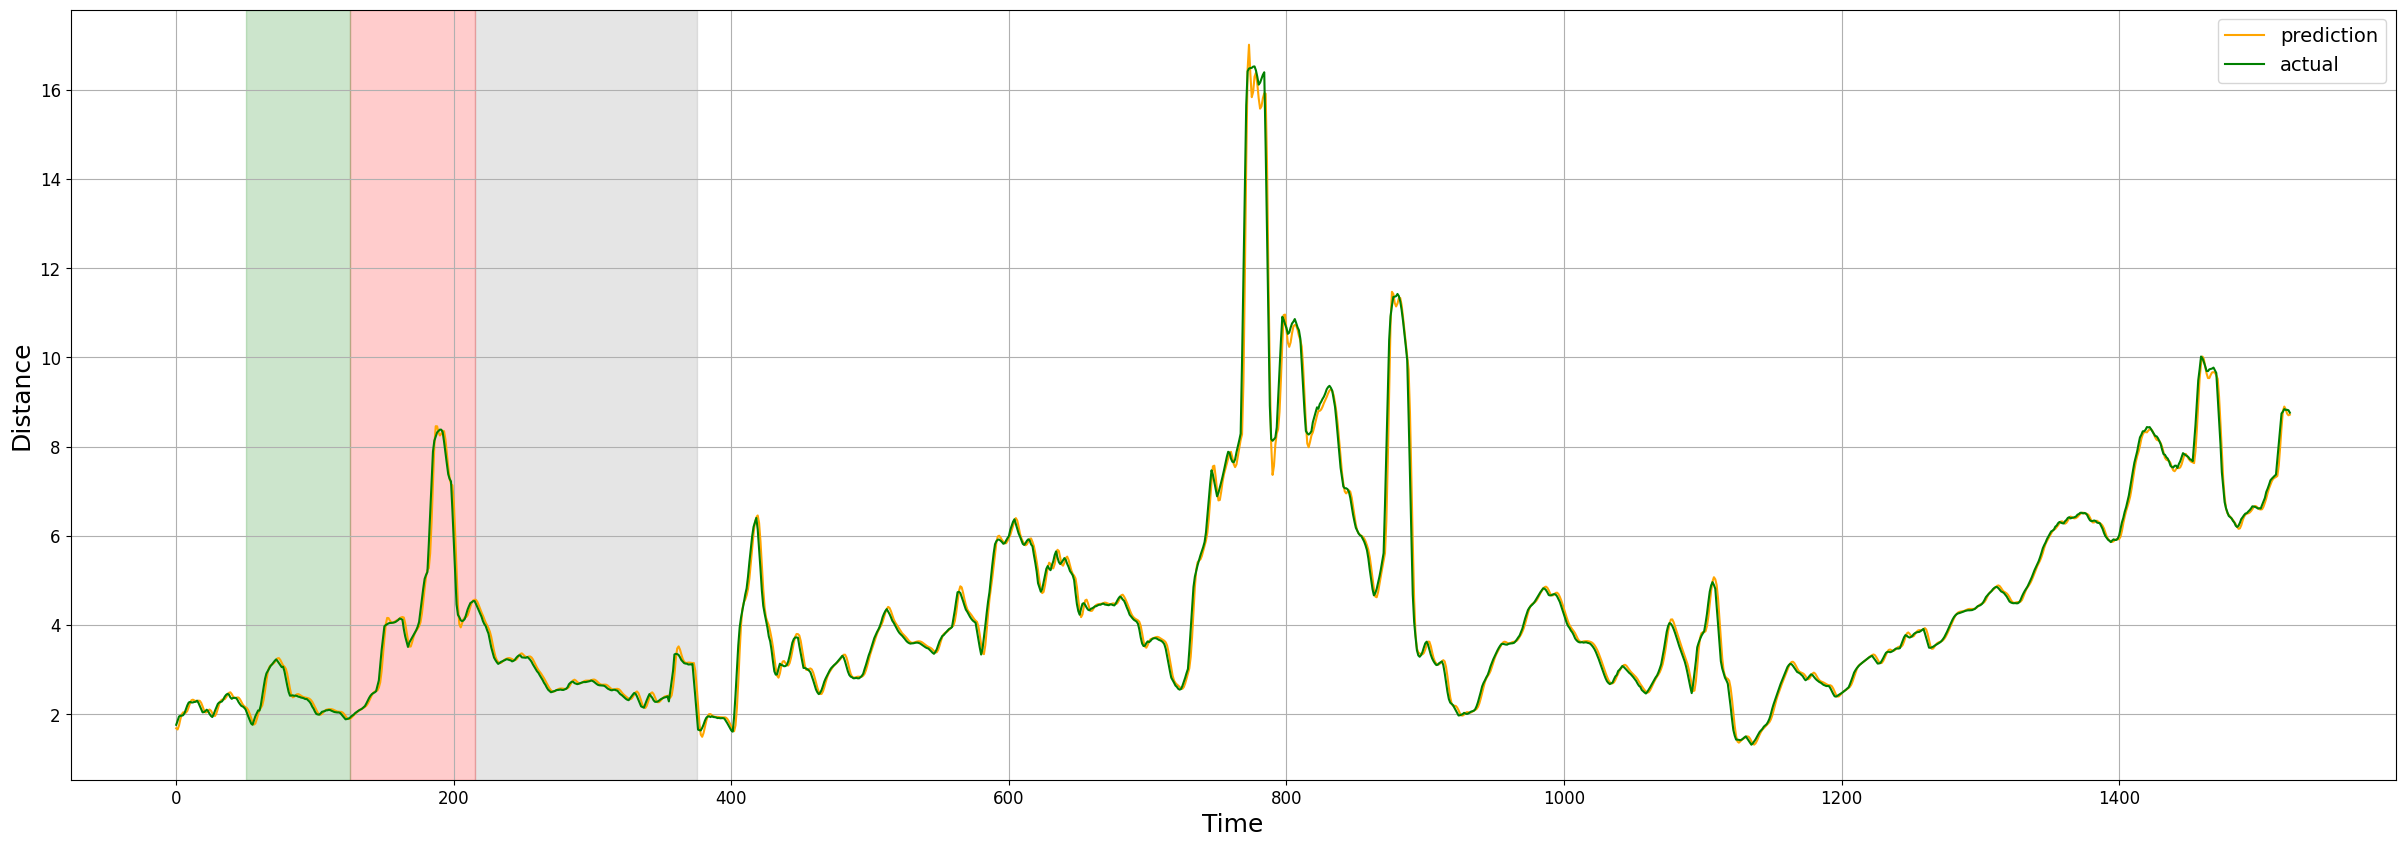

[*********************100%***********************]  1 of 1 completed

['HDFCBANK', 'UPL']



[*********************100%***********************]  1 of 1 completed


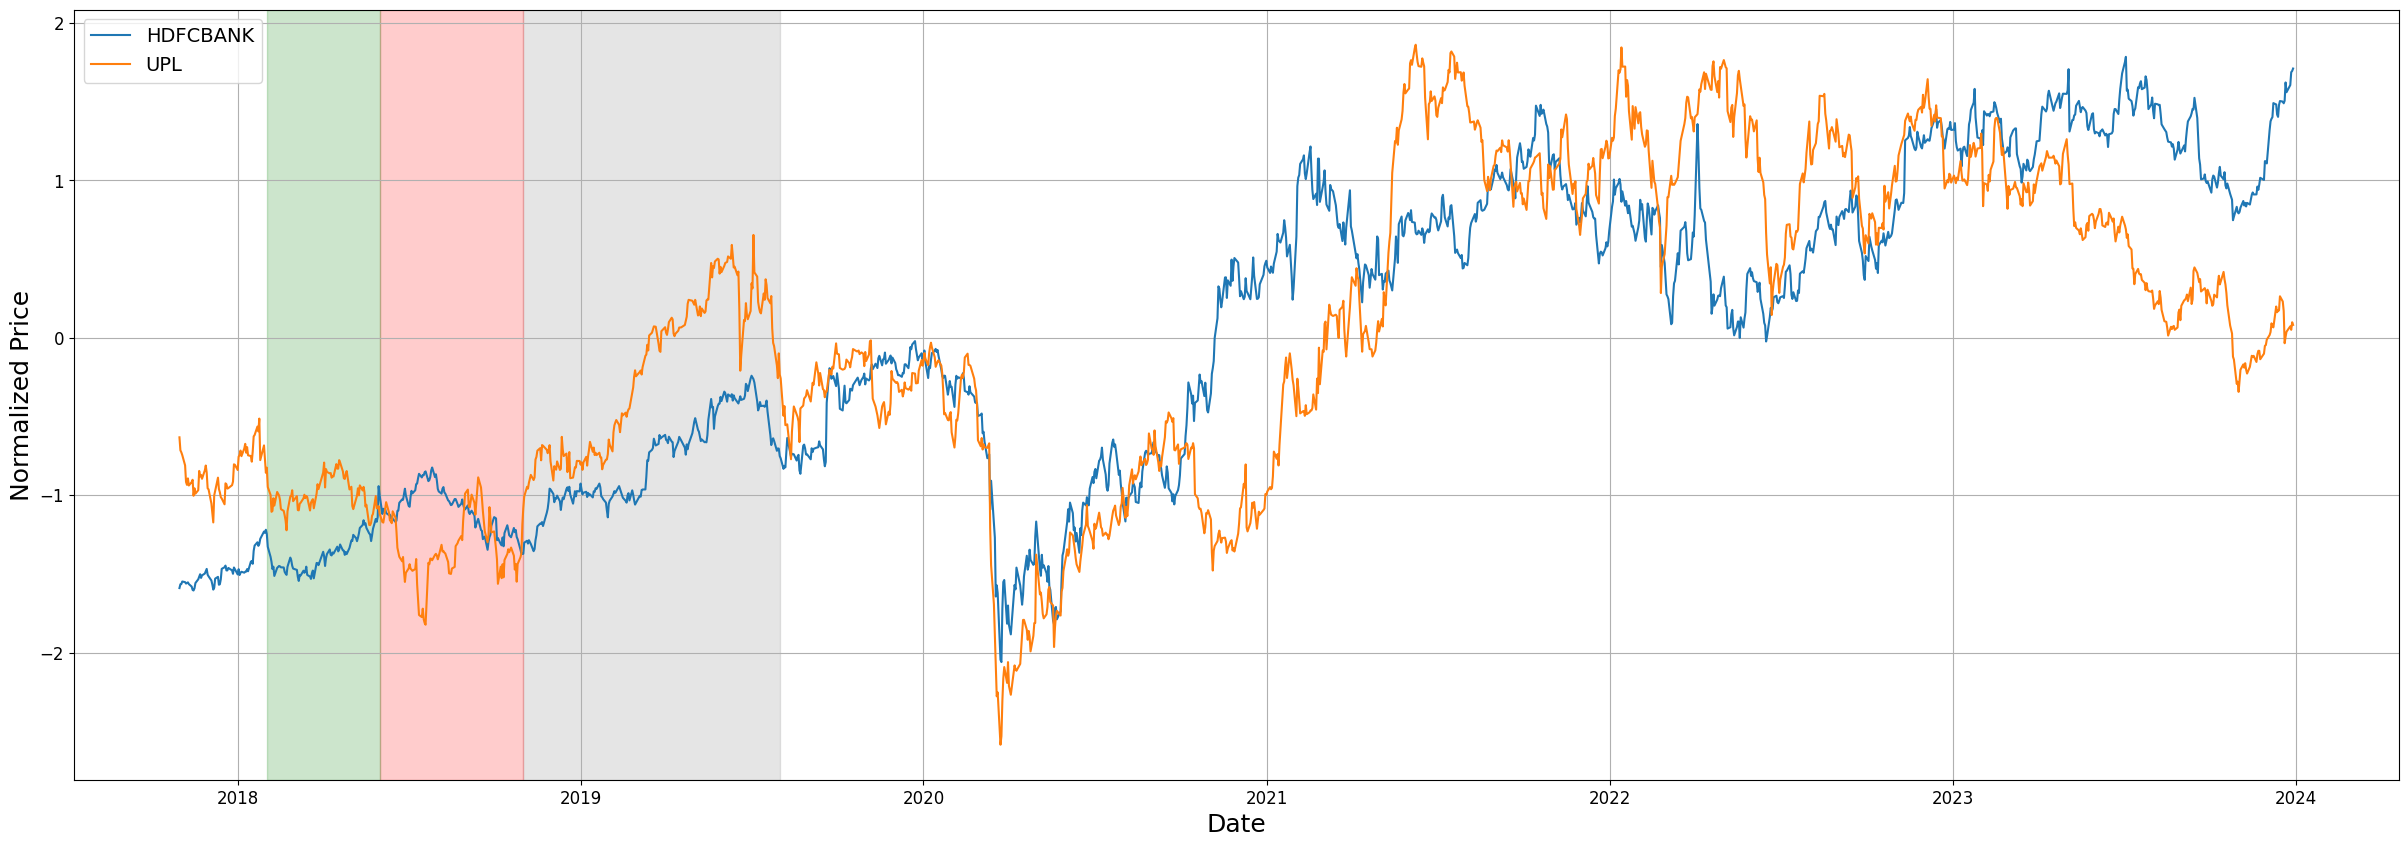

In [54]:
stock = '"HDFCBANK_UPL"'
test = test_data_file[stock][int(20):].tolist()
pred = predicted_series_lstm[stock].tolist()
plot2(pred,test, stock, 20, 20)
plot_actual2(stock, len(test))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


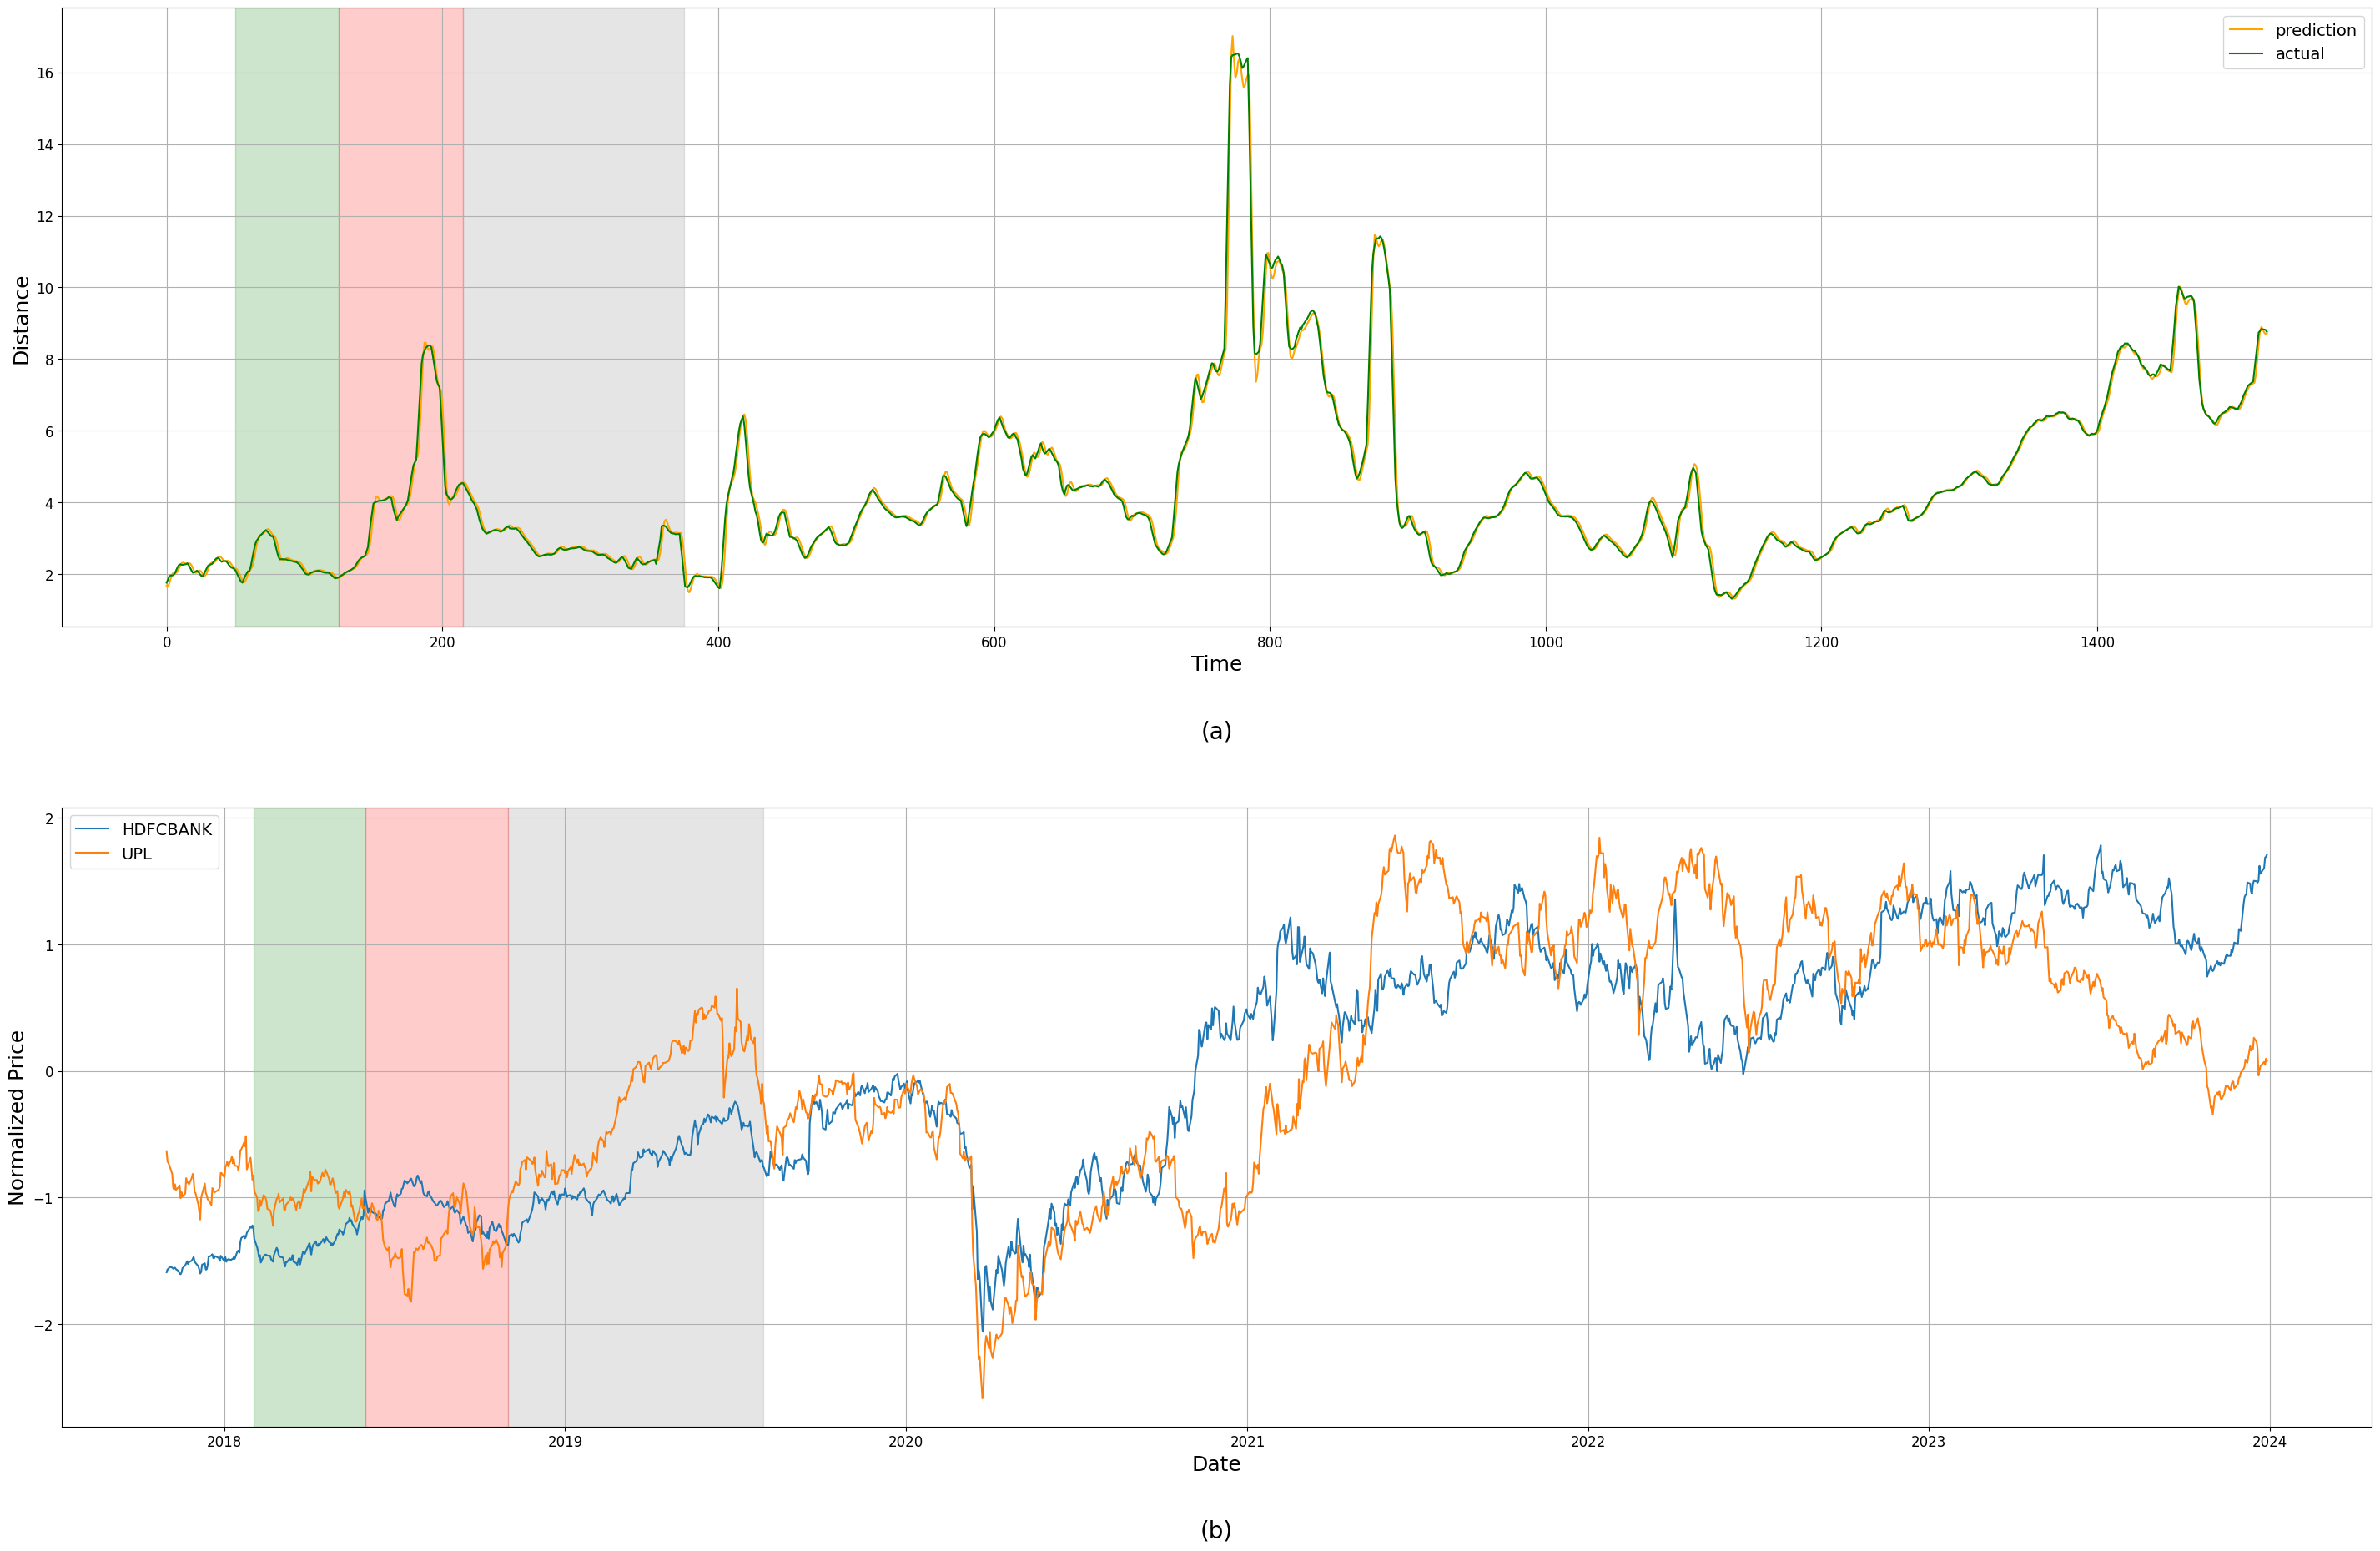

In [55]:
import matplotlib.pyplot as plt
import yfinance as yf

def plot2(ax, pred, test):
    ax.plot(pred, label="prediction", c="orange")
    ax.plot(test, label="actual", c="green")
    ax.set_xlabel("Time", fontsize=18)
    ax.set_ylabel("Distance", fontsize=18)
    ax.legend(fontsize=14)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.axvspan(215, 375, color='grey', alpha=0.2)
    ax.axvspan(125, 215, color='red', alpha=0.2)
    ax.axvspan(50, 125, color='green', alpha=0.2)
    ax.grid(True)
    ax.text(0.5, -0.15, '(a)', transform=ax.transAxes, fontsize=20, va='top', ha='center')

def plot_actual2(ax, stockname, n):
    stockname = stockname[1:-1]
    s = stockname.split('_')
    s1 = s[0]+'.NS'
    s2 = s[1]+'.NS'
    stock1 = yf.download(s1, start='2003-01-01', end='2023-12-31')['Adj Close']
    stock2 = yf.download(s2, start='2003-01-01', end='2023-12-31')['Adj Close']
    
    stock1_1 = stock1[-n:]
    stock2_1 = stock2[-n:]
    
    normalized_stock1 = (stock1_1 - stock1_1.mean()) / stock1_1.std()
    normalized_stock2 = (stock2_1 - stock2_1.mean()) / stock2_1.std()
    
    ax.plot(normalized_stock1, label=s[0])
    ax.plot(normalized_stock2, label=s[1])
    ax.set_xlabel('Date', fontsize=18)
    ax.set_ylabel('Normalized Price', fontsize=18)
    ax.legend(fontsize=14)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.axvspan('2018-11-01', '2019-08-01', color='grey', alpha=0.2)
    ax.axvspan('2018-06-01', '2018-11-01', color='red', alpha=0.2)
    ax.axvspan('2018-02-01', '2018-06-01', color='green', alpha=0.2)
    ax.grid(True)
    ax.text(0.5, -0.15, '(b)', transform=ax.transAxes, fontsize=20, va='top', ha='center')

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(30, 20))

# Plot prediction vs actual
plot2(axes[0], pred, test)

# Plot actual stock prices
plot_actual2(axes[1], stock, len(test))

# Adjust layout to add spacing between plots
plt.tight_layout(pad=6.0)

# Save and show the figure
plt.savefig('ComparisonGraph_Combined.jpeg', dpi=1200, bbox_inches='tight')
plt.show()
